In [1]:
%%html
<!--This is just for personal preference.-->
<style>
h1 {padding: 9px; color: Green; border-bottom: 3px solid Green; text-align: center;}
h2 {padding: 9px; color: MediumBlue; border-bottom: 3px solid MediumBlue; text-align: center;}
h3 {padding: 9px; color: firebrick; border-bottom: 3px solid firebrick; text-align: center;}
h4 {padding: 9px; color: olive; border-bottom: 3px solid olive; text-align: center;}
h5 {padding: 9px; color: aquamarine; border-bottom: 3px solid aquamarine; text-align: center;}
summary {color: DarkOrange;}
td {text-align: center;}
</style>

<h1 align='center'><strong>King County Development</strong></h1>

<p align="center">
    <center><img src="images/kc_dev_logo.png"></center>
</p>

<h4 align='center'><strong><em>An Academic Multiple Regression Analysis Project</em></strong></h4>
<h6 align='center'><strong><em>by <a href="www.linkedin.com/in/devin-sarnataro-0b639b148">Devin Sarnataro</a></em></strong></h6>
<h6 align='center'>January 20th, 2023</h6>

<h1 align='center'><strong>Table of Contents</strong></h1>

* [Project Overview](#sect_proj_over)
* [Stakeholder & Business Problem](#sect_stake_1)
* [Understanding & Preparing the Data](#sect_under_prep_data_1)
    * [Importing the Necessary Modules and Functions](#sect_import)
    * [Exploring the Data](#sect_expl_data)
    * [Duplicated IDs](#sect_dupes)
* [Stakeholder and Business Problem Update](#sect_stake_biz_update)
* [Understanding & Preparing the Data (cont.)](#sect_under_prep_data_2)
    * [Features with Missing Data](#sect_missing)
    * [Feature Distribution Visualizations](#sect_dist_viz)
    * [Initial Correlation Examination](#sect_corr)
    * [Dummy Variable Creation](#sect_dummies)
    * [Preprocessed DataFrames](#sect_preproc)
* [Model Iterations](#sect_model_iter)
    * [Base Models](#sect_base_models)
    * [Full Models](#sect_full)
        * [All King County Full Model](#sub_sect_kc)
        * [Seattle Full Model](#sub_sect_seattle)
        * [Outside Seattle Full Model](#sub_sect_out_seattle)
    * [Analyzing Model Performance](#sect_mod_anal)
* [Stakeholder and Business Problem Decision](#sect_stake_biz_decision)
* [Insights, Conclusions, and Recommendations](#sect_insights_and_conclusions)
    * [Conclusions & Recommendations](#reco_concl)
    * [Picture Databases](#reco_pic_dbs)
    * [Sales Price Calculator](#reco_sales_calc)
* [Future Investigations](#sect_fut_invest)

<a id='sect_proj_over'></a>

<h1 align='center'><strong>Project Overview</strong></h1>

This project’s purpose was to perform a multiple regression analysis to provide a client with a solution to a business problem.  I created a real estate developer named King County Development as a client.  For a specific business problem, I chose to determine which property features were significant to the sales price of a residential property and how much of an effect those features had on the sales price, individually and collectively.

Features deemed significant that positively affected the sales price would be desirable and worth investment. The opposite would be true for features deemed significant that negatively affected the sales price.  Knowing how much of an effect those features had on the sales price would allow King County Development to weigh the costs of specific renovations, remodeling, or construction against the potential increase in the sales price that would be achieved.

After exploring and appropriately modifying the data I was given, I built numerous multiple linear regression models to determine which features were statistically significant.  The features I chose to consider were the characteristics of a property that could be changed.  Whether a property is on the waterfront is not a feature that can be changed.  Of the features that remained, I analyzed how those features affected the sales price.  I then made recommendations based on the results of my analysis.

I analyzed my results to provide my [Conclusions & Recommendations](#reco_concl).  I offered specific standards that should be upheld while designing, renovating or remodeling properties.  I recommended that [Picture Databases](#reco_pic_dbs) be created of properties grouped by essential features.  I built a [Sales Price Calculator](#reco_sales_calc) to quickly and easily show the change in the sales price based on the effect of a change in a feature and the impact of changes in multiple features.  After demonstrating the usefulness of such a tool, I recommended that King County Development build similar tools with more advanced capabilities.

While my recommendations were based on my analysis, the data I was given was limited in the period it covered.  Due to that fact, I also made a series of recommendations for any [Future Investigations](#sect_fut_invest) to improve the performance of multiple linear regression models and the value of the insights gained through their use.  By doing so, King County Development could provide services and data analysis of the highest quality to their clients and investors and achieve high profits for themselves.

<a id='sect_stake_1'></a>

<h1 align='center'><strong>Stakeholder & Business Problem</strong></h1>

I started the project with a real estate agency in mind as a client, but I didn’t want to limit myself before I began my analysis. I initially thought that areas with rapidly increasing home prices would be helpful to a real estate agency. In contrast, areas with homes prices that were stagnant or were perhaps even decreasing would be beneficial to a state government agency or maybe even some sort of charitable organization.  Those areas may require economic development or support.  Even if I did end up going with a real estate agency, I was hoping to provide my hypothetical client with insights concerning other possible revelations that could be attained through a thorough analysis of the data.  So, I began my investigation without identifying a client or business problem to see what was possible first.

<a id='sect_under_prep_data_1'></a>

<h1 align='center'><strong>Understanding & Preparing the Data</strong></h1>

<a href='https://flatironschool.com/'>Flatiron School</a> provided me with a dataset of residential property sales in King County, Washington, for this project. We were instructed to create a hypothetical stakeholder or client and a business problem that could be addressed with a multiple regression analysis. Along with the dataset, Flatiron also provided me with a `.md` <a href="https://github.com/sarnadpy32/king_county_development/blob/master/data/column_names.md">file with the column names and a brief description of each column</a>. I've also included the columns and their definitions below if you click on the collapsible section.

<details>
    <summary><center><strong>&mdash;&nbsp;&nbsp;&nbsp;&nbsp;Click Here to see the Column Names and Descriptions.&nbsp;&nbsp;&nbsp;&nbsp;&mdash;</strong></center></summary>

<table align='center' width='90%'>
    <thead>
        <tr><th><center>Column</center></th><th><center>Description</center></th><th><center>Additional Information</center></th></tr>
    </thead>
    <tbody>
        <tr><td><center><code>id</code></center></td><td><center>Unique identifier for a house</center></td></tr>
        <tr><td><center><code>date</code></center></td><td><center>Date house was sold</center></td></tr>
        <tr><td><center><code>price</code></center></td><td><center>Sale price<br>(prediction target)</center></td></tr>
        <tr><td><center><code>bedrooms</code></center></td><td><center>Number of bedrooms</center></td></tr>
        <tr><td><center><code>bathrooms</code></center></td><td><center>Number of bathrooms</center></td></tr>
        <tr><td><center><code>sqft_living</code></center></td><td><center>Square footage of living space in the home</center></td></tr>
        <tr><td><center><code>sqft_lot</code></center></td><td><center>Square footage of the lot</center></td></tr>
        <tr><td><center><code>floors</code></center></td><td><center>Number of floors (levels) in house</center></td></tr>
        <tr>
            <td><center><code>waterfront</code></center></td>
            <td><center>Whether the house is on a waterfront</center></td>
            <td><center><em>(Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts)</em></center></td>
        </tr>
        <tr>
            <td><center><code>view</code></center></td>
            <td><center>Quality of view from house</center></td>
            <td><center><em>(Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other)</em></center></td>
        </tr>
        <tr>
            <td><center><code>condition</code></center></td>
            <td><center>How good the overall condition of the house is. Related to maintenance of house.</center></td>
            <td><center><code>1 = Poor</code><br>Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.<br><br><code>2 = Fair</code><br>Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.<br><br><code>3 = Average</code><br>Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.<br><br><code>4 = Good</code><br>No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.<br><br><code>5 = Very Good</code><br>All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.</center></td>
        </tr>
        <tr>
            <td><center><code>grade</code></center></td>
            <td><center>Overall grade of the house. Related to the construction and design of the house.</center></td>
            <td><center><code>1-3</code><br>Falls short of minimum building standards. Normally cabin or inferior structure.<br><br><code>4</code><br>Generally older, low quality construction. Does not meet code.<br><br><code>5</code><br>Low construction costs and workmanship. Small, simple design.<br><br><code>6</code><br>Lowest grade currently meeting building code. Low quality materials and simple designs.<br><br><code>7</code><br>Average grade of construction and design. Commonly seen in plats and older sub-divisions.<br><br><code>8</code><br>Just above average in construction and design. Usually better materials in both the exterior and interior finish work.<br><br><code>9</code><br>Better architectural design with extra interior and exterior design and quality.<br><br><code>10</code><br>Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.<br><br><code>11</code><br>Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.<br><br><code>12</code><br>Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.<br><br><code>13</code><br>Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.</center></td>
        </tr>
        <tr><td><center><code>sqft_above</code></center></td><td><center>Square footage of house apart from basement</center></td></tr>
        <tr><td><center><code>sqft_basement</code></center></td><td><center>Square footage of the basement</center></td></tr>
        <tr><td><center><code>yr_built</code></center></td><td><center>Year when house was built</center></td></tr>
        <tr><td><center><code>yr_renovated</code></center></td><td><center>Year when house was renovated</center></td></tr>
        <tr><td><center><code>zipcode</code></center></td><td><center>ZIP Code used by the United States Postal Service</center></td></tr>
        <tr><td><center><code>lat</code></center></td><td><center>Latitude coordinate</center></td></tr>
        <tr><td><center><code>long</code></center></td><td><center>Longitude coordinate</center></td></tr>
        <tr><td><center><code>sqft_living15</code></center></td><td><center>The square footage of interior housing living space for the nearest 15 neighbors</center></td></tr>
        <tr><td><center><code>sqft_lot15</code></center></td><td><center>The square footage of the land lots of the nearest 15 neighbors</center></td></tr>
    </tbody>
</table>

</details>

The `condition` and `grade` columns had categories that required me to check the King County Assessor’s <a href='https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r'>glossary of terms</a> to see what the entities within the columns specifically meant. I also used the opportunity to explore the site a little, and by doing so I was able to obtain a map of the county from the county government's <a href="https://gismaps.kingcounty.gov/iMap/">iMap</a> feature.
<br><br>
<details align='center'>
    <summary><center><strong>&mdash;&nbsp;&nbsp;&nbsp;&nbsp;Click Here to see a Map of King County.&nbsp;&nbsp;&nbsp;&nbsp;&mdash;</strong></center></summary>

<p align="center">
    <img src="images/king_county_imap.svg">
</p>
    
</details>

<a id='sect_import'></a>

<h2 align='center'><strong>Importing the Necessary Modules and Functions</strong></h2>

I started by importing the modules and functions I knew I would most likely need. If I needed to import others at any point, I would come back here and add them to this cell to keep everything organized. I also created some output formatters that I commonly use so that I wouldn't have to rewrite them each time.

In [2]:
# Importing modules and functions

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

import ipywidgets as widgets

In [3]:
# Output formatters

bold_red = '\033[31m\033[1m'
every_off = '\033[0m'

print(bold_red +'Making sure '+ every_off +'they worked '+ bold_red +'as intended.'+ every_off)

Making sure they worked as intended.


<a id='sect_expl_data'></a>

<h2 align='center'><strong>Exploring the Data</strong></h2>

I began my analysis by importing the dataset provided to me by <a href='https://flatironschool.com/'>Flatiron School</a>. I sorted the dataframe by `id`, as it would make identifying any potential duplicates easier. During my analysis, I also discovered that there were 70 different ZIP codes, so I downloaded the free ZIP code database available on <a href='https://www.unitedstateszipcodes.org/zip-code-database/'>this site</a> to replace the ZIP codes with the appropriate city names. This reduced the number of categories in the column to 24 and served as a more helpful tool for analysis.

In [4]:
# Importing and investigating the data

kc_house_data = pd.read_csv('data/kc_house_data.csv')
kc_house_data = kc_house_data.sort_values('id')

display(kc_house_data.head(3))
kc_house_data.info()

id       date     price  bedrooms  bathrooms  sqft_living  \
2495  1000102  4/22/2015  300000.0         6       3.00         2400   
2494  1000102  9/16/2014  280000.0         6       3.00         2400   
6729  1200019   5/8/2014  647500.0         4       1.75         2060   

      sqft_lot  floors waterfront  view  ...      grade sqft_above  \
2495      9373     2.0         NO  NONE  ...  7 Average       2400   
2494      9373     2.0        NaN  NONE  ...  7 Average       2400   
6729     26036     1.0        NaN  NONE  ...     8 Good       1160   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
2495            0.0     1991           0.0    98002  47.3262 -122.214   
2494            0.0     1991           0.0    98002  47.3262 -122.214   
6729          900.0     1947           0.0    98166  47.4444 -122.351   

      sqft_living15  sqft_lot15  
2495           2060        7316  
2494           2060        7316  
6729           2590       21891  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 2495 to 15937
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  lon

In [5]:
# Checking the number of different ZIP codes 

kc_house_data.zipcode.nunique()

70

In [6]:
# Importing an outside dataset to replace the ZIP codes

zip_code_data = pd.read_csv('data/zip_code_database.csv')

zip_code_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42735 entries, 0 to 42734
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zip                       42735 non-null  int64  
 1   type                      42735 non-null  object 
 2   decommissioned            42735 non-null  int64  
 3   primary_city              42735 non-null  object 
 4   acceptable_cities         9302 non-null   object 
 5   unacceptable_cities       11673 non-null  object 
 6   state                     42735 non-null  object 
 7   county                    41799 non-null  object 
 8   timezone                  41926 non-null  object 
 9   area_codes                39698 non-null  object 
 10  world_region              333 non-null    object 
 11  country                   42657 non-null  object 
 12  latitude                  42735 non-null  float64
 13  longitude                 42735 non-null  float64
 14  irs_es

In [7]:
# Setting up the outside dataset to easily use it to replace the ZIP codes with the their corresponding cities

zip_cities = zip_code_data[['zip', 'primary_city']].set_index('zip')

In [8]:
# Replacing the ZIP codes with the their corresponding cities

kc_house_data.zipcode = kc_house_data.zipcode.map(lambda x: zip_cities.loc[x]['primary_city'])

In [9]:
# Renaming the column

kc_house_data.rename(columns={'zipcode': 'city'}, inplace=True)

In [10]:
# Checking how effective replacing ZIP code with City was in reducing the number of categories 

kc_house_data.city.nunique()

24

<a id="sect_dupes"></a>

<h2 align='center'><strong>Duplicated ID's</strong></h2>

I found out there were sales with duplicate `id`s. Before I could begin my analysis, I had to determine if these were resales or errors. I first changed the `date` column to make comparisons more straightforward. It also allowed me to easily see the period covered by the dataset, which was only a single year's worth of sales, specifically from May 2014 to May 2015. I then isolated all the duplicated `id`s into a single dataframe to investigate my concerns. After checking, they were resales, and no duplicates needed to be dropped.

In [11]:
# There were obviously duplicates based on the number of unique ID's

kc_house_data.id.nunique()

21420

In [12]:
# Changing the date column to datetime format and aanlyzing the time period 

kc_house_data.date = pd.to_datetime(kc_house_data.date)

kc_house_data.date.describe(datetime_is_numeric=True)

count                            21597
mean     2014-10-29 04:20:38.171968512
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object

In [13]:
# Isolating the potential duplicates in their own df

dup_df = kc_house_data.loc[kc_house_data.id.duplicated(keep=False)].copy()

In [14]:
# Investigating the maximum number of duplicated IDs

dup_df.id.value_counts().head(3)

795000620     3
1000102       2
5430300171    2
Name: id, dtype: int64

In [15]:
# Iterating through the unique IDs in the dup_df

for id_x in dup_df.id.unique():
    uniq_id_df = dup_df.loc[dup_df.id==id_x].sort_values('date')
    
    p_0, p_1 = uniq_id_df.price.iloc[0], uniq_id_df.price.iloc[1]
    
    d_0, d_1 = uniq_id_df.date.iloc[0], uniq_id_df.date.iloc[1]
    
    # Any duplicated `id`s that had a resale value of less than the orginal value were my primary
    # concern as these could be errors instead of resales and I didn't feel the need to check 
    # if the resale value was greater, which would make sense if people were quickly flipping 
    # houses / properties
    #--------------------------------------------------------------------------------------------
    if p_1 < p_0: display(uniq_id_df)
    
    # And of course, any properties that had both the same date and ID would almost certainly be errors
    #--------------------------------------------------------------------------------------------------
    if d_0 == d_1: 
        print('\n'+ bold_red +'X---Obvious Error---X'+ every_off +'\n')
        display(uniq_id_df)
        
    # As there was only one duplicated ID with three duplicates, it was of obvious concern as well
    #---------------------------------------------------------------------------------------------
    if len(uniq_id_df)==3: display(uniq_id_df)

id       date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620 2014-09-24  115000.0         3        1.0         1080   
17589  795000620 2014-12-15  124000.0         3        1.0         1080   
17590  795000620 2015-03-11  157000.0         3        1.0         1080   

       sqft_lot  floors waterfront  view  ...   grade sqft_above  \
17588      6250     1.0         NO  NONE  ...  5 Fair       1080   
17589      6250     1.0         NO  NONE  ...  5 Fair       1080   
17590      6250     1.0        NaN  NONE  ...  5 Fair       1080   

       sqft_basement yr_built  yr_renovated     city      lat    long  \
17588            0.0     1950           0.0  Seattle  47.5045 -122.33   
17589            0.0     1950           0.0  Seattle  47.5045 -122.33   
17590            0.0     1950           NaN  Seattle  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
15263  2619920170 2014-10-01  772500.0         4        2.5         3230   
15264  2619920170 2014-12-19  765000.0         4        2.5         3230   

       sqft_lot  floors waterfront  view  ...     grade sqft_above  \
15263      4290     2.0         NO  NONE  ...  9 Better       3230   
15264      4290     2.0         NO  NONE  ...  9 Better       3230   

       sqft_basement yr_built  yr_renovated      city      lat     long  \
15263            0.0     2004           0.0  Kirkland  47.6874 -122.161   
15264            0.0     2004           NaN  Kirkland  47.6874 -122.161   

       sqft_living15  sqft_lot15  
15263           3220        5083  
15264           3220        5083  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
5587  2726049071 2014-12-11  510000.0         2        1.0          820   
5588  2726049071 2015-04-08  489950.0         2        1.0          820   

      sqft_lot  floors waterfront  view  ...   grade sqft_above  \
5587      4206     1.0        NaN  NONE  ...  5 Fair        820   
5588      4206     1.0         NO  NONE  ...  5 Fair        820   

      sqft_basement yr_built  yr_renovated     city      lat     long  \
5587            0.0     1949           0.0  Seattle  47.7076 -122.284   
5588            0.0     1949           NaN  Seattle  47.7076 -122.284   

      sqft_living15  sqft_lot15  
5587           1810        7200  
5588           1810        7200  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
10598  2767603612 2014-05-12  500000.0         2       2.25         1290   
10599  2767603612 2015-01-13  489000.0         2       2.25         1290   

       sqft_lot  floors waterfront  view  ...   grade sqft_above  \
10598      1334     3.0         NO  NONE  ...  8 Good       1290   
10599      1334     3.0         NO  NONE  ...  8 Good       1290   

       sqft_basement yr_built  yr_renovated     city      lat     long  \
10598            0.0     2007           0.0  Seattle  47.6719 -122.382   
10599            0.0     2007           NaN  Seattle  47.6719 -122.382   

       sqft_living15  sqft_lot15  
10598           1350        1334  
10599           1350        1334  

[2 rows x 21 columns]

id       date      price  bedrooms  bathrooms  sqft_living  \
7838  4139420590 2014-05-20  1210000.0         4        3.5         4560   
7839  4139420590 2014-08-27  1200000.0         4        3.5         4560   

      sqft_lot  floors waterfront  view  ...      grade sqft_above  \
7838     16643     1.0         NO  GOOD  ...  12 Luxury       2230   
7839     16643     1.0         NO  GOOD  ...  12 Luxury       2230   

      sqft_basement yr_built  yr_renovated      city      lat     long  \
7838         2330.0     1995           0.0  Bellevue  47.5521 -122.115   
7839         2330.0     1995           0.0  Bellevue  47.5521 -122.115   

      sqft_living15  sqft_lot15  
7838           4060       15177  
7839           4060       15177  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
13285  7167000040 2014-08-13  740000.0         4        3.0         3350   
13286  7167000040 2015-03-05  700000.0         4        3.0         3350   

       sqft_lot  floors waterfront  view  ...         grade sqft_above  \
13285    199253     2.0        NaN  NONE  ...  10 Very Good       3350   
13286    199253     2.0         NO  NONE  ...  10 Very Good       3350   

       sqft_basement yr_built  yr_renovated           city      lat     long  \
13285            0.0     2004           0.0  Black Diamond  47.3602 -121.988   
13286            0.0     2004           0.0  Black Diamond  47.3602 -121.988   

       sqft_living15  sqft_lot15  
13285           3350      183897  
13286           3350      183897  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
836  8682262400 2014-07-18  430000.0         2       1.75         1350   
837  8682262400 2015-05-13  419950.0         2       1.75         1350   

     sqft_lot  floors waterfront  view  ...   grade sqft_above  sqft_basement  \
836      4003     1.0         NO  NONE  ...  8 Good       1350            0.0   
837      4003     1.0         NO  NONE  ...  8 Good       1350            0.0   

    yr_built  yr_renovated     city      lat     long  sqft_living15  \
836     2004           0.0  Redmond  47.7176 -122.033           1350   
837     2004           0.0  Redmond  47.7176 -122.033           1350   

     sqft_lot15  
836        4479  
837        4479  

[2 rows x 21 columns]

<a id='sect_stake_biz_update'></a>

<h1 align='center'><strong>Stakeholder and Business Problem Update</strong></h1>

As mentioned in the section above, I discovered that the period covered by the dataset was only a single year. My original idea of analyzing the prices of houses in certain areas over time was, therefore, not going to work, nor any other analysis of the changing effects of the other features over time. While my options for a client were still open, I would have to analyze the impact of the features on the prices of houses in the year concerned.

<a id='sect_under_prep_data_2'></a>

<h1 align='center'><strong>Understanding & Preparing the Data (cont.)</strong></h1>

I then dropped the `id`, `date`, `lat`, and `long` columns as they were no longer necessary for my analysis. As I mentioned in the previous section, I would later determine that keeping all of the features would make my results overly complicated and challenging for my stakeholder to understand. I decided to drop even more columns to simplify my results and provide my stakeholder with directly actionable recommendations. I chose to keep only the features of a property that could be changed. For example, whether a property is a waterfront is not a feature that can be changed.

In [16]:
# Dropping the unnecessary columns

kc_house_data.drop(['id', 'date', 'lat', 'long'], axis=1, inplace=True)

In [17]:
# Eliminating the other unwanted columns

kc_house_data.drop(['sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built', 'view', 'waterfront'], 
                   axis=1, inplace=True)

<a id='sect_missing'></a>

<h2 align='center'><strong>Features with Missing Data</strong></h2>

I started by identifying the columns with missing data.  I then used the `MissingIndicator()` function from `sklearn` to create an encoded column to be added to the DataFrame for the `yr_renovated` column, the only column with missing data.  I could then fill in the `NaN`s with something appropriate so they wouldn't cause problems during my analysis.

In [18]:
# Determining which columns have missing data

kc_cols_missing = kc_house_data.isna().sum()
kc_cols_missing.loc[kc_cols_missing != 0]

yr_renovated    3842
dtype: int64

In [19]:
# Encoding the column in the appropriate manner and replaced the missing values

reno_ser = kc_house_data[['yr_renovated']].copy()
missing_indicator = MissingIndicator()
missing_indicator.fit(reno_ser)
missing_ser = missing_indicator.transform(reno_ser).astype(int)

kc_house_data['yr_renovated'].fillna(0, inplace=True)

kc_house_data['yr_renovated_Missing'] = missing_ser

I found out later that the `sqft_basement` column also contained a value equivalent to `NaN`.  I came back here to deal with it in the same section.

In [20]:
# Repeating the process above but I had to replace the '?'s first

kc_house_data.sqft_basement = \
kc_house_data.sqft_basement.map(lambda x: np.nan if x=='?' else x)

sqft_base_col = kc_house_data[['sqft_basement']]

missing_indicator = MissingIndicator()
missing_indicator.fit(sqft_base_col)
missing_ser = missing_indicator.transform(sqft_base_col).astype(int)

kc_house_data['sqft_basement_Missing'] = missing_ser

kc_house_data.sqft_basement = kc_house_data.sqft_basement.astype('float64')

Then I split the data into the target (dependent variable) series and two separate dataframes for the independent variables, one for the independent numerical variables and one for the categorical independent variables.

In [21]:
# Creating the lists of columns for each group

numericals = ['sqft_living', 'yr_renovated', 'floors', 'sqft_basement', 'bedrooms', 'bathrooms']

categoricals = [col for col in kc_house_data.columns if col not in numericals and col!='price']

In [22]:
# Splitting the data into appropriate groups

kc_target = kc_house_data['price'].copy()
kc_nums = kc_house_data[numericals].copy() 
kc_cats = kc_house_data[categoricals].copy()

<a id='sect_dist_viz'></a>

<h2 align='center'><strong>Feature Distribution Visualizations</strong></h2>

Before I created any visualizations, I wrote functions to properly format the ticks of any visualizations and any `pandas` outputs that contained currency information, as well as a function to return a lighter version of a simple, pre-named color to use in visualizations.

In [23]:
# Setting the rcParams that I wanted to use
# Creating the functions I would use to style colors, ticks and dataframes

plt.rcParams.update({'mathtext.fontset':'dejavusans', 'mathtext.bf':'sans:bold'})

def get_lighter_color(color_name, light_frac):
    color_map = LinearSegmentedColormap.from_list('', [color_name,'w'], N=9)
    return color_map(light_frac)

def viz_percentage_formatter(y, pos):
    if y==0: c = '$\mathbf{0\%}$'
    else: c = '$\mathbf{'+ '{:.2f}'.format(y * 100) +'\%}$'

    return c

def viz_currency_formatter(x, pos):
    if x==0: c = '0'
    if 0<np.abs(x)<1e3: c = '${}'.format(np.abs(x))
    if 1e3<=np.abs(x)<1e6: c = '${}K'.format(round(np.abs(x)*1e-3), 2)
    if 1e6<=np.abs(x)<1e9: c = '${}M'.format(round(np.abs(x)*1e-6), 2)
    if np.abs(x)>=1e9: c = '${}B'.format(round(np.abs(x)*1e-9), 2)
        
    if x < 0: c = '-'+ c
        
    return c

def pd_currency_formatter(x):
    if x==0: c = '0'
    if 0<np.abs(x)<1e3: c = '${:.2f}'.format(np.abs(x))
    if 1e3<=np.abs(x)<1e6: c = '${:.2f} K'.format(round(np.abs(x)*1e-3), 2)
    if 1e6<=np.abs(x)<1e9: c = '${:.2f} M'.format(round(np.abs(x)*1e-6), 2)
    if np.abs(x)>=1e9: c = '${:.2f} B'.format(round(np.abs(x)*1e-9), 2)
        
    if x < 0: c = '-'+ c
        
    return c

<h3 align='center'><strong>Price Distribution Visualizations</strong></h3>

&nbsp;&nbsp;&nbsp;&nbsp;I first checked the distribution of `price` (the target variable).

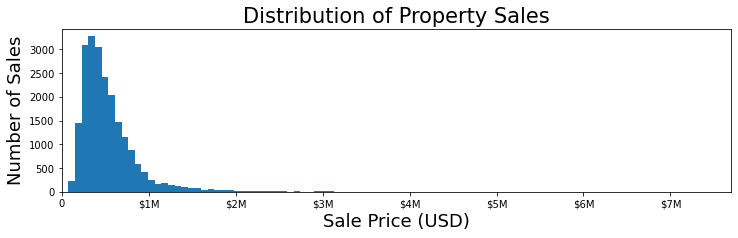

In [24]:
# Price Distribution Visualization

p_max = kc_target.max()

fig, ax = plt.subplots(figsize=(12, 3))

ax.hist(kc_target, bins=100)

ax.set_xbound(0, p_max)
ax.xaxis.set_major_formatter(viz_currency_formatter)

ax.set_xlabel("Sale Price (USD)", size=18)
ax.set_ylabel("Number of Sales", size=18)
ax.set_title("Distribution of Property Sales", size=21)

fig.set_facecolor('w')

fig.savefig('visuals/price_distribution.png' , bbox_inches='tight')

plt.show()

In [25]:
# Checking the distrubition thru .describe() to confirm the heavy skew

kc_target.describe().apply(pd_currency_formatter)

count     $22.00 K
mean     $540.00 K
std      $367.00 K
min       $78.00 K
25%      $322.00 K
50%      $450.00 K
75%      $645.00 K
max        $8.00 M
Name: price, dtype: object

The significant difference between the 75th quantile and the maximum value for the series confirmed the skew I observed in the visualization. I eliminated the outliers so that the performance of the model would be improved.

In [26]:
# Eliminating the outliers

kc_target = kc_target.loc[(kc_target >= kc_target.quantile(.001)) & (kc_target <= kc_target.quantile(.999))]

In [27]:
# Checking the distrubition thru .describe() to see the changes

kc_target.describe().apply(pd_currency_formatter)

count     $22.00 K
mean     $537.00 K
std      $341.00 K
min       $96.00 K
25%      $322.00 K
50%      $450.00 K
75%      $645.00 K
max        $3.00 M
Name: price, dtype: object

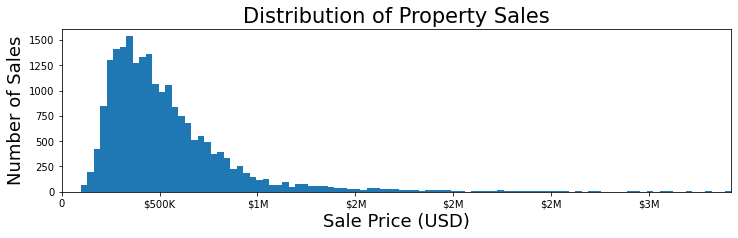

In [28]:
# Re-creating the distribution visualization again with the outliers removed

p_max = kc_target.max()

fig, ax = plt.subplots(figsize=(12, 3))

ax.hist(kc_target, bins=100)

ax.set_xbound(0, p_max)
ax.xaxis.set_major_formatter(viz_currency_formatter)

ax.set_xlabel("Sale Price (USD)", size=18)
ax.set_ylabel("Number of Sales", size=18)
ax.set_title("Distribution of Property Sales", size=21)

fig.set_facecolor('w')

fig.savefig('visuals/price_distribution_2.png' , bbox_inches='tight')

plt.show()

<h3 align='center'><strong>Numerical Features Distribution Visualizations</strong></h3>

I then created visualizations to explore the distributions of the numerical features.

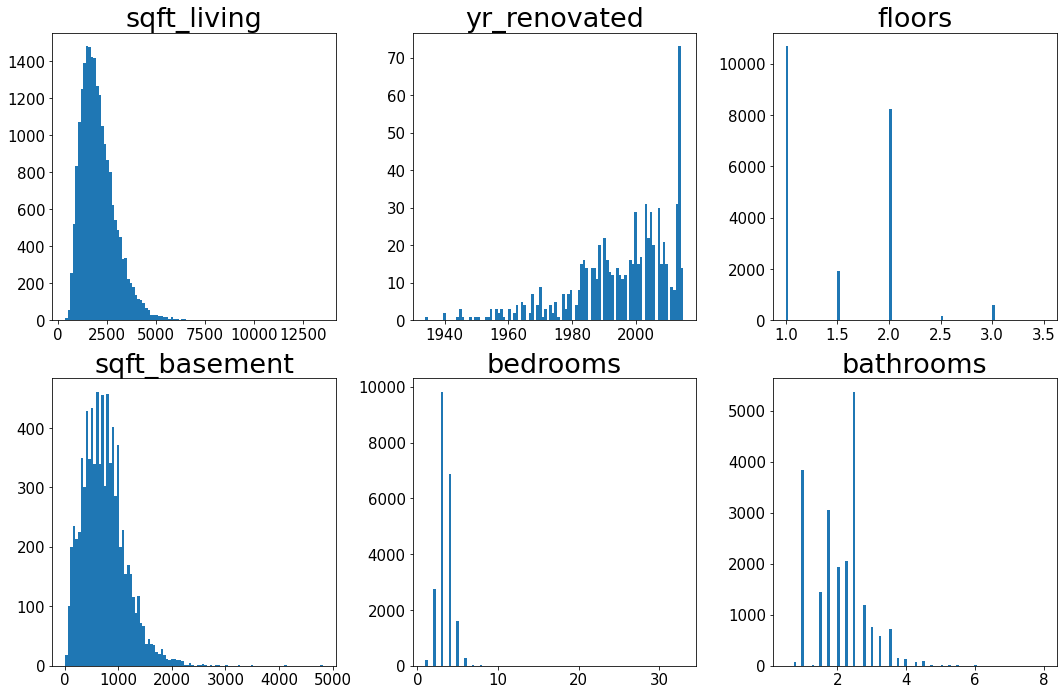

In [29]:
# Checking the distributions of the categorical features, which I changed accordingly after seeing the results

nums = len(kc_nums.columns)
n_rows = int(nums / 2)#

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 6), 
                        gridspec_kw={'wspace': .27})
axs = axs.flatten()

for c_i, col in enumerate(kc_nums.columns):
    
#     axs[c_i].hist(kc_nums[col], bins=100) # INITIAL EXPLORATION

    # Comment the following IF...ELSE statement and uncomment the line above to see the original
    # distributions
    #--------------------------------------------------------------------------------------------
    if col not in ['sqft_lot', 'sqft_basement', 'sqft_lot15', 'yr_built', 'yr_renovated']: 
        axs[c_i].hist(kc_nums[col], bins=100)
        
    else: axs[c_i].hist(kc_nums[col].loc[kc_nums[col] != 0], bins=100)
    #--------------------------------------------------------------------------------------------
    axs[c_i].set_title(col, size=27)
    axs[c_i].tick_params('both', labelsize=15)
    
fig.set_facecolor('w')
[ax.set_visible(False) for ax in axs if not ax.has_data()]

fig.savefig('visuals/numeric_features_distributions.png' , bbox_inches='tight')

plt.show()

There was a spike at 0 for the `sqft_basement` and `yr_renovated` columns.  It was, therefore, helpful to turn the `sqft_basement` and `yr_renovated` into categorical features by turning them into binary encoded features or splitting them into categories.  

I initially explored turning them into more complex categorical features, but in the end, I decided to turn them into binary features.

In [30]:
# Turning the 'sqft_basement' and 'yr_renovated' columns into binary features

kc_nums.sqft_basement = kc_nums.sqft_basement.map(lambda x: 1 if x!=0 else x).astype(int)
kc_nums.yr_renovated = kc_nums.yr_renovated.map(lambda x: 1 if x!=0 else x).astype(int)

I then switched the two columns I had restructured from the numerical features dataframe to the categorical features dataframe.

In [31]:
# I needed to see where to insert the columns

kc_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 2495 to 15937
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   condition              21597 non-null  object
 1   grade                  21597 non-null  object
 2   city                   21597 non-null  object
 3   yr_renovated_Missing   21597 non-null  int32 
 4   sqft_basement_Missing  21597 non-null  int32 
dtypes: int32(2), object(3)
memory usage: 843.6+ KB


In [32]:
# Switching the columns from the numerical features to the categorical features

kc_cats.insert(3, 'basement', kc_nums.sqft_basement)
kc_cats.insert(4, 'renovated', kc_nums.yr_renovated)

kc_nums.drop(['sqft_basement', 'yr_renovated'], axis=1, inplace=True)

I again eliminated any outliers to improve the performance of the model.

In [33]:
# Seeing the distrubution of the the remaining numerical features, showing they all basically had outliers

kc_nums.describe()

sqft_living        floors      bedrooms     bathrooms
count  21597.000000  21597.000000  21597.000000  21597.000000
mean    2080.321850      1.494096      3.373200      2.115826
std      918.106125      0.539683      0.926299      0.768984
min      370.000000      1.000000      1.000000      0.500000
25%     1430.000000      1.000000      3.000000      1.750000
50%     1910.000000      1.500000      3.000000      2.250000
75%     2550.000000      2.000000      4.000000      2.500000
max    13540.000000      3.500000     33.000000      8.000000

In [34]:
# Removing the outliers for all the numerical features

for n_col in kc_nums.columns:
    kc_nums = \
    kc_nums.loc[(kc_nums[n_col] >= kc_nums[n_col].quantile(.001)) & (kc_nums[n_col] <= kc_nums[n_col].quantile(.999))]

In [35]:
# Checking the results, which made things at least somewhat better

kc_nums.describe()

sqft_living        floors      bedrooms     bathrooms
count  21516.000000  21516.000000  21516.000000  21516.000000
mean    2071.606758      1.492959      3.368098      2.110011
std      884.408489      0.538509      0.888291      0.751313
min      530.000000      1.000000      1.000000      0.750000
25%     1430.000000      1.000000      3.000000      1.750000
50%     1910.000000      1.500000      3.000000      2.250000
75%     2550.000000      2.000000      4.000000      2.500000
max     7100.000000      3.000000      8.000000      5.250000

<a id='sub_sect_cat_feat_dist_viz'></a>

<h3 align='center'><strong>Categorical Features Distribution Visualizations</strong></h3>

After the numerical features were taken care of, I checked the distribution of the categorical variables. These would have to be encoded appropriately to be used in my model.

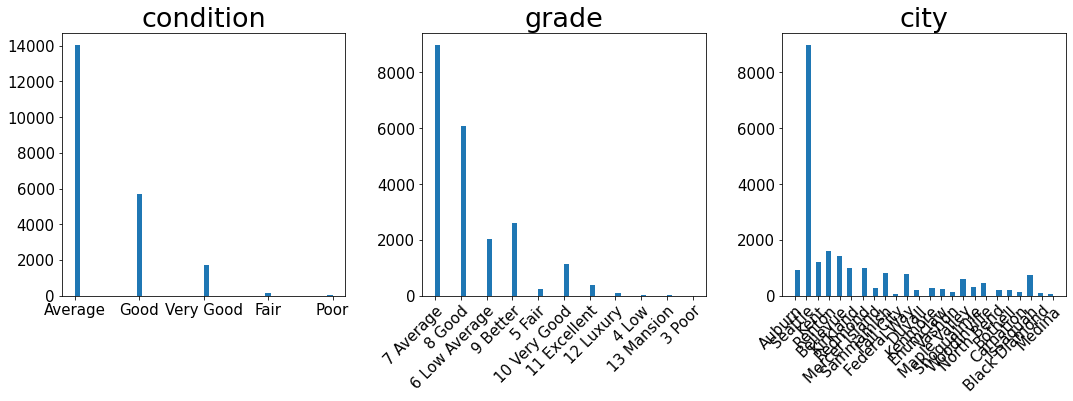

basement  renovated  yr_renovated_Missing  sqft_basement_Missing
0     12826      20853                 17755                  21143
1      8771        744                  3842                    454

In [36]:
# Creating both distribution visualizations for the non-binary features, 
# and a dataframe of the binary feature distrubitions

cats = len(kc_cats.columns)
n_rows = int(cats / 2)

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 6), 
                        gridspec_kw={'wspace': .27, 'hspace': .36})
axs = axs.flatten()

only_2_vals_df = pd.DataFrame()
empty_i = 0
for c_i, cat in enumerate(kc_cats.columns):
    
    ax_i = c_i if empty_i==0 else c_i - empty_i
    
    if kc_cats[cat].nunique() > 2:
        axs[ax_i].hist(kc_cats[cat], bins=50)
        axs[ax_i].set_title(cat, size=27)
        axs[ax_i].tick_params('both', labelsize=15)
        
        if cat in ['grade', 'view', 'city', 'yr_renovated', 'sqft_basement']:
            plt.setp(axs[ax_i].get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='top')
    else: 
        empty_i += 1
        only_2_vals_df = pd.concat([only_2_vals_df, kc_cats[cat].value_counts()], axis=1)

fig.set_facecolor('w')
[ax.set_visible(False) for ax in axs if not ax.has_data()]

fig.savefig('visuals/categorical_features_distributions.png' , bbox_inches='tight')

plt.show()

display(only_2_vals_df)

I found out later that empty spaces in the values of a column caused problems during my analysis.  Also, if you look at the visualizations above, the xticklabels in the three distributions seem out of order.  

I figured this would be an appropriate place to eliminate the spaces in the values of the `grade` and `condition` columns and create the sorting dictionaries I previously mentioned so that I could sort their `xticklabels`, as well as their dummy columns.

In [37]:
# Making the changes necessary for the `sklearn` functions to work properly

kc_cats.grade = kc_cats.grade.map(lambda x: x.replace(' ', '_'))
kc_cats.condition = kc_cats.condition.map(lambda x: x.replace(' ', '_'))
kc_cats.city = kc_cats.city.map(lambda x: x.replace(' ', '_'))

In [38]:
# Creating dictionaries to use later for sorting and other purposeses

grade_dict = {'3_Poor':1, '4_Low':2, '5_Fair':3, '6_Low_Average':4, '7_Average':5, '8_Good':6, 
              '9_Better':7, '10_Very_Good':8, '11_Excellent':9, '12_Luxury':10, '13_Mansion':11}

cond_dict = {'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very_Good':5}

all_dicts = {'grade': grade_dict, 'condition': cond_dict}

Analyzing the `value_counts()` for each categorical column, I found some categories with less than ten associated entries. I thought of these as the outliers of the categorical features, and I dropped them accordingly.

In [39]:
# Gerneating details on the non-binary columns and their categories, 
# while also creating a dictionary of low frequency categories

low_freq_cats = {}

for c_i, cat in enumerate(kc_cats.columns):
    n_cats = kc_cats[cat].nunique()
    cat_type = kc_cats[cat].dtype
    
    if cat_type!=object and n_cats>2:        
        num_cats = kc_cats[cat].value_counts().sort_index()
        low_cats = num_cats.loc[num_cats < 10].index
        for l_cat in low_cats: 
            if cat not in low_freq_cats.keys(): low_freq_cats[cat] = [l_cat]
            else: low_freq_cats[cat].append(l_cat)
                
        print(bold_red + str(c_i) +' - '+ cat + every_off +':\tnum_vals = '+ str(n_cats), cat_type)
        print(list(num_cats.index), '\n')
        
    if cat_type==object:
        if cat!='city': 
            cat_order = list(all_dicts[cat].keys())
            obj_cats = \
            kc_cats[cat].value_counts().sort_index(key=lambda cat_col: cat_col.map(lambda x: cat_order.index(x)))
        else: obj_cats = kc_cats[cat].value_counts()
            
        low_cats = obj_cats.loc[obj_cats < 10].index
        if not low_cats.empty: 
            for l_cat in low_cats: 
                if cat not in low_freq_cats.keys(): low_freq_cats[cat] = [l_cat]
                else: low_freq_cats[cat].append(l_cat)
        
        print(bold_red + str(c_i) +' - '+ cat + every_off +':\tnum_vals = '+ str(n_cats) +'\tdtype =', cat_type)
        print(list(obj_cats.index))
        print()

0 - condition:	num_vals = 5	dtype = object
['Poor', 'Fair', 'Average', 'Good', 'Very_Good']

1 - grade:	num_vals = 11	dtype = object
['3_Poor', '4_Low', '5_Fair', '6_Low_Average', '7_Average', '8_Good', '9_Better', '10_Very_Good', '11_Excellent', '12_Luxury', '13_Mansion']

2 - city:	num_vals = 24	dtype = object
['Seattle', 'Renton', 'Bellevue', 'Kent', 'Kirkland', 'Redmond', 'Auburn', 'Sammamish', 'Federal_Way', 'Issaquah', 'Maple_Valley', 'Woodinville', 'Snoqualmie', 'Kenmore', 'Mercer_Island', 'Enumclaw', 'North_Bend', 'Bothell', 'Duvall', 'Carnation', 'Vashon', 'Black_Diamond', 'Fall_City', 'Medina']



In [40]:
# Checking which categories were marked as low-frequency

low_freq_cats

{'grade': ['3_Poor']}

In [41]:
# Eliminating the low-frequency categories

for cat, low_cats in low_freq_cats.items():
    for l_cat in low_cats:
        low_index = list(kc_cats.loc[kc_cats[cat] == l_cat].index)
        if low_index: kc_cats.drop(low_index, inplace=True)

As I mentioned earlier, I found out later that empty spaces in the values of a column would cause problems in my analysis. This was also the case with `.`'s. Once they were in `str` format, I could then use the `.replace()` function to replace the `.`'s with `_`'s.

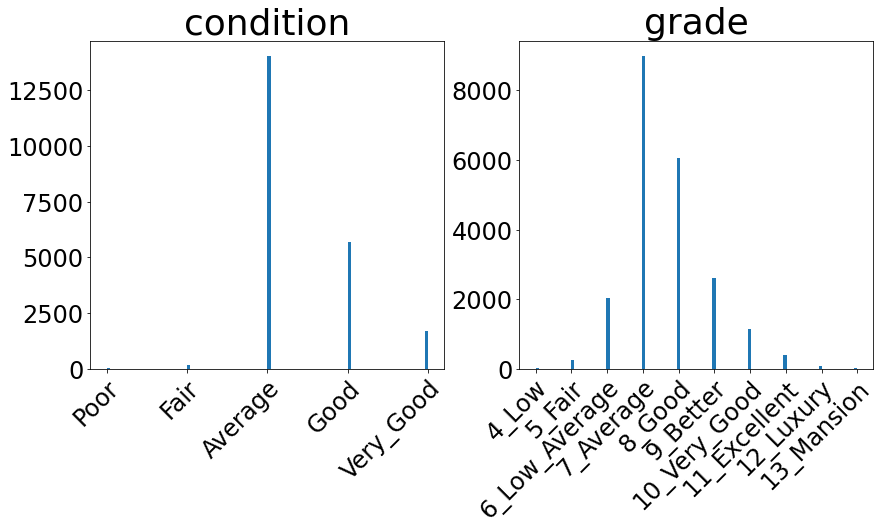

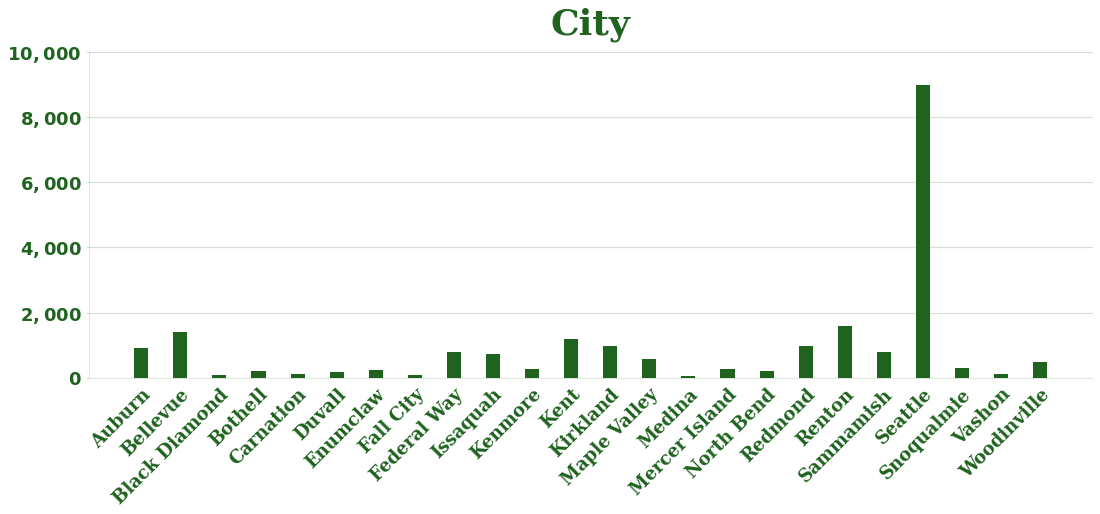

basement  renovated  yr_renovated_Missing  sqft_basement_Missing
0     12825      20852                 17754                  21142
1      8771        744                  3842                    454

In [42]:
# Creating updated and more organized distribution visualizations for the categorical features,
# as well as a separate visualziation for the `City` feature, 
# as I intended it to be used in my presentation and feature prominently on GitHub

cats = len(kc_cats.columns)
n_rows = int(cats / 2)

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, n_rows * 6), )
fig2, city_ax = plt.subplots(figsize=(18, 6))
axs = axs.flatten()

only_2_vals_df = pd.DataFrame()
empty_i = 0
city_i = 0
for c_i, cat in enumerate(kc_cats.columns):
    
    ax_i = c_i if empty_i==0 else c_i - empty_i if city_i==0 else c_i - empty_i - city_i
    
    if kc_cats[cat].nunique() > 2:
        plot_col = kc_cats[cat].copy()
        
        if cat != 'city': 
            cat_dict = all_dicts[cat].copy()

            if cat == 'view': 
                plot_col = plot_col.where(plot_col != 'NONE').dropna()
                del cat_dict['NONE']

            col_order = sorted(cat_dict.keys(), key=lambda k: cat_dict[k])
            plot_col = \
            plot_col.sort_values(key=lambda c_col: c_col.map(lambda x: col_order.index(x)))
            axs[ax_i].hist(plot_col, bins=100)
            
            axs[ax_i].tick_params('both', labelsize=15)
            plt.setp(axs[ax_i].get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='top')
            
            axs[ax_i].set_title(cat, size=36)
            
        else:
            
            # For this visualization the details were obviously more important
            
            city_i += 1
            c_step = 2000
            
            plot_col = plot_col.sort_values().map(lambda x: ' '.join(x.split('_')) if '_' in x else x)
            
            plot_col = plot_col.value_counts().sort_index()
            
            city_ax.bar(x=plot_col.index, height=plot_col.values, width=.36, color=get_lighter_color((.12, .39, .12), .09),
                        zorder=9)
            
            city_ax.grid(True, axis='y', lw=1.2, alpha=.81)
            [city_ax.spines[side].set_visible(False) for side in ['top', 'right']]
            city_ax.tick_params('both', labelsize=18, labelcolor=(.12, .39, .12))
            c_ticks = np.arange(0, plot_col.max() + c_step, c_step)
            def c_y_ticks(y, pos):
                return '$\mathbf{' + '{:,}'.format(y) + '}$'
            city_ax.set_yticks(c_ticks)
            city_ax.yaxis.set_major_formatter(c_y_ticks)
            plt.setp(city_ax.get_yticklabels(), weight='bold')
            plt.setp(city_ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right', va='top', family='serif',
                     weight='bold')
            
            city_ax.set_facecolor((0, 0, 0, 0))
            
            # Tick Params, Grid, Spines & Hline
            #-------------------------------------------------------------------------------------------------
            city_ax.tick_params('x', width=0)
            city_ax.tick_params('y', width=1.2, color=(.12, .39, .12, .18), labelcolor=(.12, .39, .12))

            city_ax.grid(True, 'major', 'y', lw=1.2, alpha=.18, c=(.12, .39, .12), zorder=0)

            city_ax.spines['right'].set_visible(False)
            [city_ax.spines[side].set_color((.12, .39, .12)) for ax in axs for side in ['left', 'top', 'bottom']]
            [city_ax.spines[side].set_alpha(.18) for ax in axs for side in ['left', 'top', 'bottom']]
            
            city_ax.set_title(cat.title(), size=36, pad=18, weight='bold', family='serif', color=(.12, .39, .12))
        
        if cat=='yr_built': axs[ax_i].tick_params('both', labelsize=21)
            
    else: 
        empty_i += 1
        only_2_vals_df = pd.concat([only_2_vals_df, kc_cats[cat].value_counts()], axis=1)
    
fig.tight_layout(h_pad=1.5, w_pad=3)
fig.set_facecolor('w')
fig2.set_facecolor((0, 0 , 0, 0))

[ax.set_visible(False) for ax in axs if not ax.has_data()]
[ax.tick_params('both', labelsize=24) for ax in [fig.axes[0]] + fig.axes[1:5] + fig.axes[6:7]]

fig.savefig('visuals/categorical_features_distributions_2.png' , bbox_inches='tight')
fig2.savefig('visuals/city_distribution.png', bbox_inches='tight')

plt.show()

display(only_2_vals_df)

<a id='sect_corr'></a>

<h2 align='center'><strong>Initial Correlation Examination</strong></h2>

The primary purpose of building a regression model is to find what impact an increase in one predictor, or ***independent*** variable, has on the target, or ***dependent*** variable, holding everything else constant.  Eliminating predictors already highly correlated with each other attempts to achieve that goal as closely as possible.  The eliminated predictors in this section could not be considered independent and would lead to unreliable statistical measurements.

In [43]:
# Creating a test df to explore correlations

kc_corr_test = pd.concat([kc_target, kc_nums, kc_cats], join='inner', axis=1)

kc_corr_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21487 entries, 2495 to 15937
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21487 non-null  float64
 1   sqft_living            21487 non-null  int64  
 2   floors                 21487 non-null  float64
 3   bedrooms               21487 non-null  int64  
 4   bathrooms              21487 non-null  float64
 5   condition              21487 non-null  object 
 6   grade                  21487 non-null  object 
 7   city                   21487 non-null  object 
 8   basement               21487 non-null  int32  
 9   renovated              21487 non-null  int32  
 10  yr_renovated_Missing   21487 non-null  int32  
 11  sqft_basement_Missing  21487 non-null  int32  
dtypes: float64(3), int32(4), int64(2), object(3)
memory usage: 1.8+ MB


In [44]:
# Replacing all categorical values with numeric values, as if I had encoded them

restruc_cols = list(kc_corr_test.columns[5:8])

for col in restruc_cols:
    if col!='city':        
        col_dict = all_dicts[col]
        kc_corr_test[col] = kc_corr_test[col].map(lambda x: col_dict[x])
    else:
        col_dict = {}
        for c_i, city in enumerate(kc_corr_test[col].unique()): col_dict[city] = c_i
        kc_corr_test[col] = kc_corr_test[col].map(lambda x: col_dict[x])

In [45]:
# I created a simple output to find the feature most correlated with the target,
# as well as a dataframe with any features that were highly correlated with each other

corr_df = kc_corr_test.corr()

# Varaibles' Correlations with the Target
#################################################################################################
price_corr = corr_df[['price']].copy()

price_corr.sort_values('price', ascending=False, inplace=True)

most_correlated_feature = price_corr.index[1]
most_correlated_value = price_corr.iloc[1][0]

print('\033[31m\033[4m\033[1mFeature Most Correlated with Price\033[0m:\t'+ most_correlated_feature)
print("\033[31m\033[4m\033[1mMost Correlated Feature's Value\033[0m:\t\t", round(most_correlated_value, 4))

# Varaibles' Correlation with Each Other
#################################################################################################
corr_df = corr_df.abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(['level_0', 'level_1'], axis=1, inplace=True)
corr_df.columns = ['correlation']

corr_df = corr_df[(corr_df.correlation > .8) & (corr_df.correlation < 1)]

display(corr_df)

Feature Most Correlated with Price:	sqft_living
Most Correlated Feature's Value:		 0.6878


Empty DataFrame
Columns: [correlation]
Index: []

<a id='sect_dummies'></a>

<h2 align='center'><strong>Dummy Variable Creation</strong></h2>

I used the `OneHotEncoder()` on the appropriate columns to create a properly encoded version of `kc_cats`. I also made a dictionary with the original categorical columns as the keys and the dummy columns created from each of them as the values for each key. Finally, I rearranged the columns of `kc_cats` in a way that I found more logical.

In [46]:
# Getting the order of columns to regroup them into appropriate lists

orig_cat_cols = list(kc_cats.columns)
[print(c_i, col) for c_i, col in enumerate(orig_cat_cols)];

0 condition
1 grade
2 city
3 basement
4 renovated
5 yr_renovated_Missing
6 sqft_basement_Missing


In [47]:
# Grouping the columns

missing_cols = orig_cat_cols[-2:]
orig_cat_cols = orig_cat_cols[:-2]

missing_cols

['yr_renovated_Missing', 'sqft_basement_Missing']

In [48]:
# Checking the order of the columns in the already prepared lists

num_cols = list(kc_nums.columns)

print(num_cols, '\n')
print(orig_cat_cols)

['sqft_living', 'floors', 'bedrooms', 'bathrooms'] 

['condition', 'grade', 'city', 'basement', 'renovated']


In [49]:
# Reorgnazing the columns into a way I found more logical and making sure I didn't miss any

new_cat_order = ['renovated', 'basement', 'grade', 'condition', 'city']

assert len(new_cat_order)==len(orig_cat_cols)

In [50]:
# Encdoding each of the categorical features that still required encoding and creating dictionaries with the
# original columns as the keys and their encoded columns as the values

kc_coded_cats = pd.DataFrame()
cat_dummy_dict = {}
for n_cat in num_cols:
    cat_dummy_dict[n_cat] = n_cat

for c_i, cat in enumerate(new_cat_order):
    if kc_cats[cat].nunique() <= 2: 
        cat_df = kc_cats[cat]
        cat_dummy_dict[cat] = cat
    else:
        cat_col = kc_cats[[cat]].applymap(lambda x: cat +'_'+ x)
        
        if cat!='city':
            cat_order = [cat +'_'+ sub_cat for sub_cat in list(all_dicts[cat].keys())]
            
            ohe_encoder = OneHotEncoder(categories=[cat_order], drop='first', sparse=False)
            ohe_encoder.fit(cat_col)
            coded_cat = ohe_encoder.transform(cat_col)
            
            cat_df = pd.DataFrame(coded_cat, columns=list(ohe_encoder.categories_[0])[1:], index=kc_cats.index)
        
            cat_dummy_dict[cat] = list(ohe_encoder.categories_[0])[1:]

        if cat=='city':
            ohe_encoder = OneHotEncoder(categories='auto', drop='first', sparse=False)
            ohe_encoder.fit(cat_col)
            coded_cat = ohe_encoder.transform(cat_col)

        cat_df = pd.DataFrame(coded_cat, columns=list(ohe_encoder.categories_[0])[1:], index=kc_cats.index)
        
        cat_dummy_dict[cat] = list(ohe_encoder.categories_[0])[1:]
        
    kc_coded_cats = pd.concat([kc_coded_cats, cat_df], axis=1)

In [51]:
# Finalizing my `cat_dummy_dict` with the encoded missing cols

cat_dummy_dict['_Missing'] = missing_cols

In [52]:
# Uncomment the line below to see the `cat_dummy_dict`

# [print(cat, '\n', dum_cols, '\n') for cat, dum_cols in cat_dummy_dict.items()];

<a id='sect_preproc'></a>

<h2 align='center'><strong>Preprocessed DataFrames</strong></h2>

The last visualization I created shows that there were significantly more entries within Seattle than in the rest of the cities.  To explore the difference between the sales of residential properties inside Seattle vs. outside Seattle and which predictors were significant for each, as well as the difference between the coefficients of the critical predictors shared by both, I created a separate preprocessed dataframe for each.  Of course, I also made a preprocessed dataframe for King County.  Beyond the intrinsic value of building a model for the entire county, it also had the added benefit of serving as a useful comparison to the results of the separated dataframes.

In [53]:
# Splitting the data into properties inside of Seattle and properties Outside of Seattle 
# and checking how many were in each

seattle_entries = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 1].shape[0]
out_seattle_entries = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 0].shape[0]

print(bold_red +'Number of Entries Inside Seattle'+ every_off +':\t'+ str(seattle_entries))
print(bold_red +'Number of Entries Outside Seattle'+ every_off +':\t'+ str(out_seattle_entries))

Number of Entries Inside Seattle:	8973
Number of Entries Outside Seattle:	12623


<h3 align='center'><strong>All King County Preprocessed DataFrame</strong></h3>

In the following cells, I combined the target variable, the numerical features, and the categorical features into the preprocessed dataframe for all of King County.  I then removed the dummy columns created from the `city` column. I did this because I made entirely separate models based on the `city` feature, and keeping them would only add additional noise at this point.  I then split the preprocessed dataframes into their `x` and `y` components.  I performed one final check to ensure no categorical variables were present with low frequencies and that the `X` and `y` components of the dataframe had the same `x-component` in their `shape`s, i.e., the same length.

In [54]:
# Combining the target, the numerical df, and the categorical df

kc_preproc = pd.concat([kc_target, kc_nums, kc_coded_cats], join='inner', axis=1)

In [55]:
# Removing the `city_` columns

kc_preproc = kc_preproc.loc[:, list(kc_preproc.columns.map(lambda x: 'city' not in x))]

In [56]:
# Making sure they were removed

not any(kc_preproc.columns.map(lambda x: 'city' in x))

True

In [57]:
# Splitting the df into its `X` and `y` components

kc_X = kc_preproc.drop('price', axis=1)
kc_y = kc_preproc['price']

In [58]:
# Creating dataframes of the sums of the binary encoded columns

kc_X_sums = kc_X[[col for col in kc_preproc.columns if col in kc_coded_cats.columns]].sum()
kc_X_sums = pd.DataFrame(kc_X_sums.values, index=kc_X_sums.index)

In [59]:
# Using that dataframe to filter out low frequency columns and then dropping those columns from the model's features

kc_less_10_entries = kc_X_sums.loc[kc_X_sums[0] < 10].sort_values(0)

kc_X.drop(list(kc_less_10_entries.index), axis=1, inplace=True)

In [60]:
# Making sure the X and y components were the same shape

assert kc_X.shape[0]==kc_y.shape[0]

<h3 align='center'><strong>Seattle Preprocessed DataFrame</strong></h3>

For the Seattle Preprocessed DataFrame, I performed the same steps described in the All King County Preprocessed DataFrame; I separated only the Seattle properties from `kc_coded_cats`.

In [61]:
# Creating the inside Seattle version of the categorical dataframe

kc_coded_cats_seattle = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 1].copy()

In [62]:
# Removing the `city_` columns from the inside Seattle version of the categorical dataframe

kc_coded_cats_seattle = \
kc_coded_cats_seattle.loc[:, list(kc_coded_cats_seattle.columns.map(lambda x: 'city' not in x))]

In [63]:
# Making sure they were removed

not any(kc_coded_cats_seattle.columns.map(lambda x: 'city' in x))

True

In [64]:
# Combining the target, the numerical df, and the Seattle categorical df

kc_preproc_seattle = pd.concat([kc_target, kc_nums, kc_coded_cats_seattle], join='inner', axis=1)

In [65]:
# Splitting the df into its `X` and `y` components

kc_X_seattle = kc_preproc_seattle.drop('price', axis=1)
kc_y_seattle = kc_preproc_seattle['price']

In [66]:
# Creating dataframes of the sums of the binary encoded columns

seattle_X_sums = kc_X_seattle[kc_coded_cats_seattle.columns].sum()
seattle_X_sums = pd.DataFrame(seattle_X_sums.values, index=seattle_X_sums.index)

In [67]:
# Using that dataframe to filter out low frequency columns and then dropping those columns from the model's features

seattle_less_10_entries = seattle_X_sums.loc[seattle_X_sums[0] < 10].sort_values(0)

kc_X_seattle.drop(list(seattle_less_10_entries.index), axis=1, inplace=True)

In [68]:
# Making sure the X and y components were the same shape

assert kc_X_seattle.shape[0]==kc_y_seattle.shape[0]

<h3 align='center'><strong>Outside Seattle Preprocessed DataFrame</strong></h3>

I separated the properties outside of Seattle from `kc_coded_cats`, then performed the same steps as in the previous two sections to create the Outside Seattle Preprocessed DataFrame.

In [69]:
# Creating the outside Seattle version of the categorical dataframe

kc_coded_cats_out_seattle = kc_coded_cats.loc[kc_coded_cats.city_Seattle == 0].copy()

In [70]:
# Removing the `city_` columns from the outside Seattle version of the categorical dataframe

kc_coded_cats_out_seattle = \
kc_coded_cats_out_seattle.loc[:, list(kc_coded_cats_out_seattle.columns.map(lambda x: 'city' not in x))]

In [71]:
# Making sure they were removed

not any(kc_coded_cats_seattle.columns.map(lambda x: 'city' in x))

True

In [72]:
# Combining the target, the numerical df, and the outside Seattle categorical df

kc_preproc_out_seattle = \
pd.concat([kc_target, kc_nums, kc_coded_cats_out_seattle], join='inner', axis=1)

In [73]:
# Splitting the df into its `X` and `y` components

kc_X_out_seattle = kc_preproc_out_seattle.drop('price', axis=1)
kc_y_out_seattle = kc_preproc_out_seattle['price']

In [74]:
# Creating dataframes of the sums of the binary encoded columns

out_seattle_X_sums = kc_X_out_seattle[kc_coded_cats_out_seattle.columns].sum()
out_seattle_X_sums = pd.DataFrame(out_seattle_X_sums.values, index=out_seattle_X_sums.index)

In [75]:
# Using that dataframe to filter out low frequency columns and then dropping those columns from the model's features

out_seattle_less_10_entries = out_seattle_X_sums.loc[out_seattle_X_sums[0] < 10].sort_values(0)

kc_X_out_seattle.drop(list(out_seattle_less_10_entries.index), axis=1, inplace=True)

In [76]:
# Making sure the X and y components were the same shape

assert kc_X_out_seattle.shape[0]==kc_y_out_seattle.shape[0]

<a id='sect_model_iter'></a>

<h1 align='center'><strong>Model Iterations</strong></h1>

<a id='sect_base_models'></a>

<h2 align='center'><strong>Base Models</strong></h2>

With the preprocessed dataframes ready, I could begin building models.  The base models for each preprocessed dataframe are just the relationship between the most correlated feature, `sqft_living`, and the target variable, `price`, which will be used to judge the performance of future models.

In [77]:
# All King County Base Model

kc_base_const = sm.add_constant(kc_X[most_correlated_feature])
kc_base_model = sm.OLS(endog=kc_y, exog=kc_base_const).fit()

In [78]:
# Seattle Base Model

base_const_seattle = sm.add_constant(kc_X_seattle[most_correlated_feature])
seattle_base_model = sm.OLS(endog=kc_y_seattle, exog=base_const_seattle).fit()

In [79]:
# Outside Seattle Base Model

base_const_out_seattle = sm.add_constant(kc_X_out_seattle[most_correlated_feature])
out_seattle_base_model = sm.OLS(endog=kc_y_out_seattle, exog=base_const_out_seattle).fit()

<a id='sect_full'></a>

<h2 align='center'><strong>Full Models</strong></h2>

After getting a baseline for each preprocessed dataframe, I created models for each with all the predictors available.  I then began eliminating them to create a final model with only the best predictors.  First, I removed predictors based on their `Variance Inflation Factor (VIF)` scores to stop predictors with high levels of multicollinearity missed by my initial correlation examination.  I then used the `RFECV` feature selection method to eliminate all but the best predictors.  Finally, I eliminated all predictors with `pvalues` less than the standard confidence level of `0.05` to only include the predictors of the highest statistical significance.

Once the predictors for each model were finalized, I could investigate the `Linearity, Normality, and Homoscedasticity` of the predicted values generated by each model.  For each model, a log transformation of the target variable was necessary for the model to meet the assumptions required when building multiple linear regression models.  I then had a final equation that I could analyze to produce my [Insights, Conclusions, and Recommendations](#sect_insights_and_conclusions).  I transformed the coefficients in the equation to make understanding them more accessible.

I also created simple dataframes with the coefficients, the  𝑟2, and the adjusted  𝑟2  scores from each model to make comparisons between the models easier.

After I had created the comparison dataframes for each of the models, I could [analyze the performance of the models](#sect_mod_anal).

<a id='sub_sect_kc'></a>

<h3 align='center'><strong>All King County Full Model</strong></h3>

In [80]:
# Created an appropriate copy of the X component to make sure I could still access the original without changes
# if necessary

kc_X_full = kc_X.copy()

In [81]:
# All King County First Full Model

kc_full_const = sm.add_constant(kc_X_full)
kc_full_model = sm.OLS(endog=kc_y, exog=kc_full_const).fit()

<h4><strong><code>kc_VIF</code></strong></h4>

In [82]:
# VIF Elimination
# Removing one dummy column from each group created from the original columns (if it was a dummy column)
# Removed the columns with a high VIF first
# Removed the columns with a mid VIF second
# Printed the details on which columns were dropped at each iteration

vif_compl = 0
while not vif_compl:
    high_cols_dict = {}
    mid_cols_dict = {}

    full_const = sm.add_constant(kc_X_full)
    kc_full_VIF_model = sm.OLS(endog=kc_y, exog=full_const).fit()

    vif = [variance_inflation_factor(full_const.values, i) for i in range(full_const.shape[1])]
    vif_df = pd.DataFrame(vif, index=full_const.columns, columns=["Variance Inflation Factor"])

    high_vif_cols = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].index)
    high_vif_vals = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].values)
    if 'const' in high_vif_cols: 
        h_i = high_vif_cols.index('const')
        high_vif_cols.remove('const')
        high_vif_vals.pop(h_i)

    mid_vif_cols = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].index)

    mid_vif_vals = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].values)

    if 'const' in mid_vif_cols:         
        m_i = mid_vif_cols.index('const')
        mid_vif_cols.remove('const')
        mid_vif_vals.pop(m_i)

    for g_i, col_grp in enumerate([high_vif_cols, mid_vif_cols]):
        if g_i==0: grp_dict, grp_vals = high_cols_dict, high_vif_vals
        if g_i==1: grp_dict, grp_vals = mid_cols_dict, mid_vif_vals
        if col_grp:
            for c_i, col in enumerate(col_grp):
                if col in grp_dict.keys(): grp_dict[col] += grp_vals[c_i]
                else: grp_dict[col] = grp_vals[c_i]
                    
    high_cols_df = pd.DataFrame(high_cols_dict.values(), high_cols_dict.keys(), columns=['VIF'])
    mid_VIF_cols_df = pd.DataFrame(mid_cols_dict.values(), mid_cols_dict.keys(), columns=['VIF'])
    
    kc_VIF = high_cols_df.sort_values('VIF', ascending=False)
    mid_VIF_cols_df = mid_VIF_cols_df.sort_values('VIF', ascending=False)
    
    VIF_drop_cols = []
    for o_col in list(cat_dummy_dict.keys())[:-1]:
        if any(kc_VIF.index.map(lambda x: o_col in x)):
            first_pred_col = kc_VIF.loc[kc_VIF.index.map(lambda x: o_col in x)].index[0]
            VIF_drop_cols.append(first_pred_col)
    
    if VIF_drop_cols: 
        kc_X_full.drop(VIF_drop_cols, axis=1, inplace=True)
        print(bold_red +'High VIF Dropped Columns'+ every_off, '\n', VIF_drop_cols, '\n')
        
    if not VIF_drop_cols and not mid_VIF_cols_df.empty: 
        mid_VIF_drop_cols = []
        for o_col in list(cat_dummy_dict.keys())[:-1]:
            if any(mid_VIF_cols_df.index.map(lambda x: o_col in x)):
                first_pred_col = mid_VIF_cols_df.loc[mid_VIF_cols_df.index.map(lambda x: o_col in x)].index[0]
                mid_VIF_drop_cols.append(first_pred_col)
            
        if mid_VIF_drop_cols: 
            kc_X_full.drop(mid_VIF_drop_cols, axis=1, inplace=True)
            print(bold_red +'Mid VIF Dropped Columns'+ every_off, '\n', mid_VIF_drop_cols, '\n')
            
    if not VIF_drop_cols and mid_VIF_cols_df.empty:  vif_compl = 1

print(bold_red +'VIF Elimination Finished'+ every_off)

High VIF Dropped Columns 
 ['grade_7_Average', 'condition_Average'] 

VIF Elimination Finished


<h4><strong><code>kc_RFECV</code></strong></h4>

In [83]:
# RFECV Elimination
# This used machine learning to basically let the computer choose the best features, dropping the worst columns

best_model_found = 0
RFECV_round = 0
while not best_model_found:
    
    full_const = sm.add_constant(kc_X_full)
    kc_full_RFECV_model = sm.OLS(endog=kc_y, exog=full_const).fit()
    
    splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=36)
    kc_X_for_RFECV = StandardScaler().fit_transform(kc_X_full)
    model_for_RFECV = LinearRegression()
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(kc_X_for_RFECV, kc_y)
    
    RFECV_bad_cols = [col for c_i, col in enumerate(kc_X_full.columns) if not selector.support_[c_i]]
    
    if RFECV_bad_cols:
        REFCV_drop_cols = []
        for o_col in list(cat_dummy_dict.keys()):
            o_df = pd.DataFrame()
            for r_col in RFECV_bad_cols:
                if r_col.startswith(o_col) or r_col.endswith(o_col):
                    r_prob, r_coef = kc_full_RFECV_model.pvalues[r_col], kc_full_RFECV_model.params[r_col]
                    r_df = pd.DataFrame([r_prob, r_coef], columns=[r_col], index=['p_value', 'coeff']).transpose()
                    o_df = pd.concat([o_df, r_df])
            if not o_df.empty:
                o_max_col = o_df.loc[o_df.p_value == o_df.p_value.max()].index[0]
                REFCV_drop_cols.append(o_max_col)
        RFECV_round += 1
        
        kc_X_full.drop(REFCV_drop_cols, axis=1, inplace=True)
        print(bold_red +'RFECV Dropped Columns'+ every_off, '\n', REFCV_drop_cols, '\n')
        
    else: best_model_found = 1
        
print(bold_red +'RFECV Finished'+ every_off)

RFECV Dropped Columns 
 ['grade_4_Low', 'condition_Fair'] 

RFECV Finished


<h4><strong><code>kc_pvals</code></strong></h4>

In [84]:
# High `P-values` Elimination
# Removing the column with the highest p-value at each iteration and printing the results

high_pvals = 1

while high_pvals:
    
    kc_pval_const = sm.add_constant(kc_X_full)
    kc_pval_model = sm.OLS(endog=kc_y, exog=kc_pval_const).fit()
    
    high_pval_list = list(kc_pval_model.pvalues.loc[kc_pval_model.pvalues >= .05].sort_values(ascending=False).index)
    
    if high_pval_list:
        high_pval_drop_col = high_pval_list[0]
        kc_X_full.drop(high_pval_drop_col, axis=1, inplace=True)
        print(str(high_pvals) +' - '+ bold_red +'High p-value Column Dropped'+ every_off +':\n', high_pval_drop_col, '\n')
        high_pvals += 1
        
    else: high_pvals = 0
        
print(bold_red +'High p_value Elimination Finsihed'+ every_off)        

High p_value Elimination Finsihed


<h4 align='center'><strong><code>kc_fin_model</code></strong></h4>

In [85]:
# Simply renaming the last version of the model that was created as the final model

kc_fin_const = kc_pval_const
kc_fin_model = kc_pval_model

<h5 align='center'><strong>Investigating the Linearity, Normality, and Homoscedasticity of <code>kc_fin_model</code></strong></h5>

In [86]:
# Changing the `rcParams` to make my visualizaitons look better

plt.rc('figure', figsize=(18, 18), facecolor=(0, 0, 0, 0))
plt.rc('axes', titlesize=24, titlepad=18, titleweight='bold', labelsize=21, labelpad=9, 
       facecolor=(0, 0, 0, 0))
plt.rc('xtick', labelsize=18)
plt.rc('xtick.major', size=9)
plt.rc('ytick', labelsize=18)
plt.rc('ytick.major', size=9)
plt.rc('legend', fontsize=18)

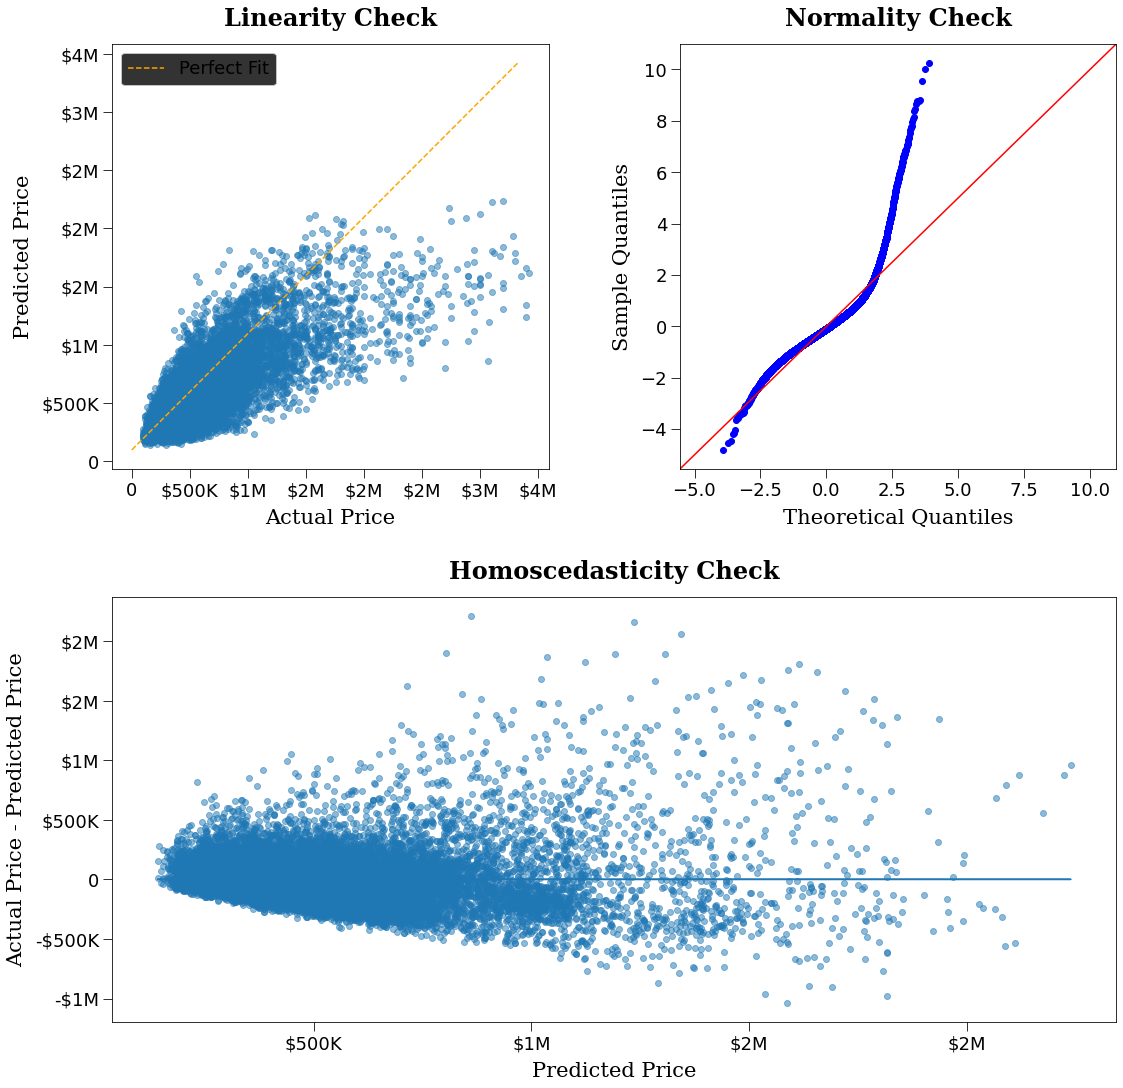

In [87]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

kc_preds = kc_fin_model.predict(kc_fin_const)
perfect_line = np.arange(kc_y.min(), kc_y.max())
kc_resids = (kc_y - kc_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_y, kc_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(kc_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')

homo_ax.scatter(kc_preds, kc_resids, alpha=0.5)
homo_ax.plot(kc_preds, [0 for i in range(len(kc_X_full))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

for a_i, ax in enumerate([lin_ax, norm_ax, homo_ax]):
    if a_i!=1:
        ax.xaxis.set_major_formatter(viz_currency_formatter)
        ax.yaxis.set_major_formatter(viz_currency_formatter)
    else: 
        ax.set_xlabel(ax.get_xlabel(), family='serif')
        ax.set_ylabel(ax.get_ylabel(), family='serif')
    
fig.savefig('visuals/kc_model_check.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong><code>kc_log_model</code></strong></h4>

In [88]:
# Only log transforming the target (y component)

kc_log_y = np.log(kc_y)

In [89]:
# Creating the log model

kc_log_const = sm.add_constant(kc_X_full)
kc_log_model = sm.OLS(endog=kc_log_y, exog=kc_log_const).fit()

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>kc_log_model</code></strong></h5>

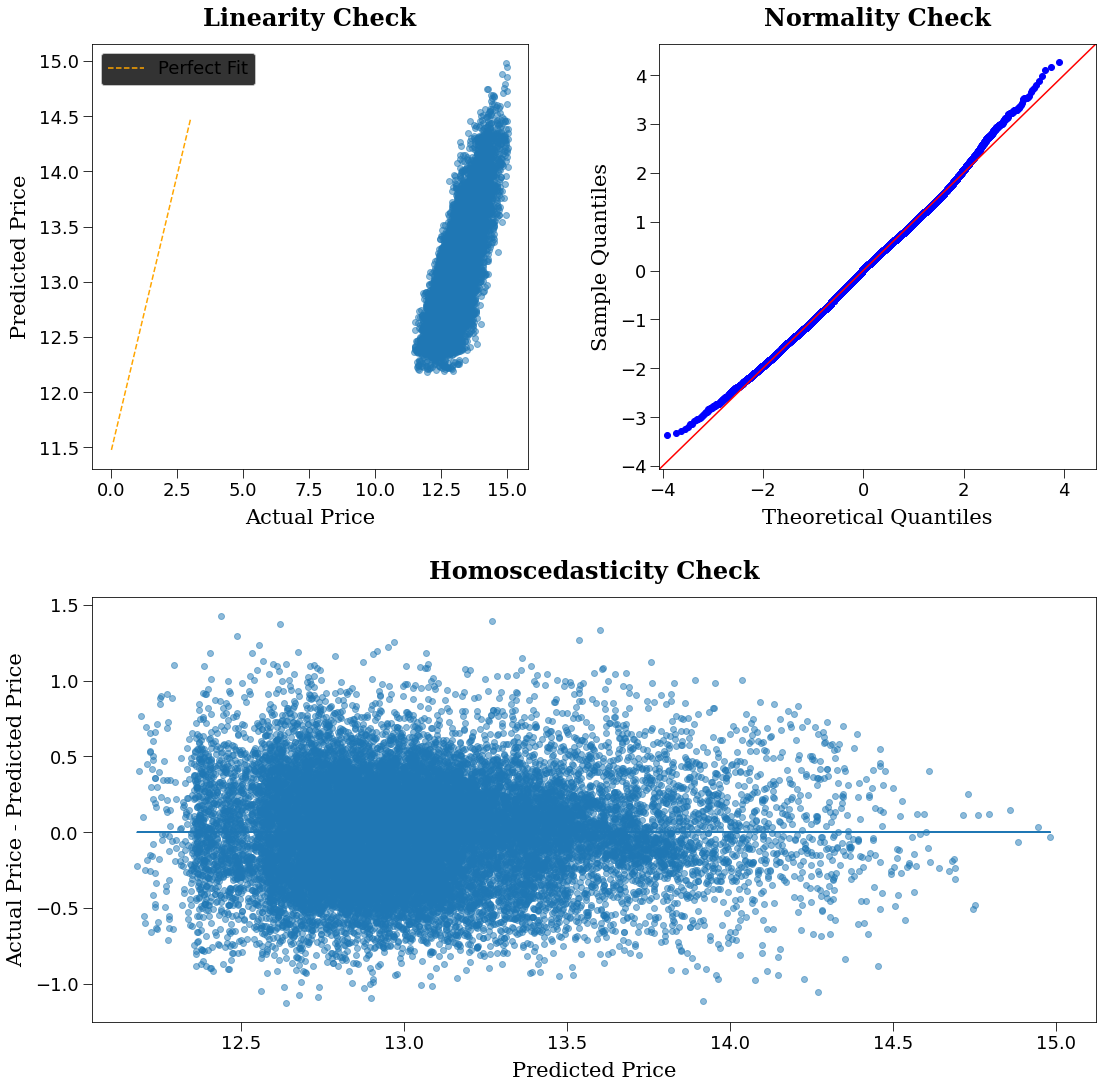

In [90]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

kc_preds = kc_log_model.predict(kc_log_const)
perfect_line = np.arange(kc_log_y.min(), kc_log_y.max())
kc_resids = (kc_log_y - kc_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_log_y, kc_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(kc_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')
norm_ax.set_xlabel(norm_ax.get_xlabel(), family='serif')
norm_ax.set_ylabel(norm_ax.get_ylabel(), family='serif')

homo_ax.scatter(kc_preds, kc_resids, alpha=0.5)
homo_ax.plot(kc_preds, [0 for i in range(len(kc_X_full))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

fig.savefig('visuals/kc_model_check_log.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong>Comparing <code>kc</code> Models</strong></h4>

In [91]:
# Creating lists of the models and their names in str format to zip() thru to create the comparison dataframe

kc_model_list = [kc_base_model, kc_full_model, kc_full_VIF_model, kc_full_RFECV_model, kc_fin_model, kc_log_model]
kc_model_names = ['base', 'full', 'full_VIF', 'full_RFECV', 'fin', 'log']

In [92]:
# Creating the comparison dataframe

kc_r_vals = {}
kc_r_adj_vals = {}
kc_compare_params_df = pd.DataFrame()
for ols_i, (ols_model, model_name) in enumerate(zip(kc_model_list, kc_model_names)):
    model_params = ols_model.params    
    model_params.name = model_name    
    kc_r_vals[model_name] = ols_model.rsquared
    kc_r_adj_vals[model_name] = ols_model.rsquared_adj
    
    kc_compare_params_df = pd.concat([kc_compare_params_df, model_params], axis=1)    
    
for r_i, r_dict in enumerate([kc_r_vals, kc_r_adj_vals]):
    r_name = 'r_score' if r_i==0 else 'r_adj_score'
    r_ser = pd.DataFrame(r_dict.values(), index=r_dict.keys(), columns=[r_name]).transpose()
    
    kc_compare_params_df = pd.concat([kc_compare_params_df, r_ser])    

In [93]:
# Rounding columns for readability and displaying the comparision dataframe

for col in kc_compare_params_df.columns[:-1]:
    kc_compare_params_df[col] = kc_compare_params_df[col].round(2)
    
display(kc_compare_params_df)

base        full    full_VIF  full_RFECV         fin  \
const               -9971.04  1703859.53   154498.66   154081.19   154081.19   
sqft_living           263.16      140.41      146.48      146.51      146.51   
floors                   NaN    22726.76    23217.92    23243.39    23243.39   
bedrooms                 NaN   -21777.63   -23178.87   -23123.99   -23123.99   
bathrooms                NaN   -11206.55   -11716.30   -11679.28   -11679.28   
renovated                NaN   181119.06   181923.97   181930.52   181930.52   
basement                 NaN    69626.24    68594.06    68635.80    68635.80   
grade_4_Low              NaN -1517768.34   -45367.09         NaN         NaN   
grade_5_Fair             NaN -1524888.40   -55131.79   -54848.37   -54848.37   
grade_6_Low_Average      NaN -1504414.35   -37038.44   -36835.73   -36835.73   
grade_7_Average          NaN -1465915.91         NaN         NaN         NaN   
grade_8_Good             NaN -1385018.24    77346.95    77366.58    77366.58   
grade_9_Better           NaN -1233625.54   224878.96   224842.46   224842.46   
grade_10_Very_Good       NaN -1024006.32   430919.78   430839.46   430839.46   
grade_11_Excellent       NaN  -730707.33   719936.13   719795.31   719795.31   
grade_12_Luxury          NaN  -410107.78  1036957.95  1036795.91  1036795.91   
condition_Fair           NaN   -77405.19     1475.96         NaN         NaN   
condition_Average        NaN   -79715.71         NaN         NaN         NaN   
condition_Good           NaN   -17962.22    60874.46    60830.85    60830.85   
condition_Very_Good      NaN    65505.18   144022.38   144020.17   144020.17   
r_score                 0.47        0.60        0.59        0.59        0.59   
r_adj_score             0.47        0.60        0.59        0.59        0.59   

                           log  
const                12.417573  
sqft_living           0.000217  
floors                0.063402  
bedrooms             -0.028573  
bathrooms            -0.028328  
renovated             0.243595  
basement              0.130915  
grade_4_Low                NaN  
grade_5_Fair         -0.319194  
grade_6_Low_Average  -0.186912  
grade_7_Average            NaN  
grade_8_Good          0.202094  
grade_9_Better        0.429572  
grade_10_Very_Good    0.613032  
grade_11_Excellent    0.773969  
grade_12_Luxury       0.928581  
condition_Fair             NaN  
condition_Average          NaN  
condition_Good        0.093225  
condition_Very_Good   0.228394  
r_score               0.581526  
r_adj_score           0.581234

In [94]:
# print(kc_compare_params_df.round(2).fillna('-').to_markdown(colalign=['center']*7, floatfmt='.2f'))

<h4 align='center'><strong>Final <code>kc</code> Equation</strong></h4>

In [95]:
# Taking the pieces of the final equation and making them more readable

kc_log_int = int(np.exp(kc_compare_params_df.log.dropna()[0]))
kc_log_percs = kc_compare_params_df.log.dropna()[1:-2] * 100

In [96]:
# Continuing the process of making the pieces of the equation more readable

kc_fin_percs = list(kc_log_percs.values.astype(int))
kc_fin_preds = list(kc_log_percs.index)

In [97]:
# Creating strings of the pieces of the equation with their column names

kc_perc_eq = ['{}% * {}'.format(perc, pred) for perc, pred in zip(kc_fin_percs, kc_fin_preds)]

In [98]:
# Putting the pieces together in a readable format

model_eq = 'price = '
model_int_string = str(kc_log_int) +' +\n'
model_var_string = ' +\n'.join(kc_perc_eq)

In [99]:
# Putting the final equation together and printing it

kc_log_eq = model_eq + model_int_string + model_var_string

print(kc_log_eq)

price = 247106 +
0% * sqft_living +
6% * floors +
-2% * bedrooms +
-2% * bathrooms +
24% * renovated +
13% * basement +
-31% * grade_5_Fair +
-18% * grade_6_Low_Average +
20% * grade_8_Good +
42% * grade_9_Better +
61% * grade_10_Very_Good +
77% * grade_11_Excellent +
92% * grade_12_Luxury +
9% * condition_Good +
22% * condition_Very_Good


<a id='sub_sect_seattle'></a>

<h3 align='center'><strong>Seattle Full Model</strong></h3>

In [100]:
# Inside Seattle First Full Model

seattle_full_const = sm.add_constant(kc_X_seattle)
seattle_full_model = sm.OLS(endog=kc_y_seattle, exog=seattle_full_const).fit()

<h4><strong><code>seattle_VIF</code></strong></h4>

In [101]:
# VIF Elimination
# Removing one dummy column from each group created from the original columns (if it was a dummy column)
# Removed the columns with a high VIF first
# Removed the columns with a mid VIF second
# Printed the details on which columns were dropped at each iteration

vif_compl = 0
while not vif_compl:
    high_cols_dict = {}
    mid_cols_dict = {}

    full_const = sm.add_constant(kc_X_seattle)
    seattle_full_VIF_model = sm.OLS(endog=kc_y_seattle, exog=full_const).fit()

    vif = [variance_inflation_factor(full_const.values, i) for i in range(full_const.shape[1])]
    vif_df = pd.DataFrame(vif, index=full_const.columns, columns=["Variance Inflation Factor"])

    high_vif_cols = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].index)
    high_vif_vals = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].values)
    if 'const' in high_vif_cols: 
        h_i = high_vif_cols.index('const')
        high_vif_cols.remove('const')
        high_vif_vals.pop(h_i)

    mid_vif_cols = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].index)

    mid_vif_vals = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].values)

    if 'const' in mid_vif_cols:         
        m_i = mid_vif_cols.index('const')
        mid_vif_cols.remove('const')
        mid_vif_vals.pop(m_i)

    for g_i, col_grp in enumerate([high_vif_cols, mid_vif_cols]):
        if g_i==0: grp_dict, grp_vals = high_cols_dict, high_vif_vals
        if g_i==1: grp_dict, grp_vals = mid_cols_dict, mid_vif_vals
        if col_grp:
            for c_i, col in enumerate(col_grp):
                if col in grp_dict.keys(): grp_dict[col] += grp_vals[c_i]
                else: grp_dict[col] = grp_vals[c_i]
                    
    high_cols_df = pd.DataFrame(high_cols_dict.values(), high_cols_dict.keys(), columns=['VIF'])
    mid_VIF_cols_df = pd.DataFrame(mid_cols_dict.values(), mid_cols_dict.keys(), columns=['VIF'])
    
    seattle_VIF = high_cols_df.sort_values('VIF', ascending=False)
    mid_VIF_cols_df = mid_VIF_cols_df.sort_values('VIF', ascending=False)
    
    VIF_drop_cols = []
    for o_col in list(cat_dummy_dict.keys())[:-1]:
        if any(seattle_VIF.index.map(lambda x: o_col in x)):
            first_pred_col = seattle_VIF.loc[seattle_VIF.index.map(lambda x: o_col in x)].index[0]
            VIF_drop_cols.append(first_pred_col)
    
    if VIF_drop_cols: 
        kc_X_seattle.drop(VIF_drop_cols, axis=1, inplace=True)
        print(bold_red +'High VIF Dropped Columns'+ every_off, '\n', VIF_drop_cols, '\n')
        
    if not VIF_drop_cols and not mid_VIF_cols_df.empty: 
        mid_VIF_drop_cols = []
        for o_col in list(cat_dummy_dict.keys())[:-1]:
            if any(mid_VIF_cols_df.index.map(lambda x: o_col in x)):
                first_pred_col = mid_VIF_cols_df.loc[mid_VIF_cols_df.index.map(lambda x: o_col in x)].index[0]
                mid_VIF_drop_cols.append(first_pred_col)
            
        if mid_VIF_drop_cols: 
            kc_X_seattle.drop(mid_VIF_drop_cols, axis=1, inplace=True)
            print(bold_red +'Mid VIF Dropped Columns'+ every_off, '\n', mid_VIF_drop_cols, '\n')
            
    if not VIF_drop_cols and mid_VIF_cols_df.empty:  vif_compl = 1

print(bold_red +'VIF Elimination Finished'+ every_off)

High VIF Dropped Columns 
 ['grade_7_Average', 'condition_Average'] 

VIF Elimination Finished


<h4><strong><code>seattle_RFECV</code></strong></h4>

In [102]:
# RFECV Elimination
# This used machine learning to basically let the computer choose the best features, dropping the worst columns

best_model_found = 0
RFECV_round = 0
while not best_model_found:
    
    full_const = sm.add_constant(kc_X_seattle)
    seattle_full_RFECV_model = sm.OLS(endog=kc_y_seattle, exog=full_const).fit()
    
    splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=36)
    seattle_X_for_RFECV = StandardScaler().fit_transform(kc_X_seattle)
    model_for_RFECV = LinearRegression()
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(seattle_X_for_RFECV, kc_y_seattle)
    
    RFECV_bad_cols = [col for c_i, col in enumerate(kc_X_seattle.columns) if not selector.support_[c_i]]
    
    if RFECV_bad_cols:
        REFCV_drop_cols = []
        for o_col in list(cat_dummy_dict.keys()):
            o_df = pd.DataFrame()
            for r_col in RFECV_bad_cols:
                if r_col.startswith(o_col) or r_col.endswith(o_col):
                    r_prob, r_coef = seattle_full_RFECV_model.pvalues[r_col], seattle_full_RFECV_model.params[r_col]
                    r_df = pd.DataFrame([r_prob, r_coef], columns=[r_col], index=['p_value', 'coeff']).transpose()
                    o_df = pd.concat([o_df, r_df])
            if not o_df.empty:
                o_max_col = o_df.loc[o_df.p_value == o_df.p_value.max()].index[0]
                REFCV_drop_cols.append(o_max_col)
        RFECV_round += 1
        
        kc_X_seattle.drop(REFCV_drop_cols, axis=1, inplace=True)
        print(bold_red +'RFECV Dropped Columns'+ every_off, '\n', REFCV_drop_cols, '\n')
        
        
    else: best_model_found = 1
        
print(bold_red +'RFECV Finished'+ every_off)

RFECV Dropped Columns 
 ['condition_Fair'] 

RFECV Finished


<h4><strong><code>seattle_pvals</code></strong></h4>

In [103]:
# High `P-values` Elimination
# Removing the column with the highest p-value at each iteration and printing the results

high_pvals = 1

while high_pvals:
    seattle_pval_const = sm.add_constant(kc_X_seattle)
    seattle_pval_model = sm.OLS(endog=kc_y_seattle, exog=seattle_pval_const).fit()
    
    high_pval_list = \
    list(seattle_pval_model.pvalues.loc[seattle_pval_model.pvalues >= .05].sort_values(ascending=False).index)
    
    if high_pval_list:
        high_pval_drop_col = high_pval_list[0]
        kc_X_seattle.drop(high_pval_drop_col, axis=1, inplace=True)
        print(str(high_pvals) +' - '+ bold_red +'High p-value Column Dropped'+ every_off +':\n', high_pval_drop_col, '\n')
        high_pvals += 1
        
    else: high_pvals = 0
        
print(bold_red +'High p_value Elimination Finsihed'+ every_off)        

High p_value Elimination Finsihed


<h4 align='center'><strong><code>seattle_fin_model</code></strong></h4>

In [104]:
# Simply renaming the last version of the model that was created as the final model

seattle_fin_const = seattle_pval_const
seattle_fin_model = seattle_pval_model

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>seattle_fin_model</code></strong></h5>

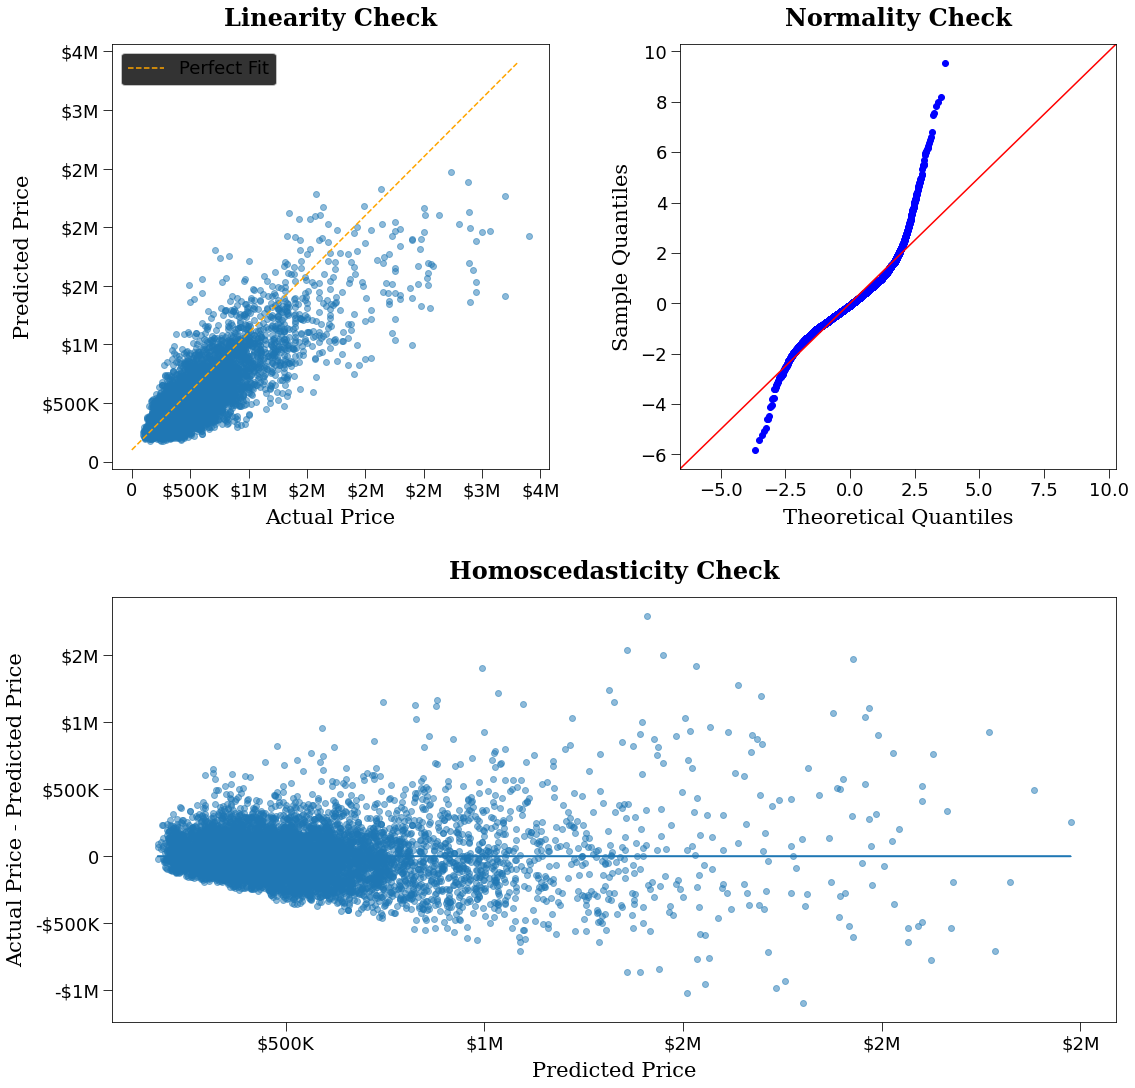

In [105]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

seattle_preds = seattle_fin_model.predict(seattle_fin_const)
perfect_line = np.arange(kc_y_seattle.min(), kc_y_seattle.max())
seattle_resids = (kc_y_seattle - seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_y_seattle, seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')

homo_ax.scatter(seattle_preds, seattle_resids, alpha=0.5)
homo_ax.plot(seattle_preds, [0 for i in range(len(kc_X_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

for a_i, ax in enumerate([lin_ax, norm_ax, homo_ax]):
    if a_i!=1:
        ax.xaxis.set_major_formatter(viz_currency_formatter)
        ax.yaxis.set_major_formatter(viz_currency_formatter)
    else: 
        ax.set_xlabel(ax.get_xlabel(), family='serif')
        ax.set_ylabel(ax.get_ylabel(), family='serif')
        
fig.savefig('visuals/seattle_model_check.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong><code>seattle_log_model</code></strong></h4>

In [106]:
# Only log transforming the target (y component)

seattle_log_y = np.log(kc_y_seattle)

In [107]:
# Creating the log model

seattle_log_const = sm.add_constant(kc_X_seattle)
seattle_log_model = sm.OLS(endog=seattle_log_y, exog=seattle_log_const).fit()

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>seattle_log_model</code></strong></h5>

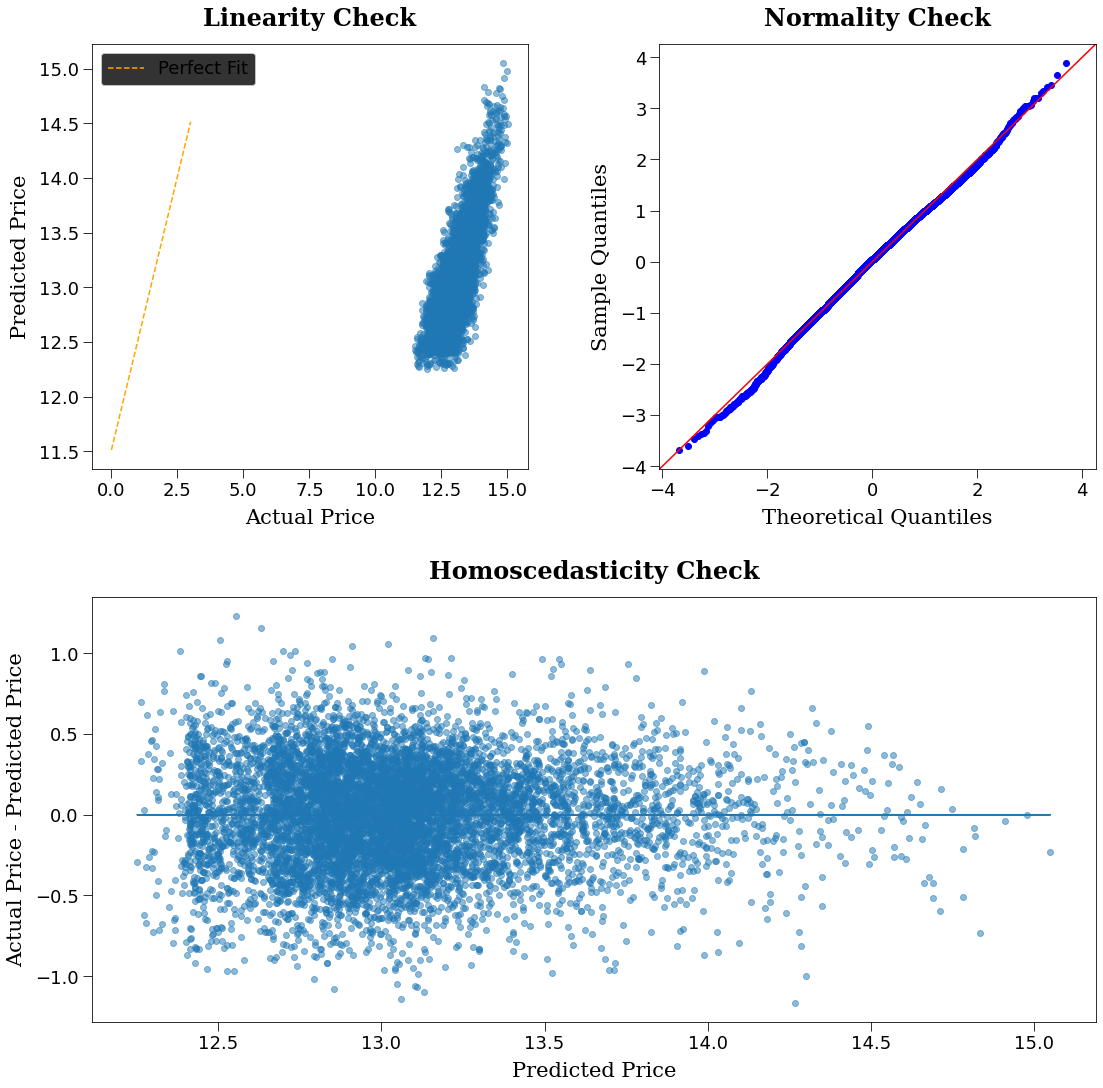

In [108]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

seattle_preds = seattle_log_model.predict(seattle_log_const)
perfect_line = np.arange(seattle_log_y.min(), seattle_log_y.max())
seattle_resids = (seattle_log_y - seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(seattle_log_y, seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')
norm_ax.set_xlabel(norm_ax.get_xlabel(), family='serif')
norm_ax.set_ylabel(norm_ax.get_ylabel(), family='serif')

homo_ax.scatter(seattle_preds, seattle_resids, alpha=0.5)
homo_ax.plot(seattle_preds, [0 for i in range(len(kc_X_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')
    
fig.savefig('visuals/seattle_model_check_log.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong>Comparing <code>seattle</code> Models</strong></h4>

In [109]:
# Creating lists of the models and their names in str format to zip() thru to create the comparison dataframe

seattle_model_list = [seattle_base_model, seattle_full_model, seattle_full_VIF_model, seattle_full_RFECV_model, 
                      seattle_fin_model, seattle_log_model]

seattle_model_names = ['base', 'full', 'full_VIF', 'full_RFECV', 'fin', 'log']

In [110]:
# Creating the comparison dataframe

seattle_r_vals = {}
seattle_r_adj_vals = {}
seattle_compare_params_df = pd.DataFrame()
for ols_i, (ols_model, model_name) in enumerate(zip(seattle_model_list, seattle_model_names)):
    model_params = ols_model.params    
    model_params.name = model_name    
    seattle_r_vals[model_name] = ols_model.rsquared
    seattle_r_adj_vals[model_name] = ols_model.rsquared_adj
    
    seattle_compare_params_df = pd.concat([seattle_compare_params_df, model_params], axis=1)    
    
for r_i, r_dict in enumerate([seattle_r_vals, seattle_r_adj_vals]):
    r_name = 'r_score' if r_i==0 else 'r_adj_score'
    r_ser = pd.DataFrame(r_dict.values(), index=r_dict.keys(), columns=[r_name]).transpose()
    
    seattle_compare_params_df = pd.concat([seattle_compare_params_df, r_ser])    

In [111]:
# Rounding columns for readability and displaying the comparision dataframe

for col in seattle_compare_params_df.columns[:-1]:
    seattle_compare_params_df[col] = seattle_compare_params_df[col].round(2)
    
display(seattle_compare_params_df)

base       full    full_VIF  full_RFECV         fin  \
const                6025.12  718614.03   174482.27   174683.85   174683.85   
sqft_living           294.04     184.66      187.29      187.30      187.30   
floors                   NaN   27634.74    27933.29    27889.48    27889.48   
bedrooms                 NaN  -22775.69   -23582.54   -23585.69   -23585.69   
bathrooms                NaN  -23920.65   -24081.66   -24093.65   -24093.65   
renovated                NaN   82079.33    82422.22    82342.85    82342.85   
basement                 NaN   15712.48    14859.01    14825.50    14825.50   
grade_5_Fair             NaN -590885.08   -45239.29   -44434.65   -44434.65   
grade_6_Low_Average      NaN -601699.90   -56100.52   -55951.24   -55951.24   
grade_7_Average          NaN -545630.88         NaN         NaN         NaN   
grade_8_Good             NaN -453898.98    90137.91    90095.61    90095.61   
grade_9_Better           NaN -235354.60   307268.30   307233.45   307233.45   
grade_10_Very_Good       NaN   62677.45   603706.67   603709.83   603709.83   
grade_11_Excellent       NaN  453157.78   992514.98   992496.19   992496.19   
grade_12_Luxury          NaN  605889.08  1143498.83  1143492.96  1143492.96   
condition_Fair           NaN    9632.18     7250.82         NaN         NaN   
condition_Average        NaN    1971.63         NaN         NaN         NaN   
condition_Good           NaN   71790.87    69072.73    68935.18    68935.18   
condition_Very_Good      NaN  131047.49   128206.30   128087.95   128087.95   
r_score                 0.50       0.66        0.66        0.66        0.66   
r_adj_score             0.50       0.66        0.66        0.66        0.66   

                           log  
const                12.492173  
sqft_living           0.000252  
floors                0.061919  
bedrooms             -0.030701  
bathrooms            -0.032284  
renovated             0.158780  
basement              0.071347  
grade_5_Fair         -0.332815  
grade_6_Low_Average  -0.229391  
grade_7_Average            NaN  
grade_8_Good          0.199693  
grade_9_Better        0.467193  
grade_10_Very_Good    0.661208  
grade_11_Excellent    0.823606  
grade_12_Luxury       0.828170  
condition_Fair             NaN  
condition_Average          NaN  
condition_Good        0.148559  
condition_Very_Good   0.231379  
r_score               0.596194  
r_adj_score           0.595514

In [112]:
# print(seattle_compare_params_df.round(2).fillna('-').to_markdown(colalign=['center']*7, floatfmt='.2f'))

<h4 align='center'><strong>Final <code>seattle</code> Model</strong></h4>

In [113]:
# Taking the pieces of the final equation and making them more readable

seattle_log_int = int(np.exp(seattle_compare_params_df.log.dropna()[0]))
seattle_log_percs = seattle_compare_params_df.log.dropna()[1:-2] * 100

In [114]:
# Continuing the process of making the pieces of the equation more readable

seattle_fin_percs = list(seattle_log_percs.values.astype(int))
seattle_fin_preds = list(seattle_log_percs.index)

In [115]:
# Creating strings of the pieces of the equation with their column names

seattle_perc_eq = ['{}% * {}'.format(perc, pred) for perc, pred in zip(seattle_fin_percs, seattle_fin_preds)]

In [116]:
# Putting the pieces together in a readable format

model_eq = 'price = '
model_int_string = str(seattle_log_int) +' +\n'
model_var_string = ' +\n'.join(seattle_perc_eq)

In [117]:
# Putting the final equation together and printing it

seattle_log_eq = model_eq + model_int_string + model_var_string

print(seattle_log_eq)

price = 266245 +
0% * sqft_living +
6% * floors +
-3% * bedrooms +
-3% * bathrooms +
15% * renovated +
7% * basement +
-33% * grade_5_Fair +
-22% * grade_6_Low_Average +
19% * grade_8_Good +
46% * grade_9_Better +
66% * grade_10_Very_Good +
82% * grade_11_Excellent +
82% * grade_12_Luxury +
14% * condition_Good +
23% * condition_Very_Good


<a id='sub_sect_out_seattle'></a>

<h3 align='center'><strong>Outside Seattle Full Model</strong></h3>

In [118]:
# Outside Seattle First Full Model

out_seattle_full_const = sm.add_constant(kc_X_out_seattle)
out_seattle_full_model = sm.OLS(endog=kc_y_out_seattle, exog=out_seattle_full_const).fit()

<h4><strong><code>out_seattle_VIF</code></strong></h4>

In [119]:
# VIF Elimination
# Removing one dummy column from each group created from the original columns (if it was a dummy column)
# Removed the columns with a high VIF first
# Removed the columns with a mid VIF second
# Printed the details on which columns were dropped at each iteration

vif_compl = 0
while not vif_compl:
    high_cols_dict = {}
    mid_cols_dict = {}

    full_const = sm.add_constant(kc_X_out_seattle)
    out_seattle_full_VIF_model = sm.OLS(endog=kc_y_out_seattle, exog=full_const).fit()

    vif = [variance_inflation_factor(full_const.values, i) for i in range(full_const.shape[1])]
    vif_df = pd.DataFrame(vif, index=full_const.columns, columns=["Variance Inflation Factor"])

    high_vif_cols = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].index)
    high_vif_vals = list(vif_df.loc[vif_df['Variance Inflation Factor'] > 10].values)
    if 'const' in high_vif_cols: 
        h_i = high_vif_cols.index('const')
        high_vif_cols.remove('const')
        high_vif_vals.pop(h_i)

    mid_vif_cols = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].index)

    mid_vif_vals = \
    list(vif_df.loc[(vif_df['Variance Inflation Factor'] > 5) & (vif_df['Variance Inflation Factor'] < 10)].values)

    if 'const' in mid_vif_cols:         
        m_i = mid_vif_cols.index('const')
        mid_vif_cols.remove('const')
        mid_vif_vals.pop(m_i)

    for g_i, col_grp in enumerate([high_vif_cols, mid_vif_cols]):
        if g_i==0: grp_dict, grp_vals = high_cols_dict, high_vif_vals
        if g_i==1: grp_dict, grp_vals = mid_cols_dict, mid_vif_vals
        if col_grp:
            for c_i, col in enumerate(col_grp):
                if col in grp_dict.keys(): grp_dict[col] += grp_vals[c_i]
                else: grp_dict[col] = grp_vals[c_i]
                    
    high_cols_df = pd.DataFrame(high_cols_dict.values(), high_cols_dict.keys(), columns=['VIF'])
    mid_VIF_cols_df = pd.DataFrame(mid_cols_dict.values(), mid_cols_dict.keys(), columns=['VIF'])
    
    out_seattle_VIF = high_cols_df.sort_values('VIF', ascending=False)
    mid_VIF_cols_df = mid_VIF_cols_df.sort_values('VIF', ascending=False)
    
    VIF_drop_cols = []
    for o_col in list(cat_dummy_dict.keys())[:-1]:
        if any(out_seattle_VIF.index.map(lambda x: o_col in x)):
            first_pred_col = out_seattle_VIF.loc[out_seattle_VIF.index.map(lambda x: o_col in x)].index[0]
            VIF_drop_cols.append(first_pred_col)
    
    if VIF_drop_cols: 
        kc_X_out_seattle.drop(VIF_drop_cols, axis=1, inplace=True)
        print(bold_red +'High VIF Dropped Columns'+ every_off, '\n', VIF_drop_cols, '\n')
        
    if not VIF_drop_cols and not mid_VIF_cols_df.empty: 
        mid_VIF_drop_cols = []
        for o_col in list(cat_dummy_dict.keys())[:-1]:
            if any(mid_VIF_cols_df.index.map(lambda x: o_col in x)):
                first_pred_col = mid_VIF_cols_df.loc[mid_VIF_cols_df.index.map(lambda x: o_col in x)].index[0]
                mid_VIF_drop_cols.append(first_pred_col)
            
        if mid_VIF_drop_cols: 
            kc_X_out_seattle.drop(mid_VIF_drop_cols, axis=1, inplace=True)
            print(bold_red +'Mid VIF Dropped Columns'+ every_off, '\n', mid_VIF_drop_cols, '\n')
            
    if not VIF_drop_cols and mid_VIF_cols_df.empty:  vif_compl = 1

print(bold_red +'VIF Elimination Finished'+ every_off)

High VIF Dropped Columns 
 ['grade_7_Average', 'condition_Average'] 

VIF Elimination Finished


<h4><strong><code>out_seattle_RFECV</code></strong></h4>

In [120]:
# RFECV Elimination
# This used machine learning to basically let the computer choose the best features, dropping the worst columns

best_model_found = 0
RFECV_round = 0
while not best_model_found:
    
    full_const = sm.add_constant(kc_X_out_seattle)
    out_seattle_full_RFECV_model = sm.OLS(endog=kc_y_out_seattle, exog=full_const).fit()
    
    splitter = ShuffleSplit(n_splits=6, test_size=0.2, random_state=36)
    out_seattle_X_for_RFECV = StandardScaler().fit_transform(kc_X_out_seattle)
    model_for_RFECV = LinearRegression()
    selector = RFECV(model_for_RFECV, cv=splitter)
    selector.fit(out_seattle_X_for_RFECV, kc_y_out_seattle)
    
    RFECV_bad_cols = [col for c_i, col in enumerate(kc_X_out_seattle.columns) if not selector.support_[c_i]]
    
    if RFECV_bad_cols:
        REFCV_drop_cols = []
        for o_col in list(cat_dummy_dict.keys()):
            o_df = pd.DataFrame()
            for r_col in RFECV_bad_cols:
                if r_col.startswith(o_col) or r_col.endswith(o_col):
                    r_prob, r_coef = \
                    out_seattle_full_RFECV_model.pvalues[r_col], out_seattle_full_RFECV_model.params[r_col]
                    r_df = pd.DataFrame([r_prob, r_coef], columns=[r_col], index=['p_value', 'coeff']).transpose()
                    o_df = pd.concat([o_df, r_df])
            if not o_df.empty:
                o_max_col = o_df.loc[o_df.p_value == o_df.p_value.max()].index[0]
                REFCV_drop_cols.append(o_max_col)
        RFECV_round += 1
        
        kc_X_out_seattle.drop(REFCV_drop_cols, axis=1, inplace=True)
        print(bold_red +'RFECV Dropped Columns'+ every_off, '\n', REFCV_drop_cols, '\n')
        
        
    else: best_model_found = 1
        
print(bold_red +'RFECV Finished'+ every_off)

RFECV Dropped Columns 
 ['basement', 'grade_4_Low', 'condition_Fair'] 

RFECV Finished


<h4><strong><code>out_seattle_pvals</code></strong></h4>

In [121]:
# High `P-values` Elimination
# Removing the column with the highest p-value at each iteration and printing the results

high_pvals = 1

while high_pvals:
    out_seattle_pval_const = sm.add_constant(kc_X_out_seattle)
    out_seattle_pval_model = sm.OLS(endog=kc_y_out_seattle, exog=out_seattle_pval_const).fit()
    
    high_pval_list = \
    list(out_seattle_pval_model.pvalues.loc[out_seattle_pval_model.pvalues >= .05].sort_values(ascending=False).index)
    
    if high_pval_list:
        high_pval_drop_col = high_pval_list[0]
        kc_X_out_seattle.drop(high_pval_drop_col, axis=1, inplace=True)
        print(str(high_pvals) +' - '+ bold_red +'High p-value Column Dropped'+ every_off +':\n', high_pval_drop_col, '\n')
        high_pvals += 1
        
    else: high_pvals = 0
        
print(bold_red +'High p_value Elimination Finsihed'+ every_off)        

1 - High p-value Column Dropped:
 grade_5_Fair 

High p_value Elimination Finsihed


<h4 align='center'><strong><code>out_seattle_fin_model</code></strong></h4>

In [122]:
# Simply renaming the last version of the model that was created as the final model

out_seattle_fin_const = out_seattle_pval_const
out_seattle_fin_model = out_seattle_pval_model

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>out_seattle_fin_model</code></strong></h5>

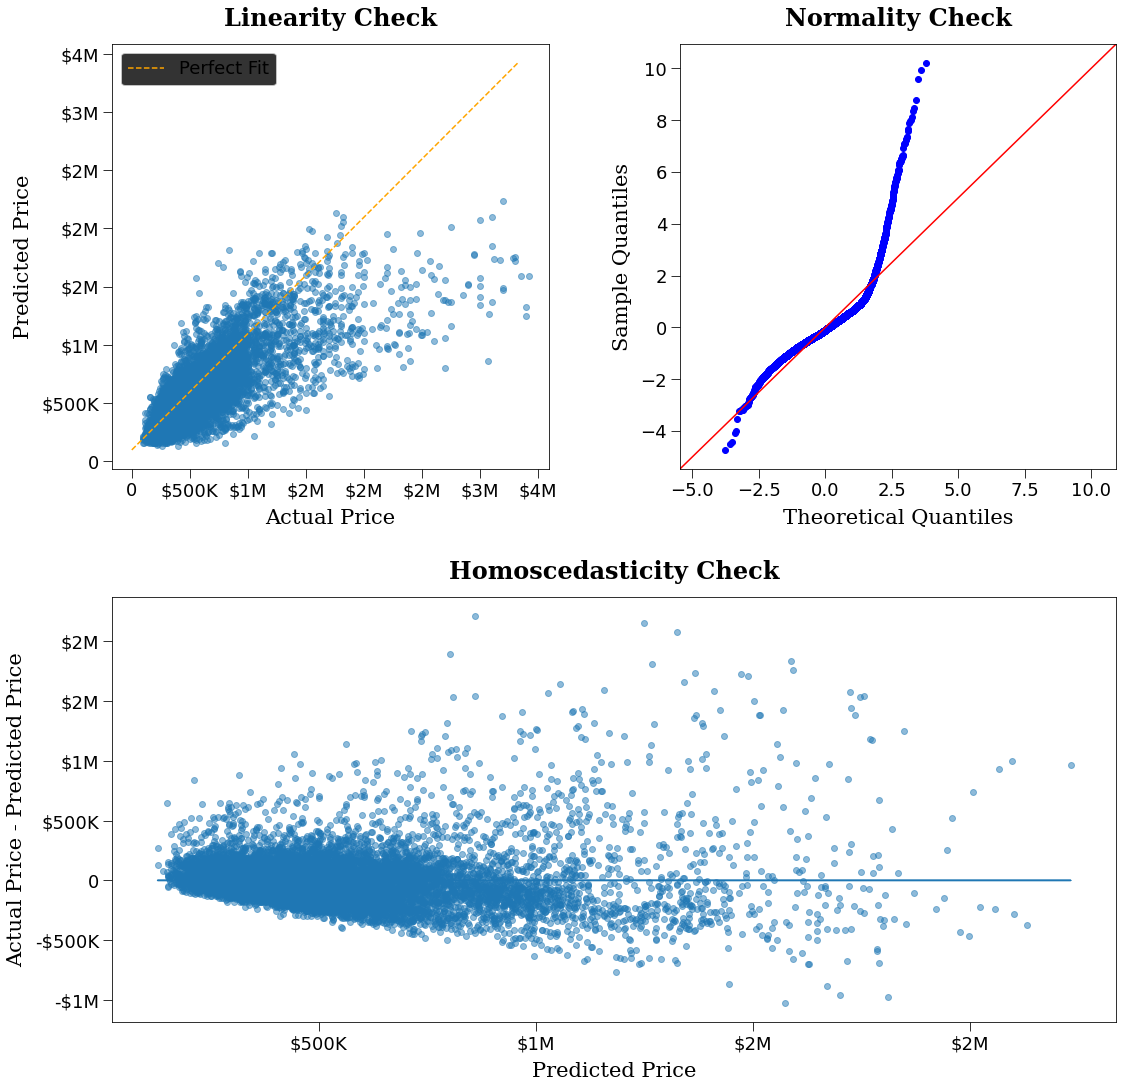

In [123]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

out_seattle_preds = out_seattle_fin_model.predict(out_seattle_fin_const)
perfect_line = np.arange(kc_y_out_seattle.min(), kc_y_out_seattle.max())
out_seattle_resids = (kc_y_out_seattle - out_seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(kc_y_out_seattle, out_seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(out_seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')

homo_ax.scatter(out_seattle_preds, out_seattle_resids, alpha=0.5)
homo_ax.plot(out_seattle_preds, [0 for i in range(len(kc_X_out_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

for a_i, ax in enumerate([lin_ax, norm_ax, homo_ax]):
    if a_i!=1:
        ax.xaxis.set_major_formatter(viz_currency_formatter)
        ax.yaxis.set_major_formatter(viz_currency_formatter)
    else: 
        ax.set_xlabel(ax.get_xlabel(), family='serif')
        ax.set_ylabel(ax.get_ylabel(), family='serif')
        
fig.savefig('visuals/out_seattle_model_check.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong><code>out_seattle_log_model</code></strong></h4>

In [124]:
# Only log transforming the target (y component)

out_seattle_log_y = np.log(kc_y_out_seattle)

In [125]:
# Creating the log model

out_seattle_log_const = sm.add_constant(kc_X_out_seattle)
out_seattle_log_model = sm.OLS(endog=out_seattle_log_y, exog=out_seattle_log_const).fit()

<h5 align='center'><strong>Investigating the Linearity, Normality and Homoscedasticity of <code>out_seattle_log_model</code></strong></h5>

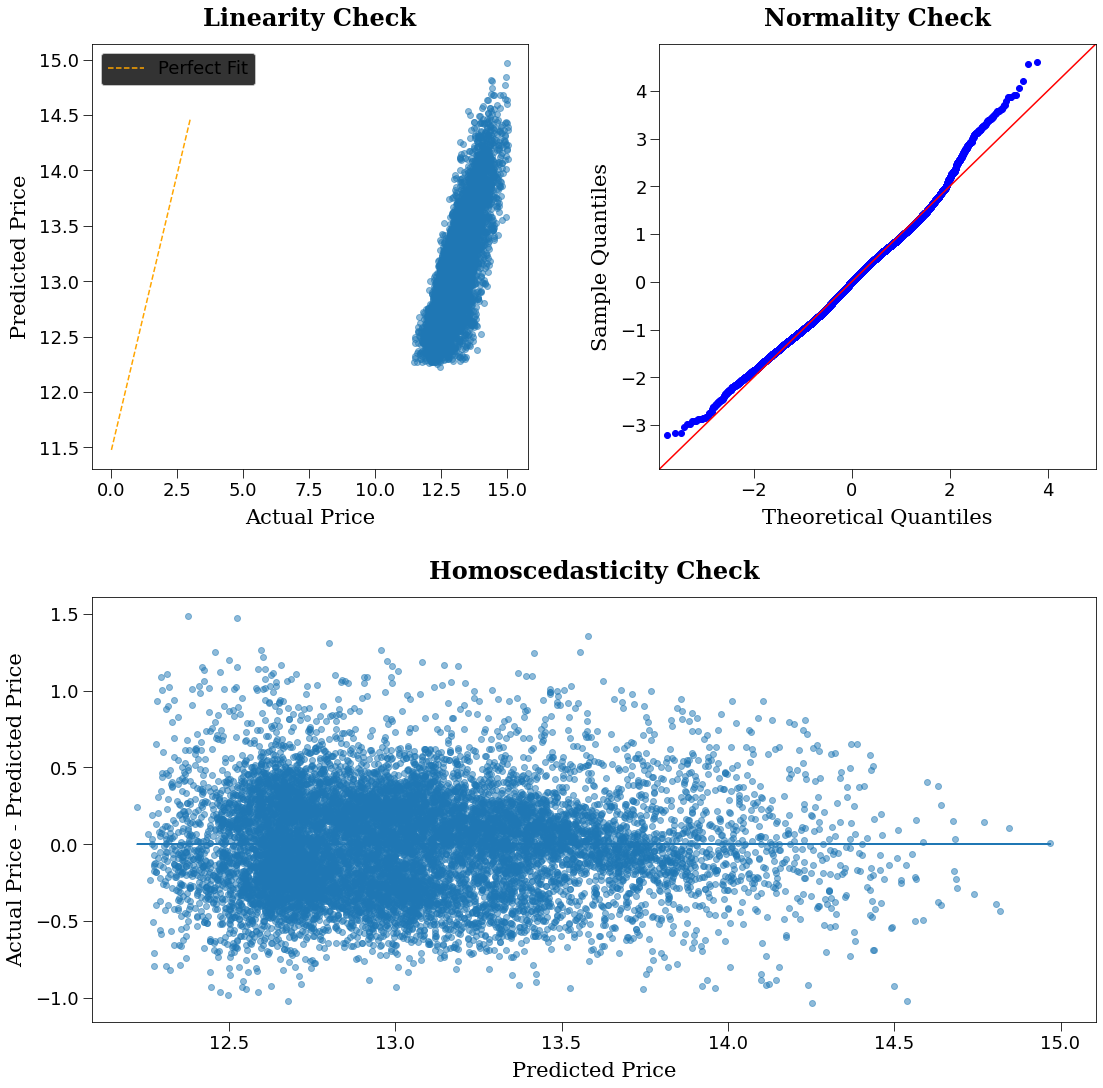

In [126]:
# Creating the visualizations necessary to explore the Linearity, Normality, and Homoscedasticity of the model

fig = plt.figure()
gs = fig.add_gridspec(2, 2, wspace=.3, hspace=.3)

lin_ax = fig.add_subplot(gs[0, 0])
norm_ax = fig.add_subplot(gs[0, 1])
homo_ax = fig.add_subplot(gs[1, :])

out_seattle_preds = out_seattle_log_model.predict(out_seattle_log_const)
perfect_line = np.arange(out_seattle_log_y.min(), out_seattle_log_y.max())
out_seattle_resids = (out_seattle_log_y - out_seattle_preds)

lin_ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
lin_ax.scatter(out_seattle_log_y, out_seattle_preds, alpha=0.5)
lin_ax.set_xlabel("Actual Price", family='serif')
lin_ax.set_ylabel("Predicted Price", family='serif')
lin_ax.set_title('Linearity Check', family='serif')
lin_ax.legend()

sm.graphics.qqplot(out_seattle_resids, dist=stats.norm, line='45', fit=True, ax=norm_ax)
norm_ax.set_title('Normality Check', family='serif')
norm_ax.set_xlabel(norm_ax.get_xlabel(), family='serif')
norm_ax.set_ylabel(norm_ax.get_ylabel(), family='serif')

homo_ax.scatter(out_seattle_preds, out_seattle_resids, alpha=0.5)
homo_ax.plot(out_seattle_preds, [0 for i in range(len(kc_X_out_seattle))])
homo_ax.set_xlabel("Predicted Price", family='serif')
homo_ax.set_ylabel("Actual Price - Predicted Price", family='serif')
homo_ax.set_title('Homoscedasticity Check', family='serif')

fig.savefig('visuals/out_seattle_model_check_log.png' , bbox_inches='tight')
    
plt.show()

<h4 align='center'><strong>Comparing <code>out_seattle</code> Models</strong></h4>

In [127]:
# Creating lists of the models and their names in str format to zip() thru to create the comparison dataframe

out_seattle_model_list = [out_seattle_base_model, out_seattle_full_model, out_seattle_full_VIF_model, 
                          out_seattle_full_RFECV_model, out_seattle_fin_model, out_seattle_log_model]
out_seattle_model_names = ['base', 'full', 'full_VIF', 'full_RFECV', 'fin', 'log']

In [128]:
# Creating the comparison dataframe

out_seattle_r_vals = {}
out_seattle_r_adj_vals = {}
out_seattle_compare_params_df = pd.DataFrame()
for ols_i, (ols_model, model_name) in enumerate(zip(out_seattle_model_list, out_seattle_model_names)):
    model_params = ols_model.params    
    model_params.name = model_name    
    out_seattle_r_vals[model_name] = ols_model.rsquared
    out_seattle_r_adj_vals[model_name] = ols_model.rsquared_adj
    
    out_seattle_compare_params_df = pd.concat([out_seattle_compare_params_df, model_params], axis=1)    
    
for r_i, r_dict in enumerate([out_seattle_r_vals, out_seattle_r_adj_vals]):
    r_name = 'r_score' if r_i==0 else 'r_adj_score'
    r_ser = pd.DataFrame(r_dict.values(), index=r_dict.keys(), columns=[r_name]).transpose()
    
    out_seattle_compare_params_df = pd.concat([out_seattle_compare_params_df, r_ser])    

In [129]:
# Rounding columns for readability and displaying the comparision dataframe

for col in out_seattle_compare_params_df.columns[:-1]:
    out_seattle_compare_params_df[col] = out_seattle_compare_params_df[col].round(2)
    
display(out_seattle_compare_params_df)

base        full   full_VIF  full_RFECV        fin  \
const               -91819.36  1572682.14  134905.34   136007.95  133291.01   
sqft_living            276.92      158.60     163.70      164.52     164.72   
floors                    NaN   -56699.56  -58086.85   -60113.10  -60315.98   
bedrooms                  NaN   -20231.90  -21478.18   -21535.73  -21441.37   
bathrooms                 NaN    30944.55   30521.39    31254.04   32069.22   
renovated                 NaN   240012.33  238588.90   238554.48  238464.61   
basement                  NaN     5653.46    3955.64         NaN        NaN   
grade_4_Low               NaN -1274230.51   14331.81         NaN        NaN   
grade_5_Fair              NaN -1311348.91  -31293.35   -31772.70        NaN   
grade_6_Low_Average       NaN -1304850.91  -27068.70   -27763.58  -26189.38   
grade_7_Average           NaN -1276829.89        NaN         NaN        NaN   
grade_8_Good              NaN -1202304.02   71721.48    71620.96   71997.10   
grade_9_Better            NaN -1078215.11  192902.31   192260.67  192295.88   
grade_10_Very_Good        NaN  -896194.07  372210.28   371205.11  370825.14   
grade_11_Excellent        NaN  -637499.77  627474.21   625882.61  624957.84   
grade_12_Luxury           NaN  -321870.82  940021.89   937667.39  936340.61   
condition_Fair            NaN  -174244.42  -14624.14         NaN        NaN   
condition_Average         NaN  -160787.67        NaN         NaN        NaN   
condition_Good            NaN  -107988.52   51847.46    52185.95   52027.61   
condition_Very_Good       NaN   -49586.81  109942.38   110270.99  109455.10   
r_score                  0.51        0.62       0.61        0.61       0.61   
r_adj_score              0.51        0.62       0.61        0.61       0.61   

                           log  
const                12.307016  
sqft_living           0.000250  
floors               -0.066476  
bedrooms             -0.018218  
bathrooms             0.049050  
renovated             0.261473  
basement                   NaN  
grade_4_Low                NaN  
grade_5_Fair               NaN  
grade_6_Low_Average  -0.171582  
grade_7_Average            NaN  
grade_8_Good          0.218598  
grade_9_Better        0.421726  
grade_10_Very_Good    0.581131  
grade_11_Excellent    0.696692  
grade_12_Luxury       0.821566  
condition_Fair             NaN  
condition_Average          NaN  
condition_Good        0.067999  
condition_Very_Good   0.161485  
r_score               0.627543  
r_adj_score           0.627157

In [130]:
# print(out_seattle_compare_params_df.round(2).fillna('-').to_markdown(colalign=['center']*7, floatfmt='.2f'))

<h4 align='center'><strong>Final <code>out_seattle</code> Equation</strong></h4>

In [131]:
# Taking the pieces of the final equation and making them more readable

out_seattle_log_int = int(np.exp(out_seattle_compare_params_df.log.dropna()[0]))
out_seattle_log_percs = out_seattle_compare_params_df.log.dropna()[1:-2] * 100

In [132]:
# Continuing the process of making the pieces of the equation more readable

out_seattle_fin_percs = list(out_seattle_log_percs.values.astype(int))
out_seattle_fin_preds = list(out_seattle_log_percs.index)

In [133]:
# Creating strings of the pieces of the equation with their column names

out_seattle_perc_eq = ['{}% * {}'.format(perc, pred) for perc, pred in zip(out_seattle_fin_percs, out_seattle_fin_preds)]

In [134]:
# Putting the pieces together in a readable format

model_eq = 'price = '
model_int_string = str(out_seattle_log_int) +' +\n'
model_var_string = ' +\n'.join(out_seattle_perc_eq)

In [135]:
# Putting the final equation together and printing it

out_seattle_log_eq = model_eq + model_int_string + model_var_string

print(out_seattle_log_eq)

price = 221242 +
0% * sqft_living +
-6% * floors +
-1% * bedrooms +
4% * bathrooms +
26% * renovated +
-17% * grade_6_Low_Average +
21% * grade_8_Good +
42% * grade_9_Better +
58% * grade_10_Very_Good +
69% * grade_11_Excellent +
82% * grade_12_Luxury +
6% * condition_Good +
16% * condition_Very_Good


<a id='sect_mod_anal'></a>

<h2 align='center'><strong>Analyzing Model Performance</strong></h2>

Unfortunately, the models I created could not be relied upon to predict the sales prices of a residential property. The  $𝑟^2$ and the adjusted  $𝑟^2$  scores never even broke a value of .7, meaning that the models were unreliable as predictive algorithms. I could have refined the models further to increase their predictive abilities, but I will discuss why I didn’t in the [Future Investigations](#sect_fut_invest) section. While the [Insights, Conclusions, and Recommendations](#sect_insights_and_conclusions) I gleaned from my analysis are certainly a first step, more data will need to be gathered if King County Development is to build a regression model that serves as a reliable predictive algorithm.

<a id='sect_stake_biz_decision'></a>

<h1 align='center'><strong>Stakeholder and Business Problem Decision</strong></h1>

Based on the results obtained through the three models I created, I chose a real estate developer as the stakeholder for this project.  While I could have chosen a real estate agency, a developer could better use the insights I gained through my analysis.  Real estate agencies would be limited by the desires of their client and the physical location of a client’s property.  Developers have more freedom in their decision-making regarding what changes to make to the properties they acquire and what properties to acquire in the first place.  They may ultimately rely on investors to purchase the property, but they will need an analysis like this to convince those investors of a property’s / design’s value.  A real estate developer could also take on clients simply wanting renovations or remodeling services.  I named my hypothetical client King County Development.

<p align='center'>
    <img src='images/kc_dev_logo.png'>
</p>

As a real estate developer, King County Development would want to know which features of a property were important in determining the sales price of a residential property.  They would want to know whether those features affected the sales price positively or negatively.  They would also want to know the magnitude of those features’ effects on the sales price, individually and jointly.  

Knowing what features are important and their effect on the sales price is fundamental for a real estate developer.  Such knowledge would allow them to weigh the costs of renovating, remodeling, or constructing properties against the potential increase in the sales price that would be achieved.  It would be invaluable when pitching designs to investors or creating designs based on the resources of their clients. 

This is the business problem I chose to solve for King County Development.  I decided to determine the important features and the effects of those features.  I also chose to provide King County Development with the [Sales Price Calculator](#reco_sales_calc), a tool I created so that they could quickly provide investors and clients with the benefits of any design in a precise dollar amount.


<a id='sect_insights_and_conclusions'></a>

<h1 align='center'><strong>Insights, Conclusions, and Recommendations</strong></h1>

By creating separate models, I was able to gain valuable insights.  I made a dataframe and visualizations with the coefficients of the three log-transformed models to quickly identify the differences between the predictors included in each model and their values.

In [136]:
# Taking the `log` column from each of the comparison dataframes, renaming them, and combining them into a
# dataframe to easily compare the results from the three models

kc_log = kc_compare_params_df.log.copy()
seattle_log = seattle_compare_params_df.log.copy()
out_seattle_log = out_seattle_compare_params_df.log.copy()

kc_log.name = 'kc'
seattle_log.name = 'seattle'
out_seattle_log.name = 'out_seattle'

log_compare_df = pd.concat([kc_log, seattle_log, out_seattle_log], axis=1)

log_comp_df = log_compare_df.copy()

log_compare_df = log_compare_df.fillna('-')

In [137]:
# Reformatting the intercept of the model to make it easily understandable

log_compare_df.loc['const'] = log_compare_df.loc['const'].apply(lambda x: np.exp(x)).round(2)

In [138]:
# Reformatting the feature coefficients of the model to make it easily understandable

log_compare_df.iloc[1:-2] = log_compare_df.iloc[1:-2].applymap(lambda x: '{:.2f}%'.format(x*100) if type(x)!=str else x)

In [139]:
# Reformatting the r-squared & the adj r-squared of the model to make it easily understandable

log_compare_df.iloc[-2:] = log_compare_df.iloc[-2:].applymap(lambda x: round(x, 3))

In [140]:
# Uncomment to print the dataframe in markdown appropriate format

# print(log_compare_df.to_markdown(colalign=['center']*4))

&nbsp;&nbsp;&nbsp;&nbsp;You can see the markdown version of the final equation comparison dataframe for the three models below.

<table align="center" width='99%'>

<tr><td>
  

|                     |    kc     |  seattle  |  out_seattle  |
|:-------------------:|:---------:|:---------:|:-------------:|
|        const        | \$247K | \$266K |   \$221K   |
|     sqft_living     |   0.02%   |   0.03%   |     0.03%     |
|       floors        |   6.34%   |   6.19%   |    -6.65%     |
|      bedrooms       |  -2.86%   |  -3.07%   |    -1.82%     |
|      bathrooms      |  -2.83%   |  -3.23%   |     4.90%     |
|      renovated      |  24.36%   |  15.88%   |    26.15%     |
|      basement       |  13.09%   |   7.13%   |       -       |
|     grade_4_Low     |     -     |     -     |       -       |
|    grade_5_Fair     |  -31.92%  |  -33.28%  |       -       |
| grade_6_Low_Average |  -18.69%  |  -22.94%  |    -17.16%    |
|   grade_7_Average   |     -     |     -     |       -       |
|    grade_8_Good     |  20.21%   |  19.97%   |    21.86%     |
|   grade_9_Better    |  42.96%   |  46.72%   |    42.17%     |
| grade_10_Very_Good  |  61.30%   |  66.12%   |    58.11%     |
| grade_11_Excellent  |  77.40%   |  82.36%   |    69.67%     |
|   grade_12_Luxury   |  92.86%   |  82.82%   |    82.16%     |
|   condition_Fair    |     -     |     -     |       -       |
|  condition_Average  |     -     |     -     |       -       |
|   condition_Good    |   9.32%   |  14.86%   |     6.80%     |
| condition_Very_Good |  22.84%   |  23.14%   |    16.15%     |
|       r_score       |   0.582   |   0.596   |     0.628     |
|     r_adj_score     |   0.581   |   0.596   |     0.627     |
    
</td></tr> 
</table>

<h2 align='center'><strong>Visualizations of the Coefficients of the Three Log Models</strong></h2>

I used the visualizations I created in the presentation to my stakeholder.  I also used them to help guide my recommendations.  I made lists of columns to loop through to create the visualizations and styled each of them accordingly.

As the living area's square footage was not important per unit basis, it required a unique visualization to show its effect correctly.

In [141]:
# Printing the original column lists to see how to group the columns accordingly when I created the visualizations 

print(bold_red +'num_cols:'+ every_off, num_cols)
print(bold_red +'new_cat_order:'+ every_off, new_cat_order)

num_cols: ['sqft_living', 'floors', 'bedrooms', 'bathrooms']
new_cat_order: ['renovated', 'basement', 'grade', 'condition', 'city']


In [142]:
# Splitting the columns into appropriate lists

sqft_reno = num_cols[:1] + ['renovated']
fl_bed_bath_base_cols = num_cols[1:] + ['basement']
perc_groups = \
[sqft_reno, fl_bed_bath_base_cols, ['grade'], ['condition']]

In [143]:
perc_groups

[['sqft_living', 'renovated'],
 ['floors', 'bedrooms', 'bathrooms', 'basement'],
 ['grade'],
 ['condition']]

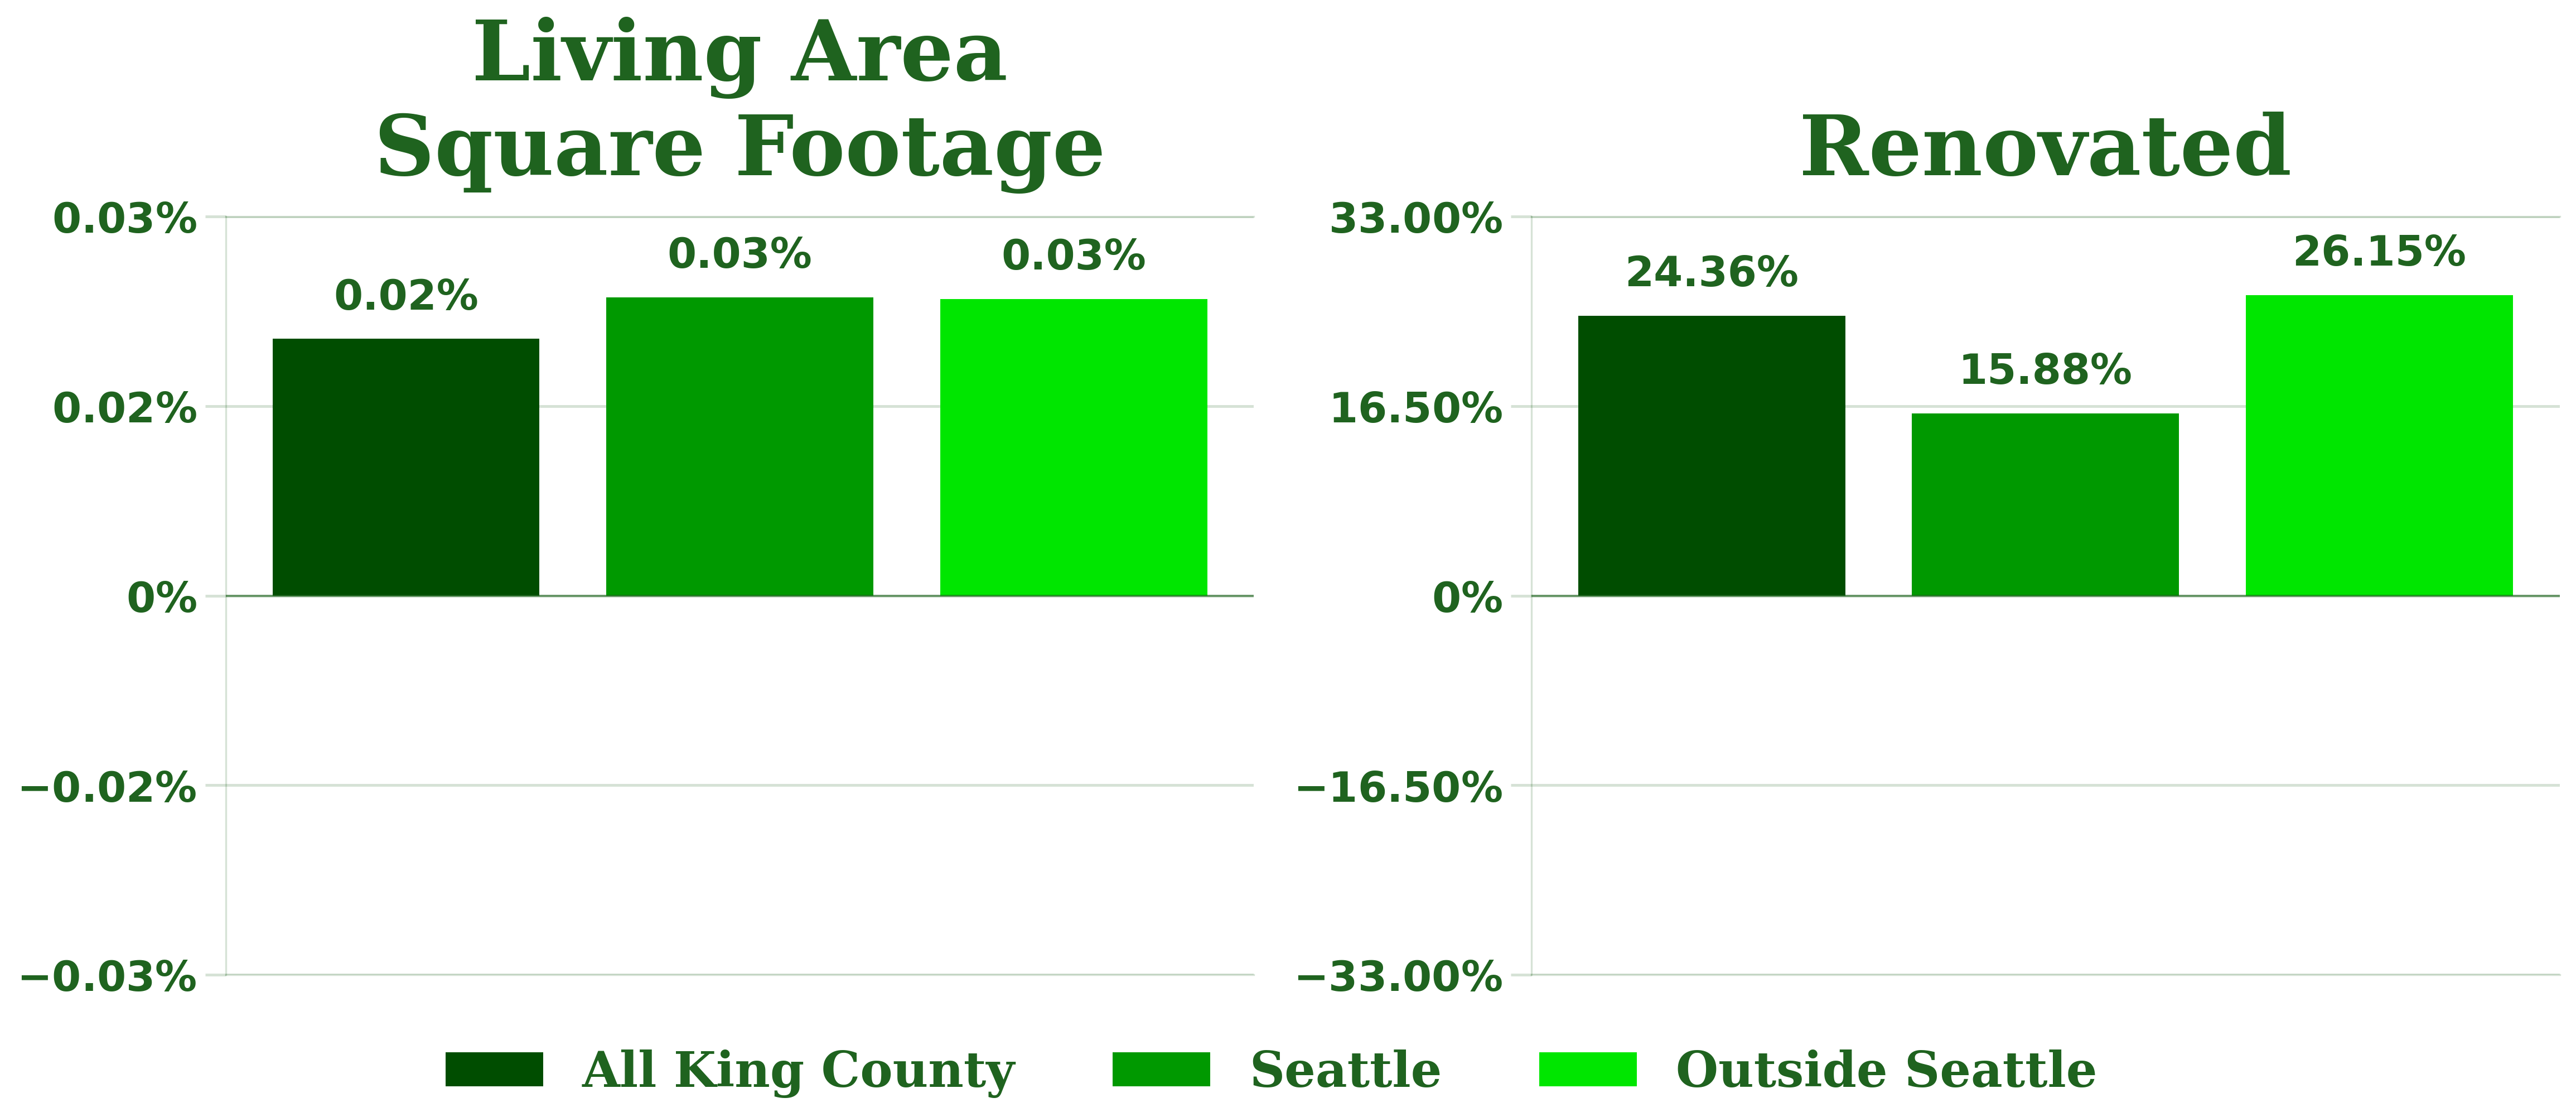

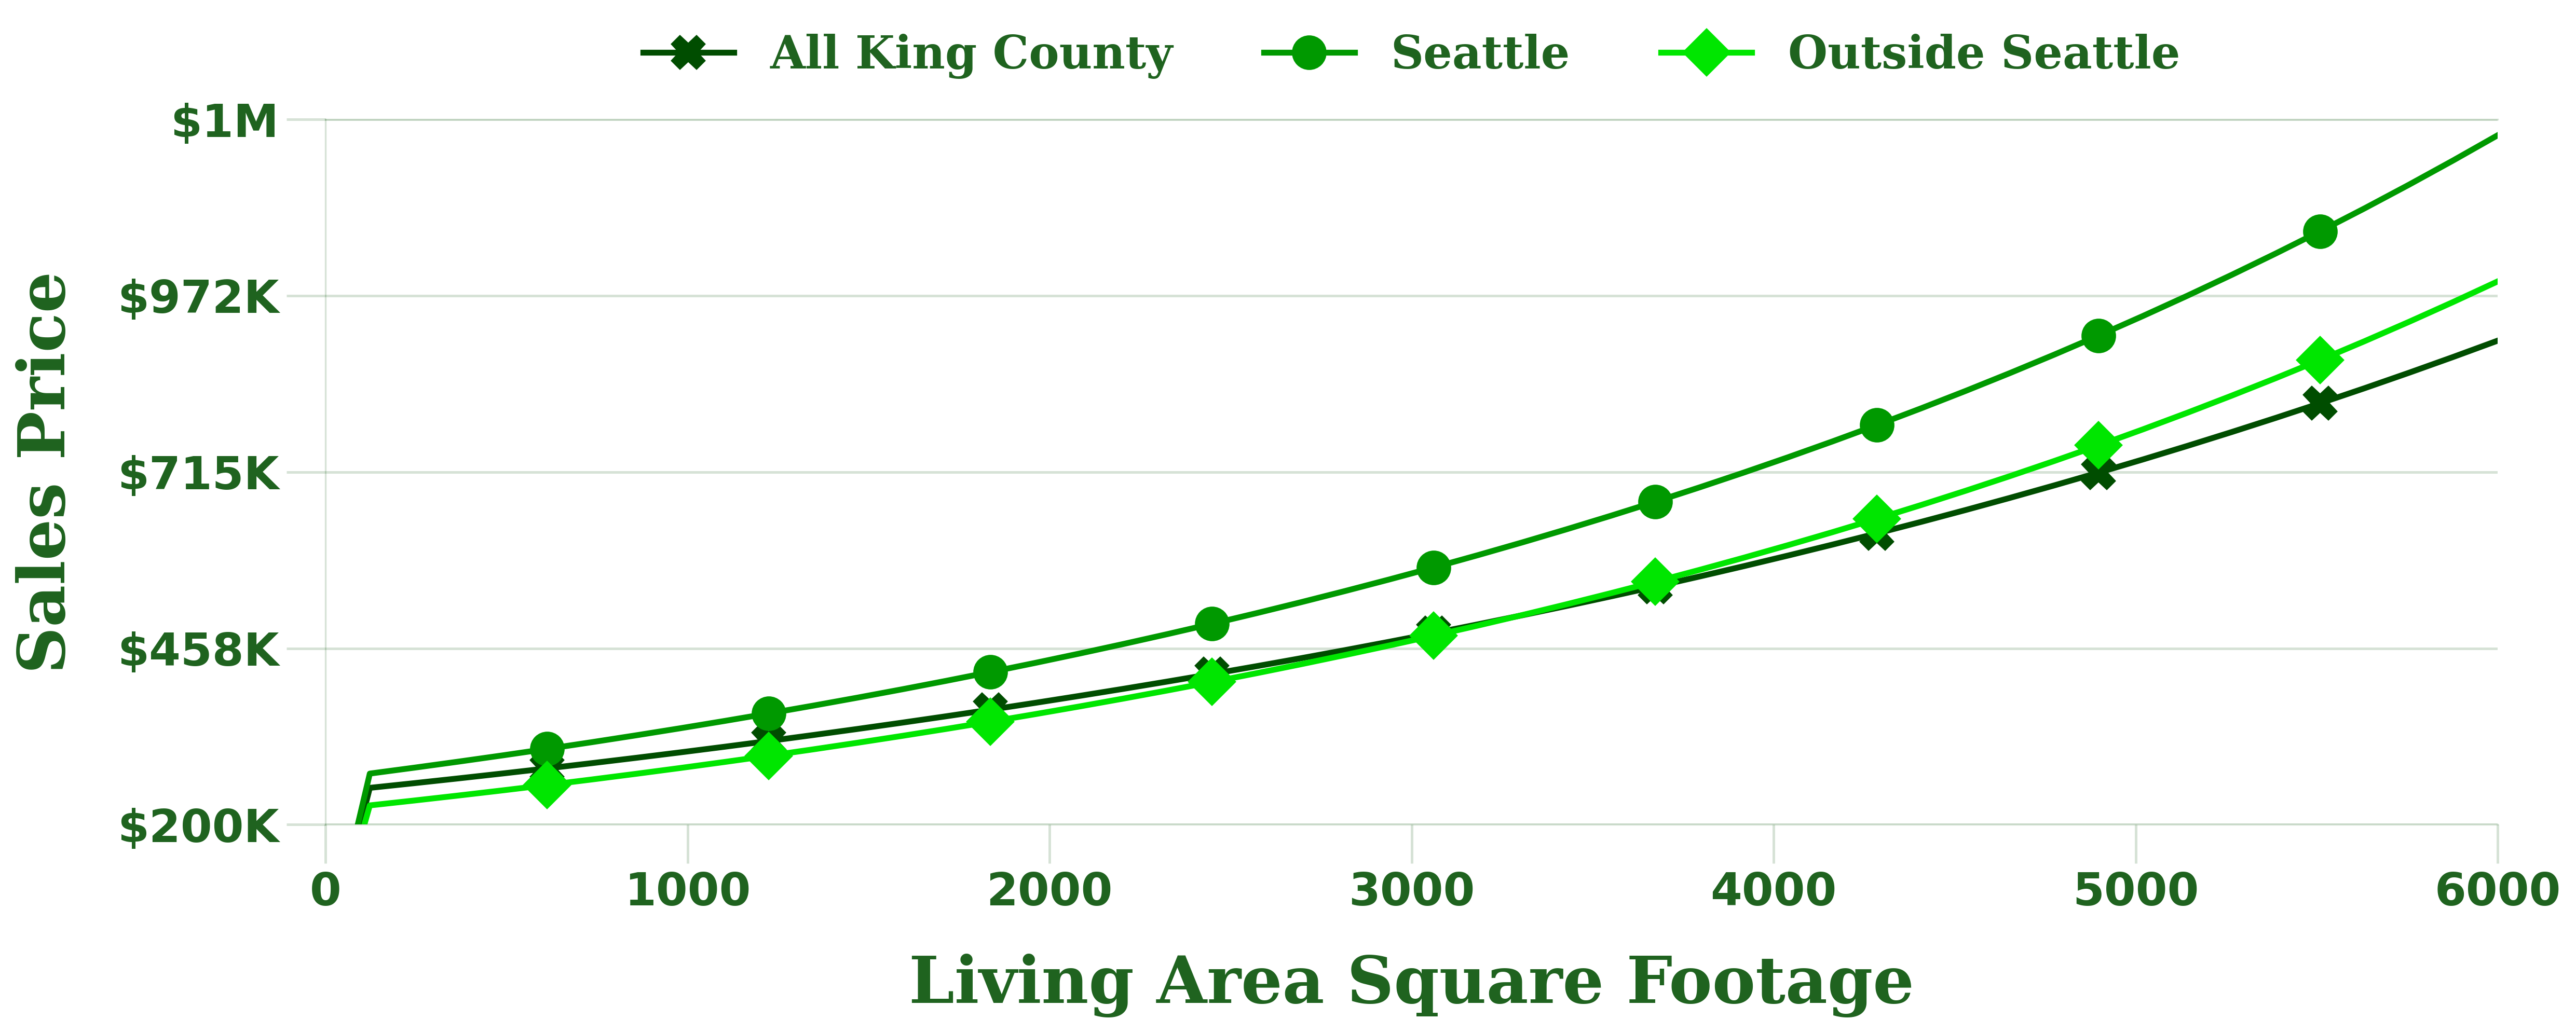

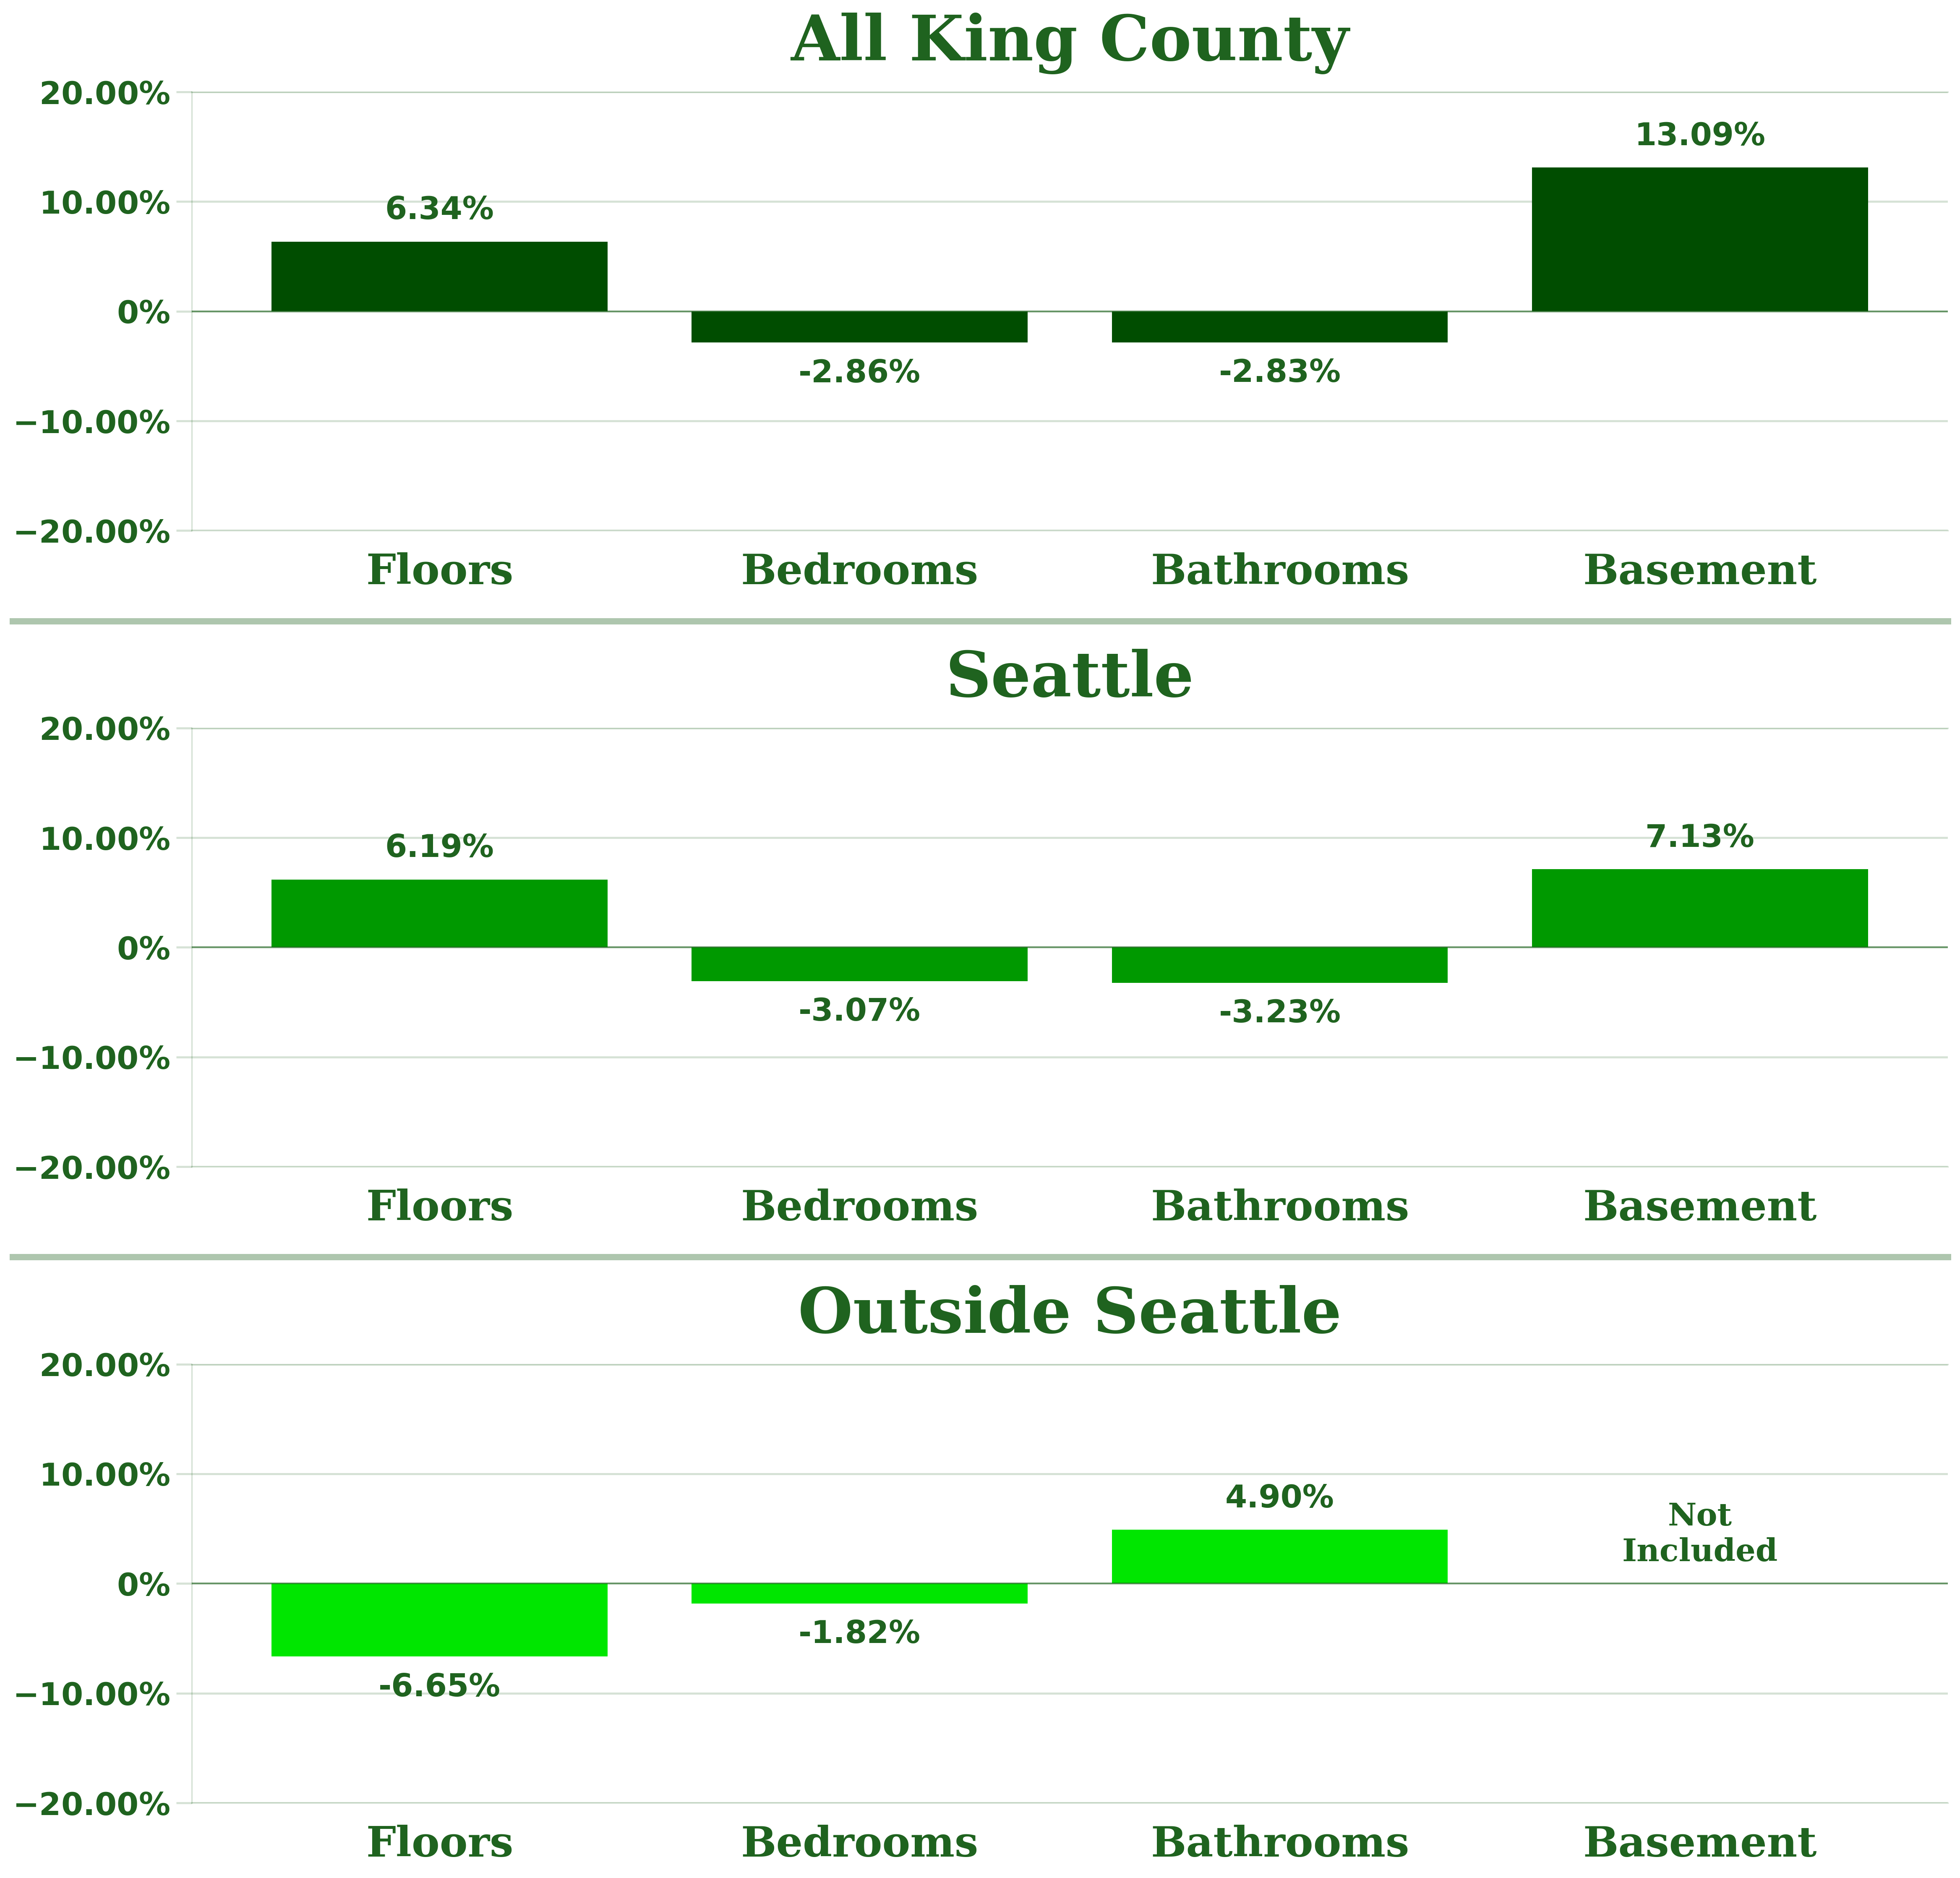

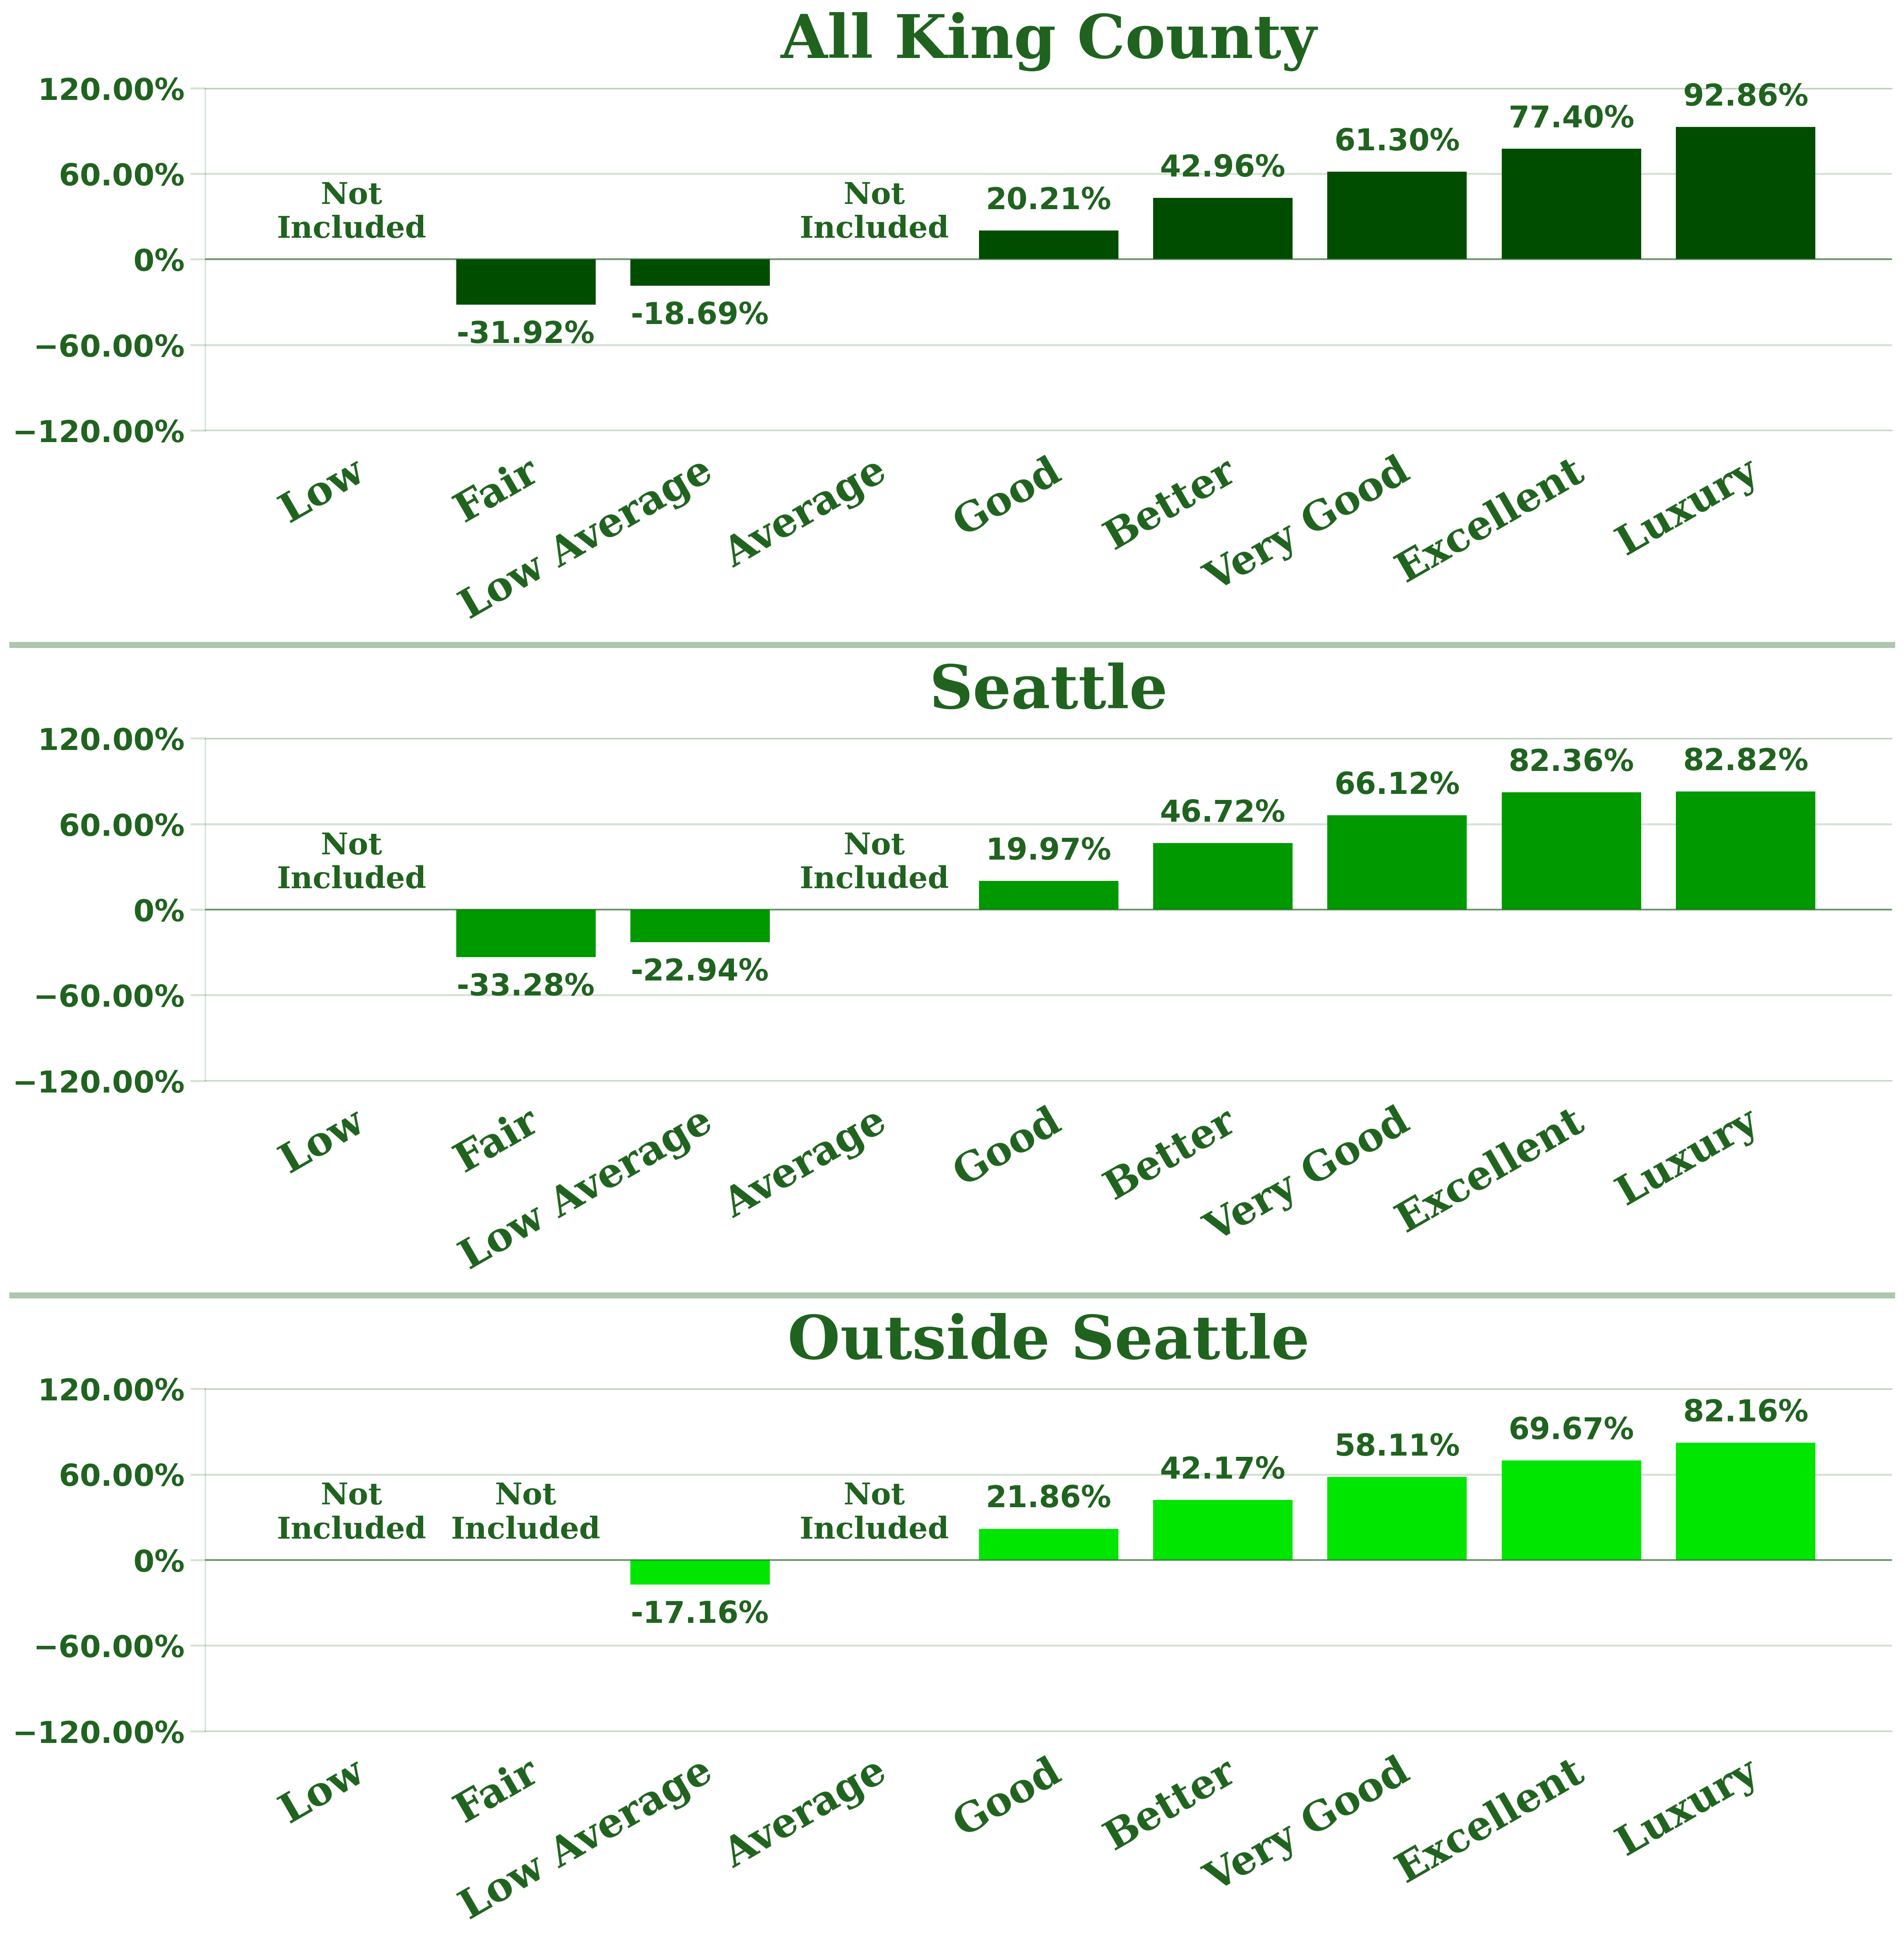

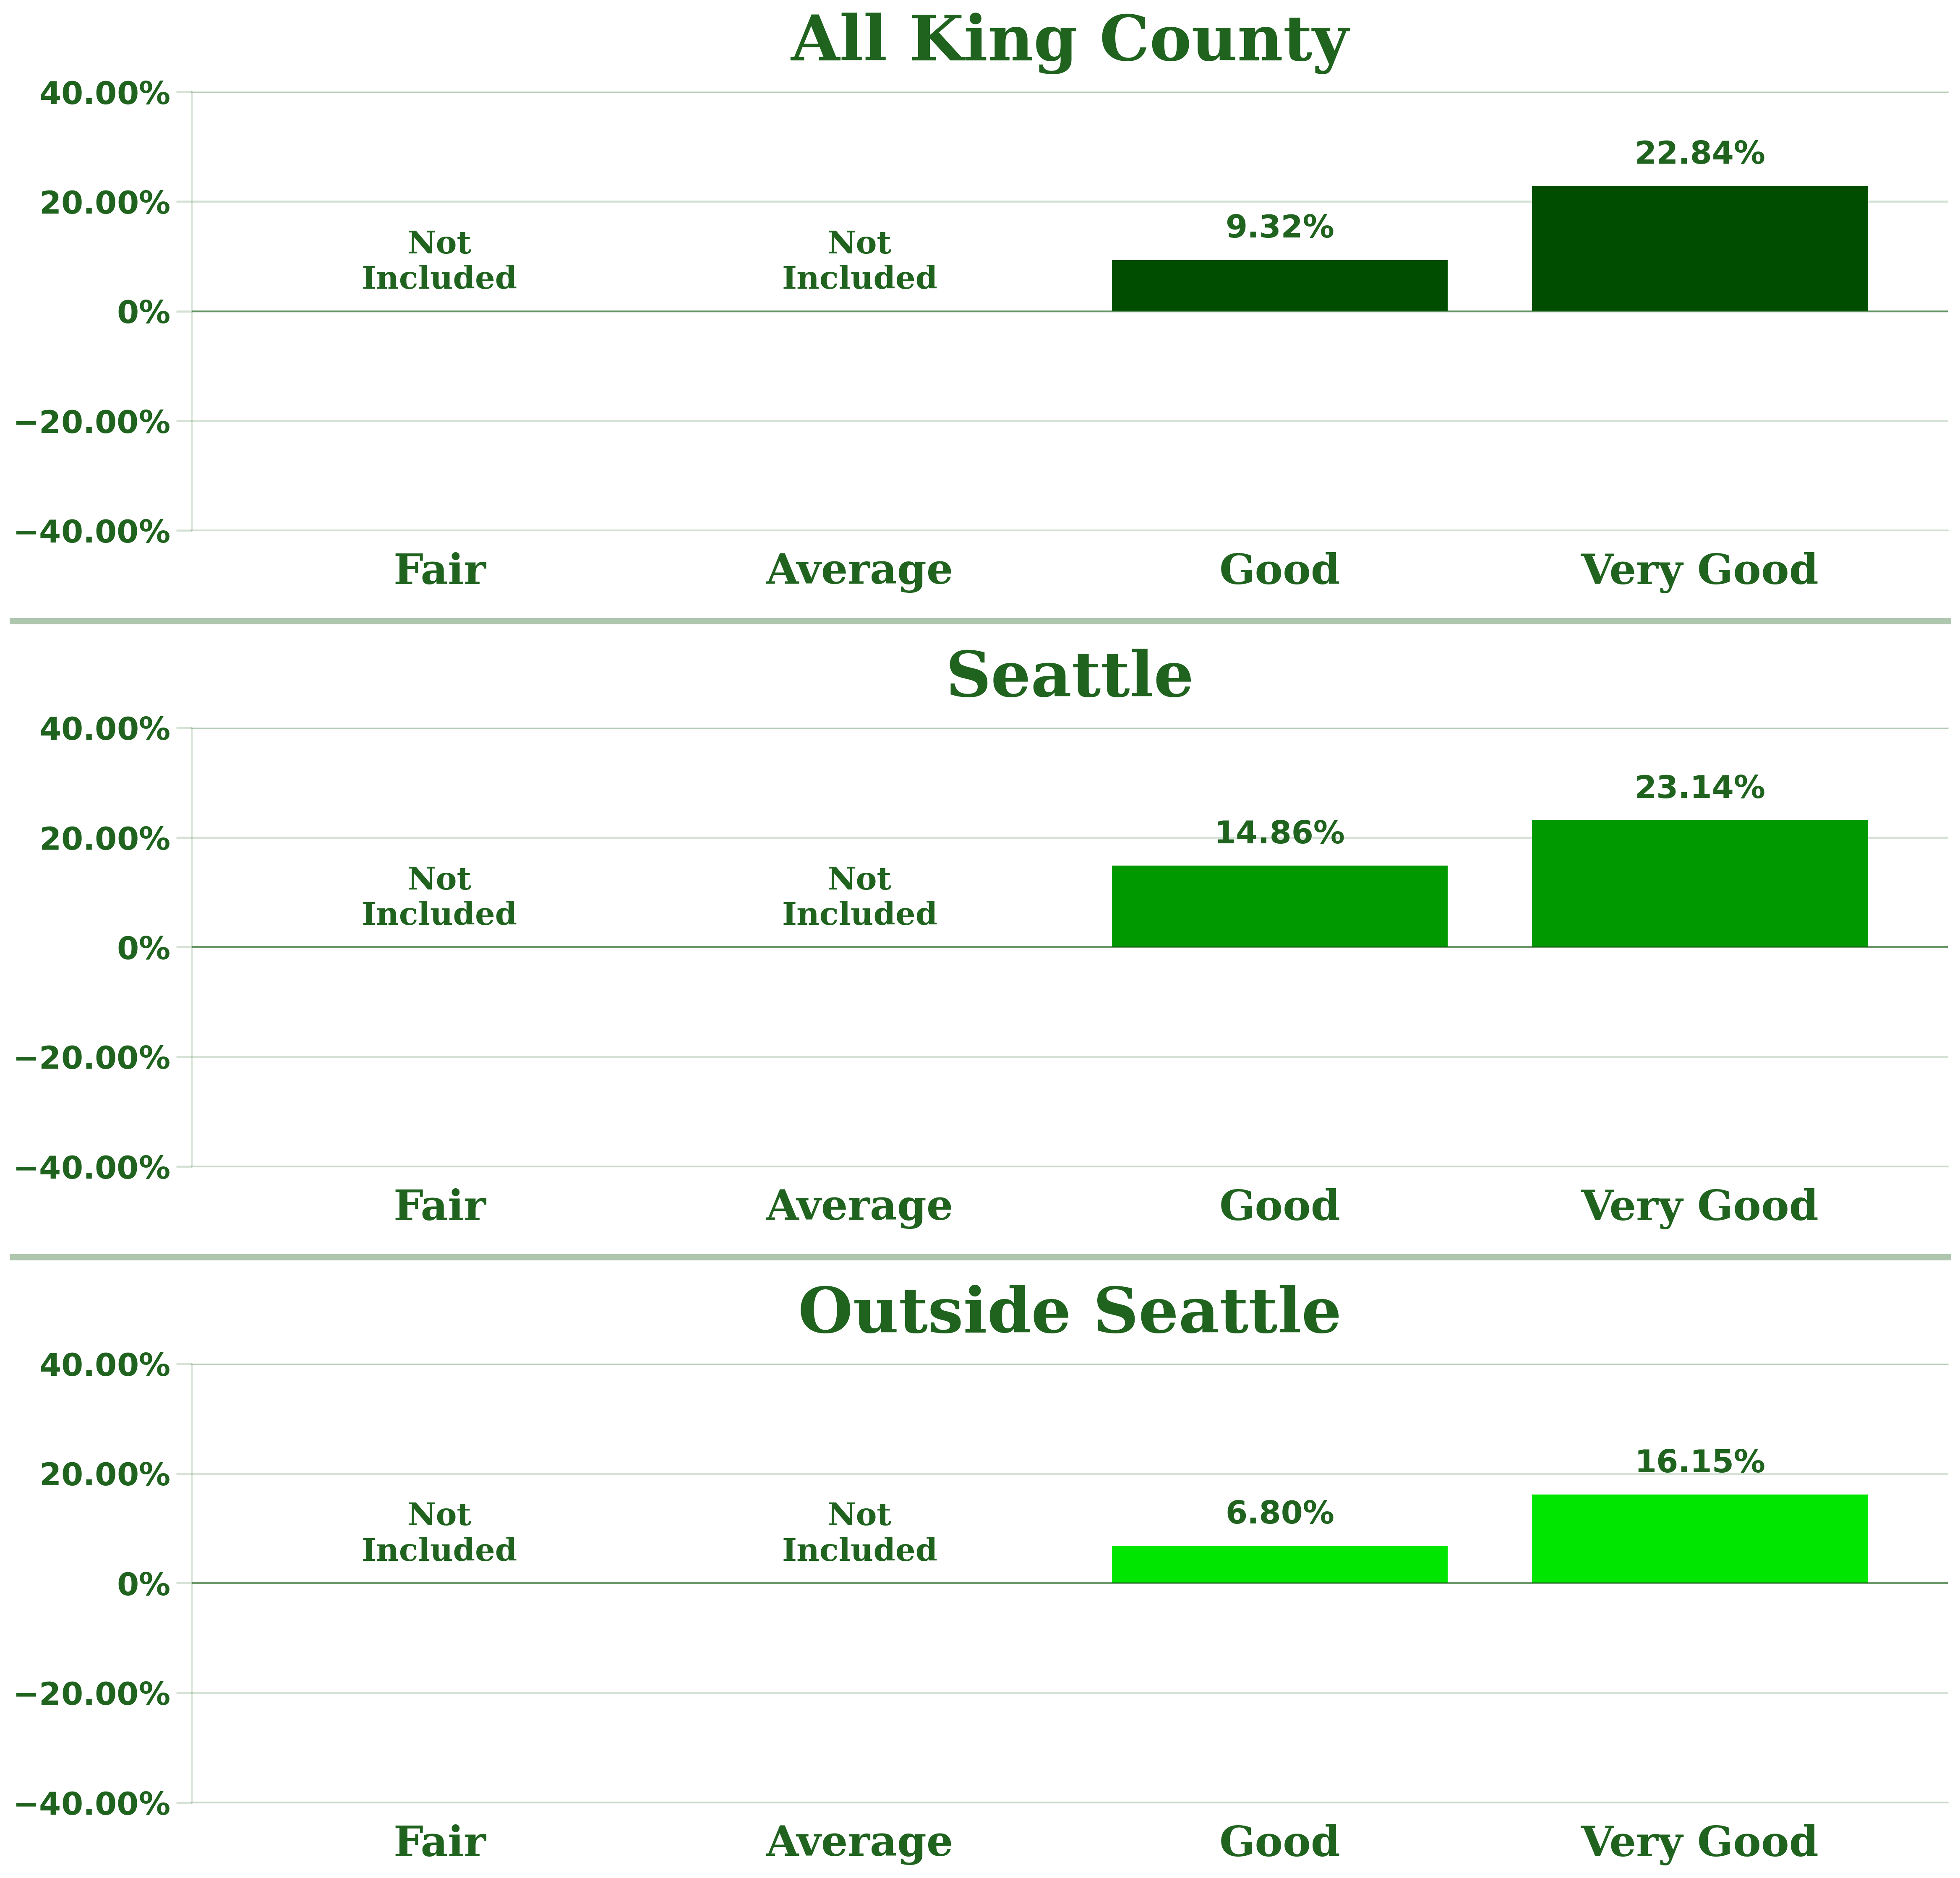

In [144]:
# I iterated thru the lists I created and created an appropriate dataframe for each situation

for p_i, perc_group in enumerate(perc_groups):
    
    # As I planned to show the visualizations I created to my stakeholder, I wanted to control the details precisely
    # This meant changing things depending on the group, such as the title, xlim, ylim, xticks, yticks, and the
    # labels for the bars
    #-------------------------------------------------------------------------------------------------
    if 'grade' in perc_group or 'view' in perc_group or 'condition' in perc_group:
        r_col = 'grade' if 'grade' in perc_group else 'view' if 'view' in perc_group else 'condition' 
        
        plot_df = log_comp_df.loc[log_comp_df.index.map(lambda x: r_col in x)].copy()
        
    else: plot_df = log_comp_df.loc[perc_group].copy()
        
    plot_df.fillna(0, inplace=True)
    
    # Square Footage Living Area & Renovated Visuals
    #----------------------------------------------------------------------------------------------
    if p_i==0:
        fig, axs = plt.subplots(1, 2, figsize=(18, 6), dpi=300, gridspec_kw={'wspace':.27})
        renderer = fig.canvas.get_renderer()
        
        bars_0 = axs[0].bar(range(3), plot_df.loc['sqft_living'], zorder=3,
                            color=[get_lighter_color(c, .09) for c in [(0, .3, 0), (0, .6, 0), (0, .9, 0)]])
        
        bars_1 = axs[1].bar(range(3), plot_df.loc['renovated'], zorder=3, 
                            color=[get_lighter_color(c, .09) for c in [(0, .3, 0), (0, .6, 0), (0, .9, 0)]])
        
        for b_i, bars in enumerate([bars_0, bars_1]):
            
            for r_i, rect in enumerate(bars.patches):
                
                r_y = rect.get_height()
                    
                r_txt = '{:.2f}%'.format(r_y * 1e2) if r_y!=0 else 'Not Included'
                
                txt_va = 'bottom' if r_y >= 0 else 'top'
                
                txt_kws = dict(size=18, weight='bold', c=(.12, .39, .12), ha='center', va=txt_va)
                
                axs[b_i].annotate(r_txt, (r_i, r_y), xytext=(0, 9), textcoords='offset points', **txt_kws)
                
        # Special Sq Footage Plot
        #----------------------------------------------------------------------------------------------
        fig_sq, ax_sq = plt.subplots(figsize=(18, 6), dpi=300)
        
        sqft_living = plot_df.loc['sqft_living']
        sqft = np.linspace(0, 6*1e3)
        
        kc_const, kc_sqft = log_comp_df.at['const', 'kc'], plot_df.at['sqft_living', 'kc']
        seat_const, seat_sqft = log_comp_df.at['const', 'seattle'], plot_df.at['sqft_living', 'seattle']
        out_const, out_sqft = log_comp_df.at['const', 'out_seattle'], plot_df.at['sqft_living', 'out_seattle']
        
        def sq_footage(const, sqft_perc, lab, c, m):
            plot_sqft = [const] + [np.exp(const + sqft_perc*sq_ft) for sq_ft in sqft[1:]]
            sq_line = ax_sq.plot(sqft, plot_sqft, label=lab, c=c, lw=2.7, marker=m, ms=15, markevery=5)
            
            return sq_line
        
        kc_line = sq_footage(kc_const, kc_sqft, 'All King County', get_lighter_color((0, .3, 0), .09), 'X')
        seat_line = sq_footage(seat_const, seat_sqft, 'Seattle', get_lighter_color((0, .6, 0), .09), 'o')
        out_line = sq_footage(out_const, out_sqft, 'Outside Seattle', get_lighter_color((0, .9, 0), .09), 'D')
        
        max_y = max(kc_line[-1].get_ydata()[-1], seat_line[-1].get_ydata()[-1], out_line[-1].get_ydata()[-1])
        
        max_y = round(max_y, -5) + 3*1e4
        
        ax_sq.set_xlim(0, 6*1e3)
        
        ax_sq.set_ylim(2*1e5, max_y)
        ax_sq.set_yticks(np.linspace(2*1e5, max_y, 5))        
        ax_sq.yaxis.set_major_formatter(viz_currency_formatter)

        plt.setp(ax_sq.get_xticklabels(), weight='bold', color=(.12, .39, .12))
        plt.setp(ax_sq.get_yticklabels(), weight='bold', color=(.12, .39, .12))

        ax_sq.tick_params('x', length=18, width=1.2, color=(.12, .39, .12, .18), labelsize=21, labelcolor=(.12, .39, .12))
        ax_sq.tick_params('y', length=18, width=1.2, color=(.12, .39, .12, .18), labelsize=21, labelcolor=(.12, .39, .12))

        lab_kws = dict(labelpad=18, size=30, family='serif', weight='bold', c=(.12, .39, .12))

        ax_sq.set_xlabel('Living Area Square Footage', **lab_kws)
        ax_sq.set_ylabel('Sales Price', **lab_kws)

        ax_sq.grid(True, 'major', 'y', lw=1.2, alpha=.18, c=(.12, .39, .12), zorder=0)

        ax_sq.spines['right'].set_visible(False)
        [ax_sq.spines[side].set_color((.12, .39, .12)) for side in ['left', 'top', 'bottom']]
        [ax_sq.spines[side].set_alpha(.18) for side in ['left', 'top', 'bottom']]

        ax_sq.legend(loc=8, bbox_to_anchor=(.5, 1), ncol=3, frameon=False, 
                     labelcolor=(.12, .39, .12), prop={'family':'serif', 'weight':'bold', 'size':21})
        
        # Saving the Special Viz 
        #-------------------------------------------------------------------------------------------------
        fig_sq.savefig('visuals/presentation_pic_'+ str(p_i + 1) +'_special', bbox_inches='tight')
        
        # Y Axis - Lim, Ticks & Tick Labels
        #----------------------------------------------------------------------------------------------
        sqft_max, reno_max = plot_df.loc['sqft_living'].max(), plot_df.loc['renovated'].max()
        sqft_min, reno_min = plot_df.loc['sqft_living'].min(), plot_df.loc['renovated'].min()
        
        sqft_tick_max = np.abs(sqft_min) if np.abs(sqft_min) > sqft_max else sqft_max
        reno_tick_max = np.abs(reno_min) if np.abs(reno_min) > reno_max else reno_max
        
        sqft_tick_max = round(sqft_tick_max + .00007, 5)
        reno_tick_max = round(reno_tick_max + .07, 2)
        
        sqft_pos_ticks = np.arange(0, sqft_tick_max + .00001, sqft_tick_max/2)
        reno_pos_ticks = np.arange(0, reno_tick_max + reno_tick_max/2, reno_tick_max/2)
        
        sqft_ticks = np.append(np.delete(np.flip(sqft_pos_ticks), -1) * -1, sqft_pos_ticks)
        reno_ticks = np.append(np.delete(np.flip(reno_pos_ticks), -1) * -1, reno_pos_ticks)
        
        axs[0].set_ylim(-sqft_tick_max, sqft_tick_max)
        axs[1].set_ylim(-reno_tick_max, reno_tick_max)
        
        axs[0].yaxis.set_ticks(sqft_ticks)
        axs[1].yaxis.set_ticks(reno_ticks)
        
        [ax.yaxis.set_major_formatter(viz_percentage_formatter) for ax in axs]
        [plt.setp(ax.get_yticklabels(), weight='bold', color=(.12, .39, .12)) for ax in axs]
        
        # Tick Params, Grid, Spines & Hline
        #-------------------------------------------------------------------------------------------------
        [ax.tick_params('x', length=0, labelbottom=False) for ax in axs]
        [ax.tick_params('y', width=1.2, color=(.12, .39, .12, .18), labelcolor=(.12, .39, .12)) for ax in axs]
        
        [ax.grid(True, 'major', 'y', lw=1.2, alpha=.18, c=(.12, .39, .12), zorder=0) for ax in axs]
        
        [ax.spines['right'].set_visible(False) for ax in axs]
        [ax.spines[side].set_color((.12, .39, .12)) for ax in axs for side in ['left', 'top', 'bottom']]
        [ax.spines[side].set_alpha(.18) for ax in axs for side in ['left', 'top', 'bottom']]
        
        [ax.axhline(0, alpha=.63, color=(.12, .39, .12), lw=.9, zorder=9) for ax in axs]
        
        # Title
        #-------------------------------------------------------------------------------------------------
        tit_kws = dict(family='serif', size=36, pad=18, color=(.12, .39, .12))
        
        axs[0].set_title('Living Area\nSquare Footage', **tit_kws)
        axs[1].set_title('Renovated', **tit_kws)
        
        # Legend Details
        #-------------------------------------------------------------------------------------------------
        leg_txts = ["All King County", "Seattle", "Outside Seattle"]
        leg_txt_prop = dict(family='serif', weight='bold', size=21)

        leg = fig.legend(bars_0, leg_txts, loc=8, ncol=3, prop=leg_txt_prop, labelcolor=(.12, .39, .12), frameon=False)
        
        fig_max, fig_min = fig.get_tightbbox(renderer).max, fig.get_tightbbox(renderer).min
        
        leg_max = fig.transFigure.inverted().transform(fig.dpi_scale_trans.transform((fig_max)))
        leg_min = fig.transFigure.inverted().transform(fig.dpi_scale_trans.transform((fig_min)))
        
        leg_x, leg_y = ((leg_max[0] + leg_min[0]) / 2) - leg_min[0], - leg_min[1]
        
        leg.set_bbox_to_anchor((leg_x, leg_y))
        
        # Saving the Visualization
        #-------------------------------------------------------------------------------------------------
        fig.savefig('visuals/presentation_pic_'+ str(p_i + 1), bbox_inches='tight')
    
    # All Other Visuals
    #-------------------------------------------------------------------------------------------------
    if p_i!=0:
        
        # Setting / Gathering the necessary info
        #-------------------------------------------------------------------------------------------------
        kc_col = plot_df['kc']
        seattle_col = plot_df['seattle']
        out_seattle_col = plot_df['out_seattle']
        
        x_tick_labels = plot_df.index
        
        fig_tit = x_tick_labels[0].split('_')[0].title()
            
        final_tick_lim = .2 if p_i==1 else 1.2 if p_i==2 else .4
        p_safety = 2 if p_i==2 else 3
        
        all_ticks = np.arange(0, final_tick_lim + final_tick_lim/p_safety, final_tick_lim/2)
        all_ticks = np.append(np.delete(np.flip(all_ticks), -1) * -1, all_ticks)
        
        h_space = .9 if p_i==2 else .45
        
        fig, axs = plt.subplots(3, 1, figsize=(18, 18), dpi=300, gridspec_kw={'hspace': h_space})
        renderer = fig.canvas.get_renderer()
        
        # Plotting & Annotating the Data
        #-------------------------------------------------------------------------------------------------
        bars_0 = axs[0].bar(kc_col.index, kc_col.values, color=(get_lighter_color((0, .3, 0), .09)), zorder=3)
        bars_1 = axs[1].bar(seattle_col.index, seattle_col.values, color=(get_lighter_color((0, .6, 0), .09)), zorder=3)
        bars_2 = \
        axs[2].bar(out_seattle_col.index, out_seattle_col.values, color=(get_lighter_color((0, .9, 0), .09)), zorder=3)
        
        for b_i, bars in enumerate([bars_0, bars_1, bars_2]):
            
            for r_i, rect in enumerate(bars.patches):
                
                r_y = rect.get_height()
                    
                r_txt = '{:.2f}%'.format(np.abs(r_y) * 1e2) if r_y!=0 else 'Not\nIncluded'
                
                if r_y < 0: txt_offset, txt_va, r_txt = -9, 'top', '-'+r_txt
                else: txt_offset, txt_va = 9, 'bottom'
                
                txt_fam = 'serif' if r_y==0 else 'sans-serif'
                
                txt_kws = dict(size=18, family=txt_fam, weight='bold', c=(.12, .39, .12), ha='center', va=txt_va)
                
                axs[b_i].annotate(r_txt, (r_i, r_y), xytext=(0, txt_offset), textcoords='offset points', **txt_kws)
        
        # Y - Ticks, Y - Tick Labels, and Y - Axis
        #-------------------------------------------------------------------------------------------------
        [ax.set_ylim(-final_tick_lim, final_tick_lim) for ax in axs]
        [ax.yaxis.set_ticks(all_ticks) for ax in axs]

        [ax.yaxis.set_major_formatter(viz_percentage_formatter) for ax in axs]
        [plt.setp(ax.get_yticklabels(), weight='bold', color=(.12, .39, .12)) for ax in axs]
        
        # X - Ticks, X - Tick Labels, and X - Axis
        #-------------------------------------------------------------------------------------------------
        x_kws = dict(size=24, family='serif', weight='bold', color=(.12, .39, .12))
        
        if p_i==1: x_tick_labels = [x_t.title() for x_t in (x_tick_labels)]
            
        if p_i in [2, 3]:
            splitter = 2 if p_i==2 else 1

            x_tick_labels = [x_t.split('_', splitter)[-1] for x_t in x_tick_labels]
            x_tick_labels = [' '.join(x_t.split('_')).title() if '_' in x_t else x_t for x_t in x_tick_labels]
            
        for ax in axs:
            ax.set_xticks(range(len(x_tick_labels)))
            ax.set_xticklabels(x_tick_labels)
            
        if p_i!=2: [plt.setp(ax.get_xticklabels(), **x_kws) for ax in axs]
            
        if p_i==2: 
            [plt.setp(ax.get_xticklabels(), rotation=30, rotation_mode='anchor', ha='right', va='top', **x_kws) \
             for ax in axs]
            
        # Tick Params, Grid, Spines & Hline
        #-------------------------------------------------------------------------------------------------
        [ax.tick_params('x', width=0) for ax in axs]
        [ax.tick_params('y', width=1.2, color=(.12, .39, .12, .18), labelcolor=(.12, .39, .12)) for ax in axs]
        
        [ax.grid(True, 'major', 'y', lw=1.2, alpha=.18, c=(.12, .39, .12), zorder=0) for ax in axs]
        
        [ax.spines['right'].set_visible(False) for ax in axs]
        [ax.spines[side].set_color((.12, .39, .12)) for ax in axs for side in ['left', 'top', 'bottom']]
        [ax.spines[side].set_alpha(.18) for ax in axs for side in ['left', 'top', 'bottom']]
        
        [ax.axhline(0, alpha=.63, color=(.12, .39, .12), lw=.9, zorder=9) for ax in axs]
            
        # Title & Additional Artists
        #-------------------------------------------------------------------------------------------------
        tit_kws = dict(family='serif', weight='bold', color=(.12, .39, .12))
        
        axs[0].set_title('All King County', size=36, pad=18, **tit_kws)
        tit_1 = axs[1].set_title('Seattle', size=36, pad=18, **tit_kws)
        tit_2 = axs[2].set_title('Outside Seattle', size=36, pad=18, **tit_kws)
        
        for t_i, tit in enumerate([tit_1, tit_2]):
            t_ax = tit.axes
            
            ax_box = fig.transFigure.inverted().transform(t_ax.get_tightbbox(renderer))
            a_x0, a_x1 = ax_box[0, 0], ax_box[1, 0]
            
            x_lab_box_y0s = [fig.transFigure.inverted().transform(x_t_label.get_tightbbox(renderer))[0, 1] \
                             for x_t_label in axs[t_i].get_xticklabels()]
            x_lab_min = np.array(x_lab_box_y0s).min()
            
            tit_box = fig.transFigure.inverted().transform(tit.get_tightbbox(renderer))
            t_y1 = tit_box[1, 1]
            
            t_y = ((t_y1 - x_lab_min) / 2) + x_lab_min
            
            t_line = mlines.Line2D([a_x0, a_x1], [t_y, t_y], alpha=.36, c=(.12, .39, .12), lw=3.6)
            fig.add_artist(t_line)
            
        # Saving the Visualization
        #-------------------------------------------------------------------------------------------------
        fig.savefig('visuals/presentation_pic_'+ str(p_i + 1), bbox_inches='tight')

<a id='reco_concl'></a>

## Conclusions & Recommendations

It made sense that the square footage of the living area was included in all three models.  The more living space in the property, the more expensive the property.  Its effect on the sales price was exponential and dependent on both a starting point and a specific increase.  Therefore, any recommendation I provided would be arbitrary and its value limited.  This is the primary reason I built the [Sales Price Calculator](#reco_sales_calc).  Using it, King County Development could easily show the effect of an increase in the square footage of the living area for any property.

While renovations may not be considered a feature that can be changed, the fact that they were included in all three models showed that they were important in determining the sales price.  Their positive effect also indicates that renovations can add significant value to a property.  However, the size of the effect varied between the models.  In the All King County and Outside Seattle models, renovations increased the sales price by around $25\%$.  In the Seattle model, the effect was lower at around $16\%$.  Regardless, this data can be used to prove to investors, clients, or the public via marketing, that renovations make a difference.

The purpose of creating three separate models was to compare the results.  This was particularly interesting for the `floors`, `bathrooms`, and `basement` features.  They were similar in effect in the All King County and Seattle models.  In both models, the `floors` feature had a positive effect of around $6\%$, while the `bathrooms` feature had a negative effect of about $3\%$.  The `basement` feature had a positive effect in both models, but the effect was almost double in the All King County model compared to the Seattle model.  The `floors` and `bathrooms` features had the opposite effect in the Outside Seattle model, almost the exact opposite.  The fact that adding a `floor` Outside of Seattle had a negative effect was quite interesting. Still, the most interesting contradiction was that the `basement` feature wasn’t even included in the Outside Seattle Model.  

While the models contradicted each other in those three features, they were all aligned in that the `bedrooms` feature decreased the sales price in all three models.  This may be because you are decreasing the amount of living space by increasing the number of bedrooms and holding everything else constant.  The results for the `floors`, `bedrooms`, `bathrooms`, and `basement` features were perplexing and, unfortunately, did not lead to any actionable recommendations.  I will discuss how these results can be improved in the [Future Investigations](#sect_fut_invest) section.

The most important feature by far was the `grade` of a property.  The categories in this feature resulted in the most significant changes in the sales price, both positively and negatively.  The `Average` `grade` was the point of zero effect and was not included in any of the models.  The categories above `Average` had increasingly positive effects, and the categories below it had increasingly negative effects if they were included at all.  I recommend that King County Development at least design properties with a `grade` of `Better`, as it resulted in a significant increase of around $40\%$ in all three models and may be more attainable than the higher `grade`s.

The effect of the `condition` feature was also significant and followed a similar pattern as the `grade` feature. However, none of the categories below `Average` were included in any models.  This means that if King County Development is looking to increase the price of a property, it must attain a `Good` or `Very Good` `condition` if the property is not already in such a `condition`.  The `Very Good` `condition` is more desirable.

The importance of these features led to my recommendation to create [Picture Databases](#reco_pic_dbs).  It was also difficult to recommend one `grade` or `condition` over another without knowledge of a property's original state.  This is another reason I created the [Sales Price Calculator](#reco_sales_calc).  It, and any similar tool built by King County Development, allows recommendations to be adjusted for all properties.


<a id='reco_pic_dbs'></a>
    
## Picture Databases

Based on the results of my analysis and the visualizations I created, my first recommendation to King County Development would be to generate picture databases of properties grouped by their `grade`s and `condition`s.  The `grade` of a property was the most important feature in terms of its effect on the sales price.  The effect of the `condition` of the property, while not as important as `grade`, is another feature that can be easily documented with example pictures, and its effect was not insignificant.

The picture databases could be used while designing new properties, to justify a design’s building costs to investors, or to guide clients seeking renovation or remodeling services with a cost/benefit analysis.  Also, suppose a building or renovation did not obtain the desired `grade` or `condition` from the county assessor.  In that case, the picture databases could be used as evidence in any legal proceedings resulting from such an unwanted occurrence.

<a id='reco_sales_calc'></a>

## Sales Price Calculator

The visualizations I created help view each of the predictors' relative importance and compare the models themselves.  However, they do not provide a way to see how the predictors interact or what the final sales price would be when they do.  I built the Sales Price Calculator below to provide King County Development with a tool to show clients or investors how much of an increase can be gained by increasing the square footage while also upgrading the `grade` and `condition` of a property.

While the tool I created assumes that the property in question currently has both an `Average` `grade` and `condition`, more complex tools could and should certainly be built by King County Development in which the original `grade` and `condition` could also be included.

In [145]:
# Creating the necessary tools
#------------------------------------------------------------------
model_choices = ['Choose a model from the choices below...',
                 'All King County', 'Seattle', 'Outside Seattle']

grade_choices = ['Choose a Grade from the choices below...', 
                 'Good', 'Better', 'Very Good', 'Excellent', 'Luxury']

condition_choices = ['Choose a Condition from the choices below...', 
                     'Good', 'Very Good']

empty_slot = ['N/A unitl a selection is made in dropdown menu above']

menu_layout = widgets.Layout(width='initial', height='30px')

first_menu = widgets.Dropdown(options=model_choices, value=model_choices[0], 
                              disabled=False, layout=menu_layout)

second_menu = \
widgets.Dropdown(options=empty_slot, value=empty_slot[0], disabled=False, layout=menu_layout)

third_menu = \
widgets.Dropdown(options=empty_slot, value=empty_slot[0], disabled=False, layout=menu_layout)

# Interactive Dropdown Function
#-------------------------------------
def sales_price_calculator(a, b, c):
    
    # First Menu
    #-----------------------------------
    if a not in [model_choices[0], empty_slot[0]]:
        
        if a=='All King County': model = kc_compare_params_df.log.copy()
        if a=='Seattle': model = seattle_compare_params_df.log.copy()
        if a=='Outside Seattle': model = out_seattle_compare_params_df.log.copy()
        
        mod_start = model['const'] + model['sqft_living'] * sq_start
        
        print(bold_red +'Starting Price:\t\t'+ every_off, '${:,.2f}'.format(np.exp(mod_start)))
        print()
        
        sq_tot = sq_start + sq_inc
        sq_update = model['const'] + model['sqft_living'] * sq_tot
        
        print(bold_red +'New Price:\t\t'+ every_off, '${:,.2f}'.format(np.exp(sq_update)))
        print()
        
        second_menu.options = grade_choices
        first_menu.disabled = True
        
    else: second_menu.options = empty_slot
        
    # Second Menu
    #----------------------------------
    if b not in [grade_choices[0], empty_slot[0]]:
        
        g_idx = grade_choices.index(b) + 7
        
        if ' ' in b: grade = '_'.join(b.split(' '))
        else: grade = b
        
        grade_idx = 'grade_'+ str(g_idx) +'_'+  grade
        
        grade_update = sq_update + model[grade_idx]
        
        print(bold_red +'New Price:\t\t'+ every_off, '${:,.2f}'.format(np.exp(grade_update)))
        print()  
        
        third_menu.options = condition_choices
        second_menu.disabled = True
        
    else: third_menu.options = empty_slot
        
    # Third Menu
    #----------------------------------
    if c not in [condition_choices[0], empty_slot[0]]:
        
        if ' ' in c: condition = '_'.join(c.split(' '))
        else: condition = c
            
        condition_idx = 'condition_'+ condition
        
        condition_update = grade_update + model[condition_idx]
        
        print(bold_red +'Final Price:\t\t'+ every_off, 
              '${:,.2f}'.format(np.exp(condition_update)))
        print()
        print(bold_red +'Total Price Increase:\t'+ every_off, 
              '${:,.2f}'.format(np.exp(condition_update) - np.exp(mod_start)))
        
        third_menu.disabled = True  

# Building the Widget
#----------------------------------
ui = widgets.VBox([first_menu, second_menu, third_menu])

out = widgets.interactive_output(sales_price_calculator, {'a': first_menu, 
                                                          'b': second_menu, 
                                                          'c': third_menu})

The first step in the version of the tool I created is entering a property's original square footage.  Next, you enter the increase in the square footage.  Once the user enters that information, a series of dropdown menus appear.  The first menu allows the user to choose which model is desired.  The original and the increase in the sales price are shown at this point.  The second and third menus allow the user to choose how much of an upgrade to the `grade` and `condition` of a property is desired.  After a choice is made in each dropdown, the increase in the sales price is shown, and after all the choices are made, the overall change in the sales price is also shown.

In [146]:
# Getting the necessary user input and running the widget
#-------------------------------------------------------------
sq_start = int(input('Enter the original square footage of the property.\t'))
sq_inc = int(input('Enter a square footage increase.\t'))

display(ui, out)

Enter the original square footage of the property.	1500
Enter a square footage increase.	500


Output()

<a id='sect_fut_invest'></a>

<h1 align='center'><strong>Future Investigations</strong></h1>

Besides the picture databases I mentioned regarding the `grade` and `condition` features, there is a lot more work that King County Development will need to perform if they want to be profitable, efficient in their spending and if they want to provide the highest quality services to their clients or investors. More valuable information can no doubt be gleaned from the dataset provided to me for this project, including testing interactions and building polynomial regression models. However, the dataset only covered one year’s worth of sales, so any further investigation would still be limited.

A much larger dataset, possibly with even more predictors to build models with, can undoubtedly be <a href='https://kingcountyexec.govqa.us/WEBAPP/_rs/'>obtained</a>.  Data on commercial property could also be gathered.  At that point, there should be enough data to create separate models for each city in King County and analyze the various ZIP codes within each city.  They should then develop maps of each city and ZIP code, separated by the appropriate zoning laws, to see what is possible in every inch of King County.

Areas of high potential should be identified, and the owners of any potentially lucrative properties should be approached to gauge their interest in purchasing their property or if they are at least interested in any renovation or remodeling services.  If not, King County Development will at least be fully prepared should any enticing properties become available or if they are approached for their other services.  The image below is from a <a href='https://www.youtube.com/watch?v=ZeRd3aurWz8'>video</a> from the <a href='https://www.youtube.com/c/RealEstateforNoobs'>Real Estate for Noobs</a> YouTube channel, and the steps it shows are still only one small piece of the puzzle regarding real estate development.

<p align='center'>
    <img src='images/rd_dev_video_still.png'>
</p>